## **House Prices: Advanced Regression Techniques**


Name: Yuval Haski | ID: 204759062  
Name: Tomer Karmazin | ID: 209130749

Link to Kaggle: https://www.kaggle.com/code/yuvalhaski/

---

### **Overview of the competition**

In this project, we aim to predict the final sale price of homes in Ames, Iowa using advanced regression techniques. The competition provides datasets containing detailed information about various property features. Our approach involves exploring, analyzing, and preprocessing this data to understand the underlying patterns and relationships. We will construct and evaluate Linear Regression models (Linear
Regression and or SGDRegressor), to make accurate predictions about the sale prices. The performance of these models will be validated using a test dataset, and the best model will be used for final predictions. The goal is to develop a robust predictive model that can accurately estimate house prices based on the provided features.

---

### Imports

In [1]:
!pip install --upgrade plotly
!pip install --upgrade ydata_profiling
!pip install "cython<3.0.0" && pip install --no-build-isolation pyyaml==6.0
!pip install sweetviz
!pip install orca

In [62]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import sweetviz as sw
import plotly.graph_objects as go
%matplotlib inline

# sklearn imports
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector


## Data Investigation and Preprocessing
In this section we will:
- analyze the effect of features and there effect on the regression result.
- preprocess the data 
---

Reading the Train & Test Data

In [5]:
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [6]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [8]:
# show df_houses info
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
print ("Train: ",train.shape[0],"sales, and ",train.shape[1],"features")
print ("Test: ",test.shape[0],"sales, and ",test.shape[1],"features")

Train:  1460 sales, and  81 features
Test:  1459 sales, and  80 features


**Data fields**

- `SalePrice` - the property's sale price in dollars. This is the `target` variable that we are trying to predict.

- MSSubClass: The building class

- MSZoning: The general zoning classification

- LotFrontage: Linear feet of street connected to property

- LotArea: Lot size in square feet

- Street: Type of road access

- Alley: Type of alley access

- LotShape: General shape of property

- LandContour: Flatness of the property

- Utilities: Type of utilities available

- LotConfig: Lot configuration

- LandSlope: Slope of property

- Neighborhood: Physical locations within Ames city limits

- Condition1: Proximity to main road or railroad

- Condition2: Proximity to main road or railroad (if a second is present)

- BldgType: Type of dwelling

- HouseStyle: Style of dwelling

- OverallQual: Overall material and finish quality

- OverallCond: Overall condition rating

- YearBuilt: Original construction date

- YearRemodAdd: Remodel date

- RoofStyle: Type of roof

- RoofMatl: Roof material

- Exterior1st: Exterior covering on house

- Exterior2nd: Exterior covering on house (if more than one material)

- MasVnrType: Masonry veneer type

- MasVnrArea: Masonry veneer area in square feet

- ExterQual: Exterior material quality

- ExterCond: Present condition of the material on the exterior

- Foundation: Type of foundation

- BsmtQual: Height of the basement

- BsmtCond: General condition of the basement

- BsmtExposure: Walkout or garden level basement walls

- BsmtFinType1: Quality of basement finished area

- BsmtFinSF1: Type 1 finished square feet

- BsmtFinType2: Quality of second finished area (if present)

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

- Heating: Type of heating

- HeatingQC: Heating quality and condition

- CentralAir: Central air conditioning

- Electrical: Electrical system

- 1stFlrSF: First Floor square feet

- 2ndFlrSF: Second floor square feet

- LowQualFinSF: Low quality finished square feet (all floors)

- GrLivArea: Above grade (ground) living area square feet

- BsmtFullBath: Basement full bathrooms

- BsmtHalfBath: Basement half bathrooms

- FullBath: Full bathrooms above grade

- HalfBath: Half baths above grade

- Bedroom: Number of bedrooms above basement level

- Kitchen: Number of kitchens

- KitchenQual: Kitchen quality

- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

- Functional: Home functionality rating

- Fireplaces: Number of fireplaces

- FireplaceQu: Fireplace quality

- GarageType: Garage location

- GarageYrBlt: Year garage was built

- GarageFinish: Interior finish of the garage

- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

- GarageCond: Garage condition

- PavedDrive: Paved driveway

- WoodDeckSF: Wood deck area in square feet

- OpenPorchSF: Open porch area in square feet

- EnclosedPorch: Enclosed porch area in square feet

- 3SsnPorch: Three season porch area in square feet

- ScreenPorch: Screen porch area in square feet

- PoolArea: Pool area in square feet

- PoolQC: Pool quality

- Fence: Fence quality

- MiscFeature: Miscellaneous feature not covered in other categories

- MiscVal: $Value of miscellaneous feature

- MoSold: Month Sold

- YrSold: Year Sold

- SaleType: Type of sale

- SaleCondition: Condition of sale

## EDA – Essential Data Analysis

We will use Sweetviz to get an In-depth EDA (target analysis, comparison, feature analysis, correlation) report.

                                             |          | [  0%]   00:00 -> (? left)


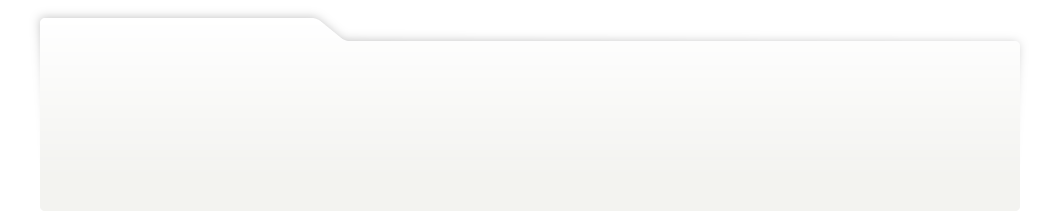
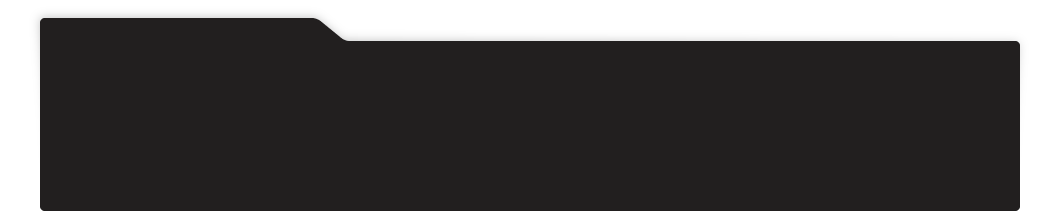
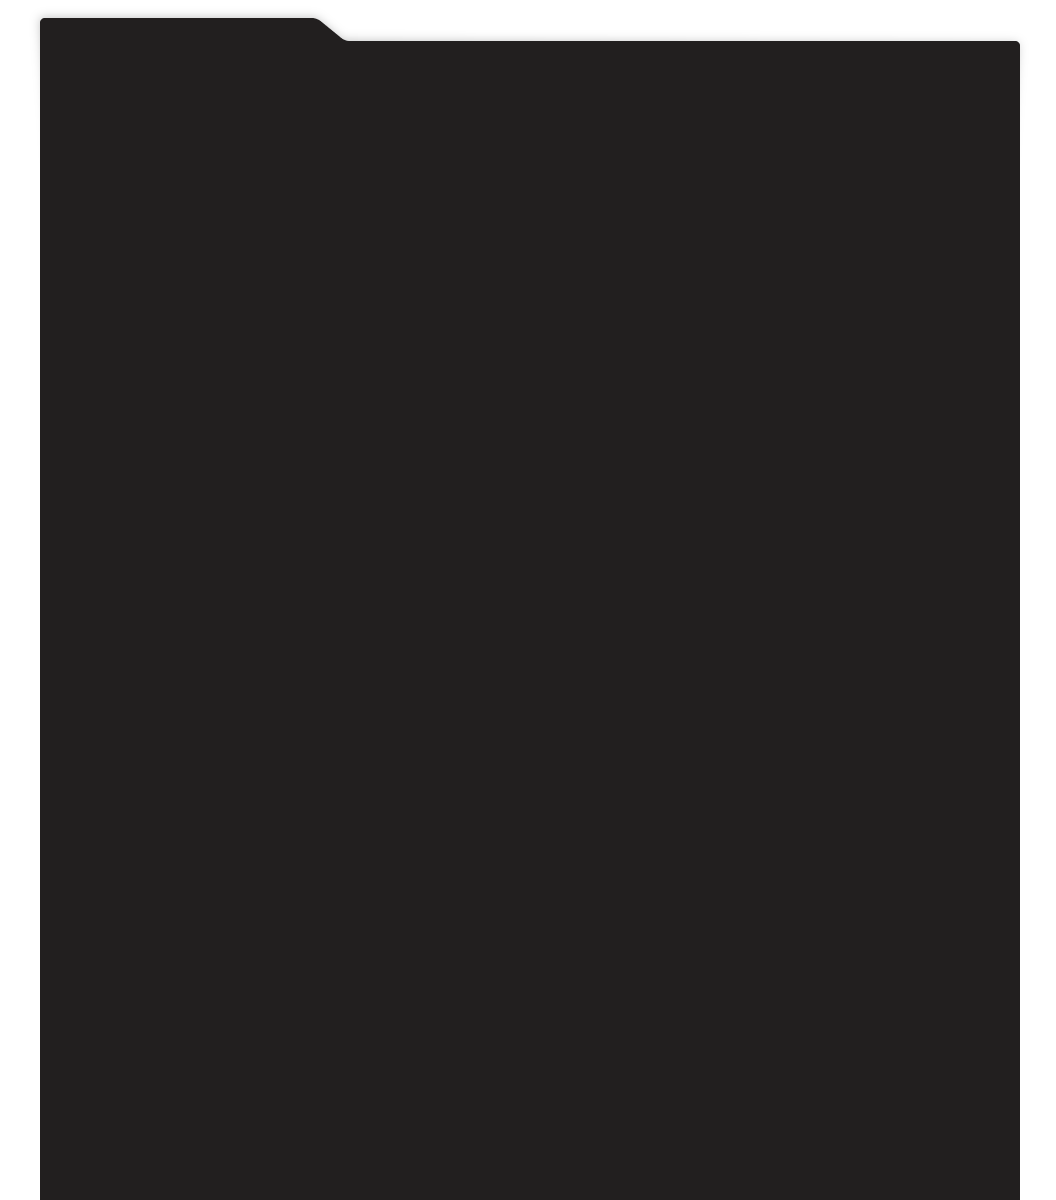
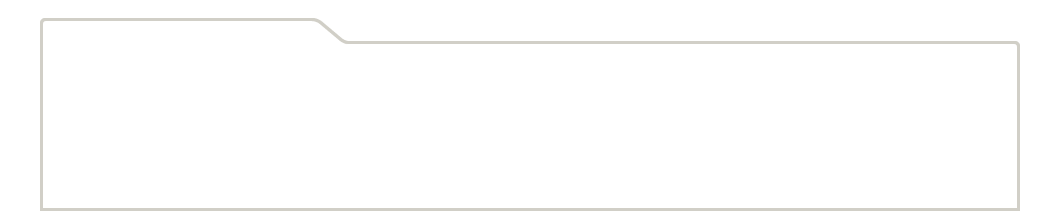
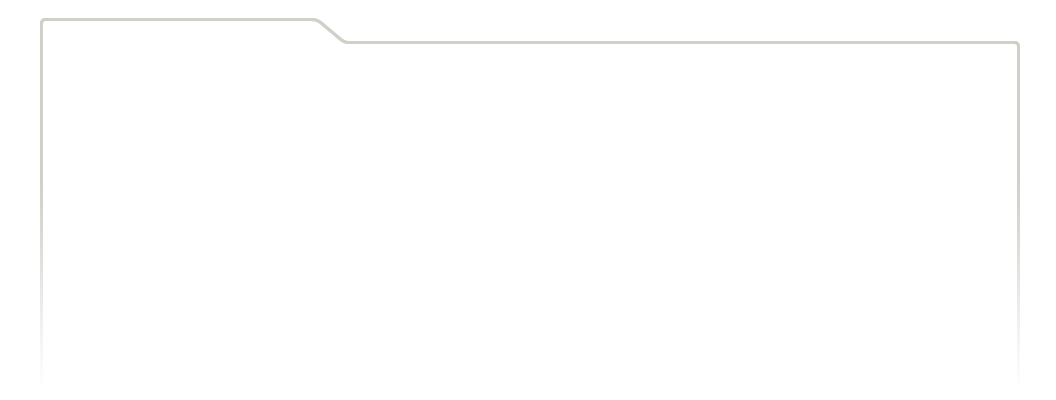
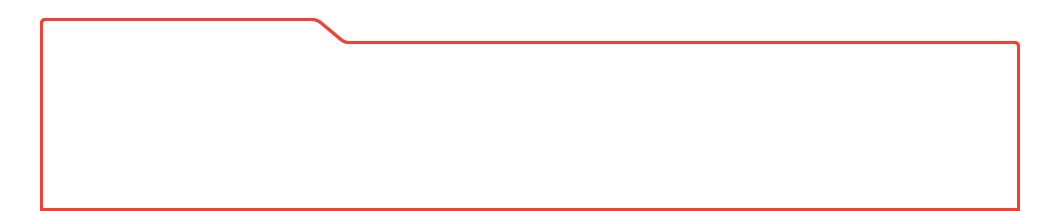
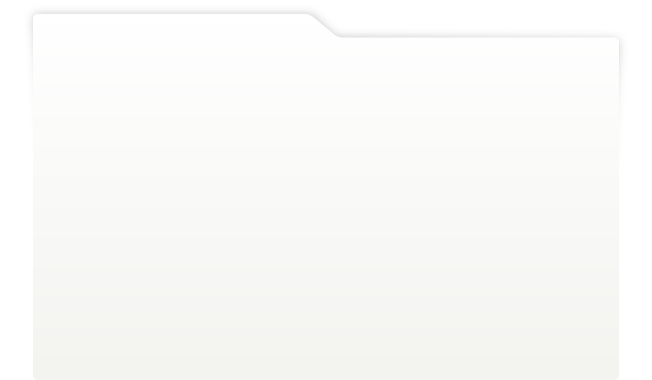
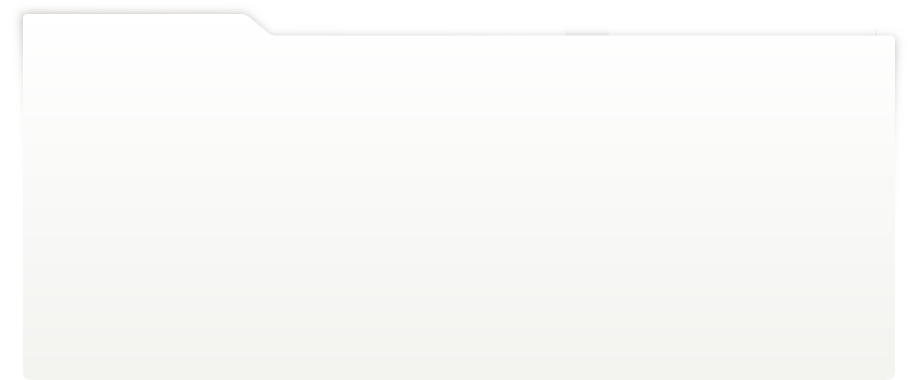
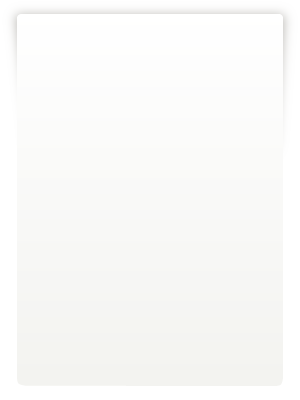
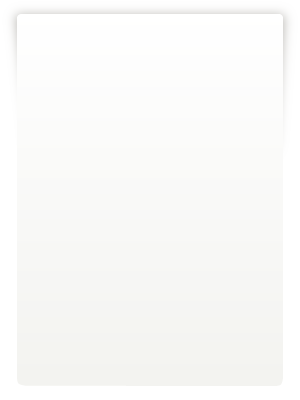
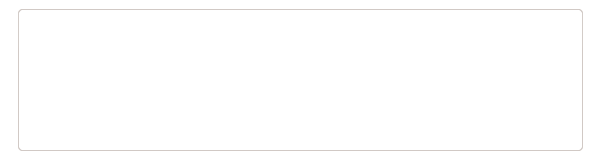
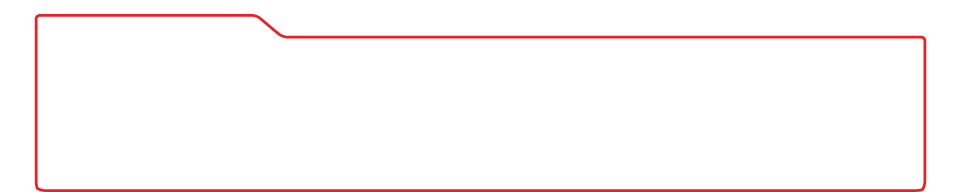
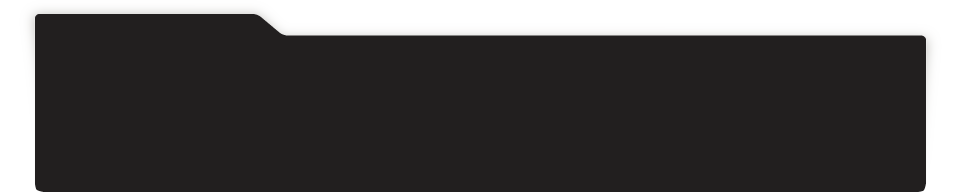
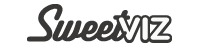
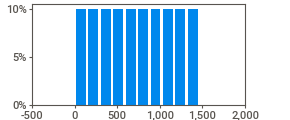
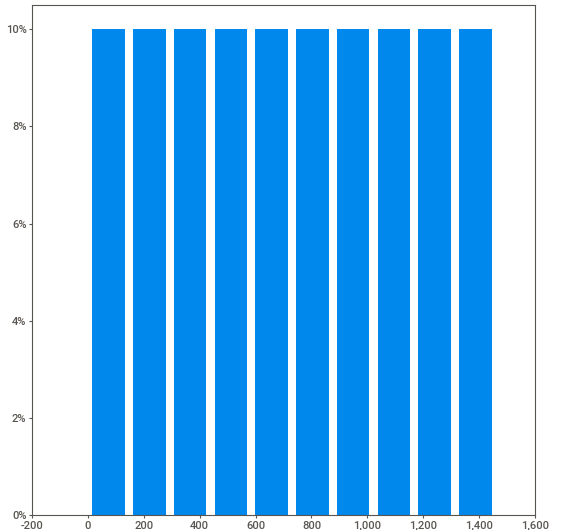
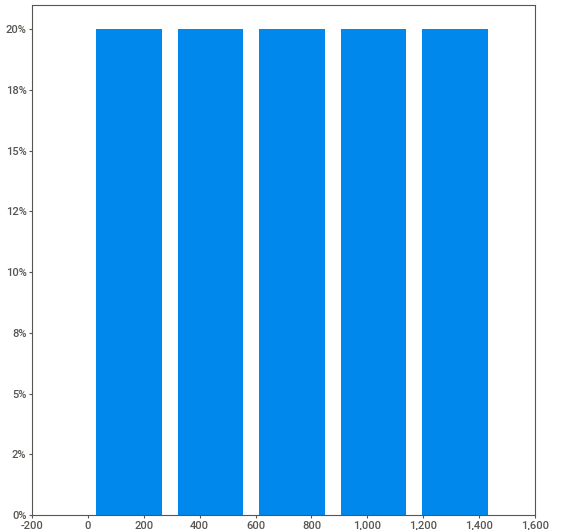
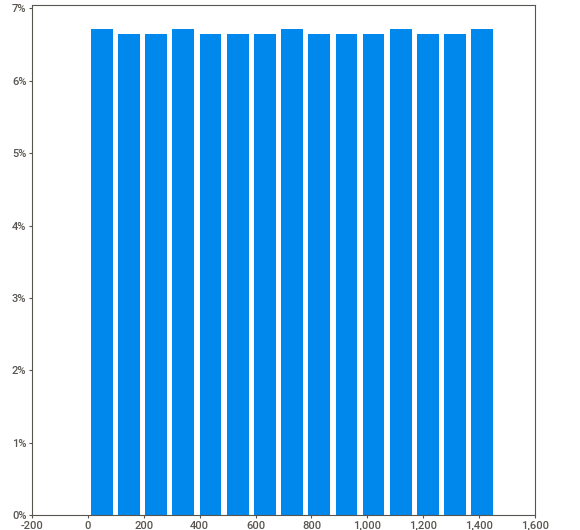
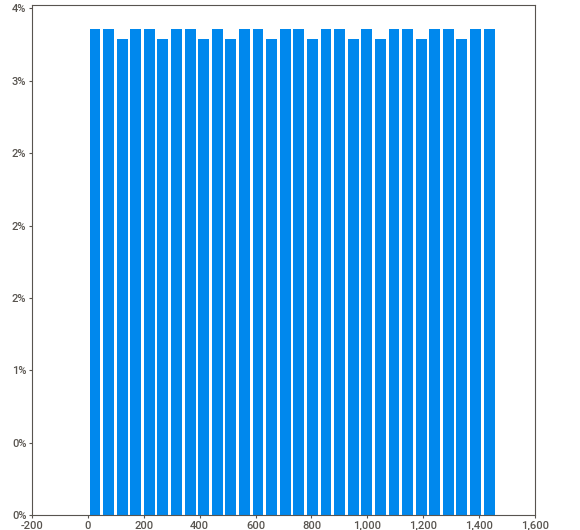
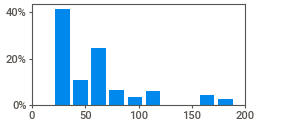
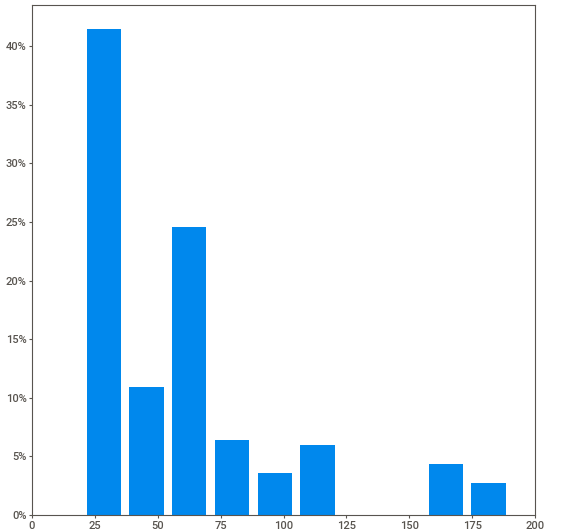
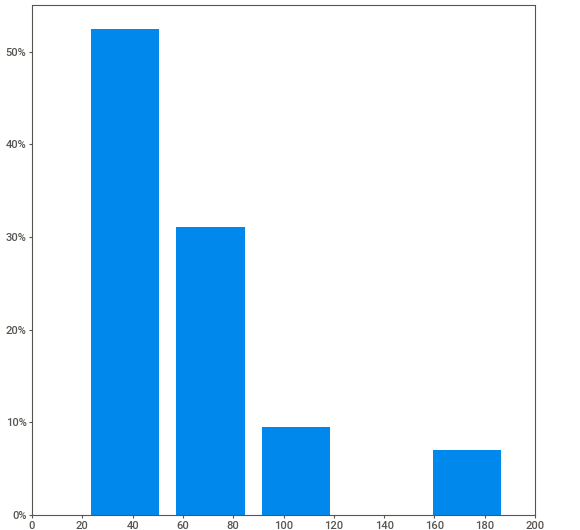
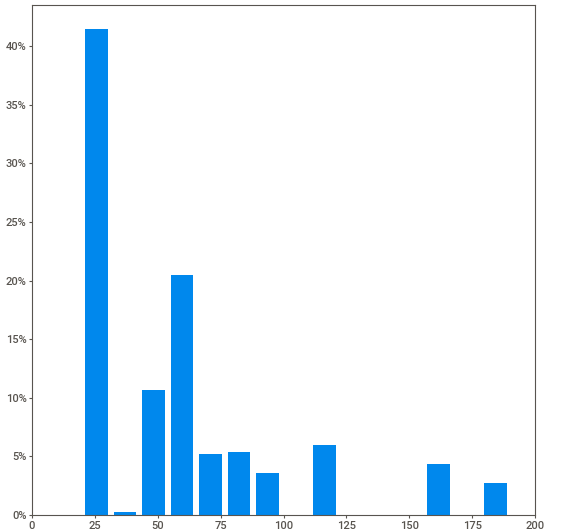
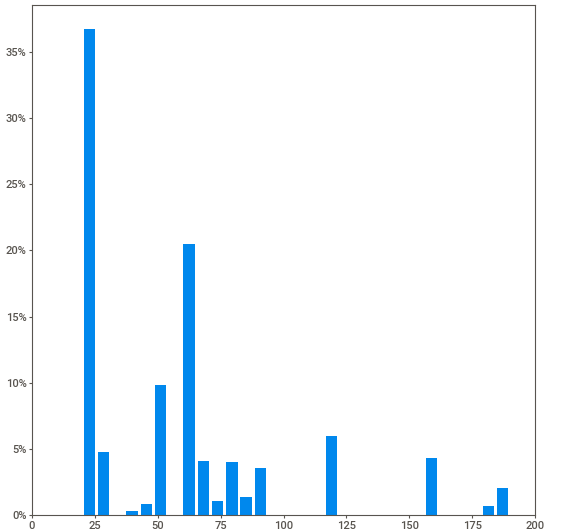
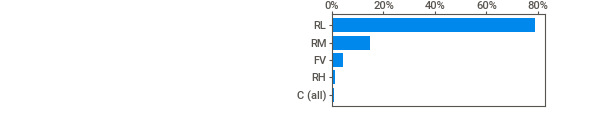
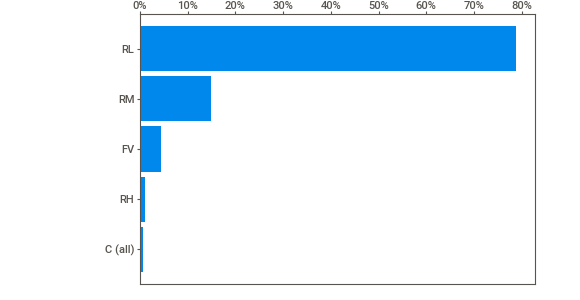
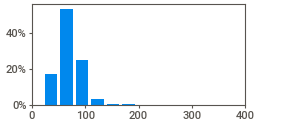
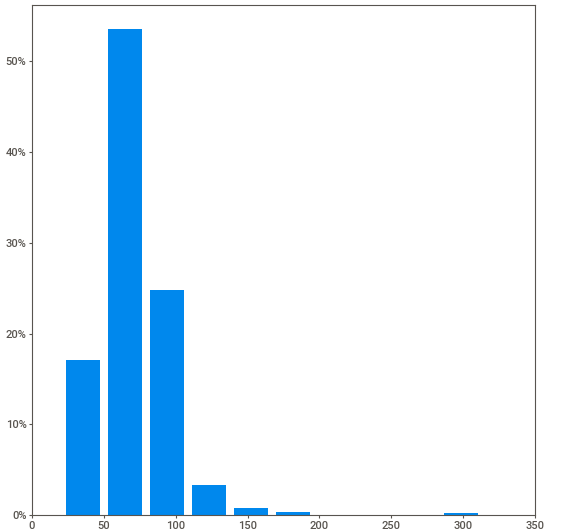
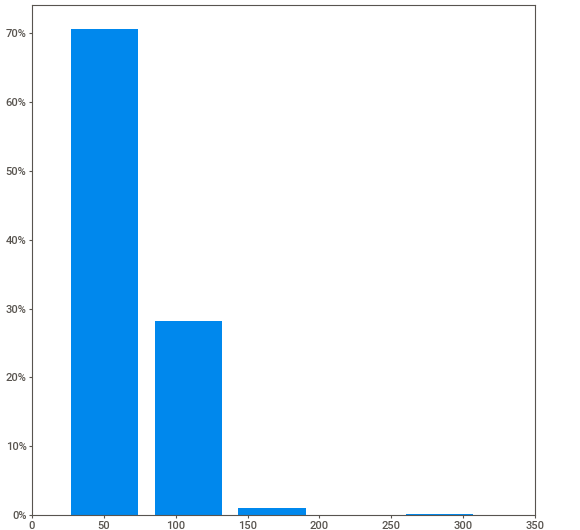
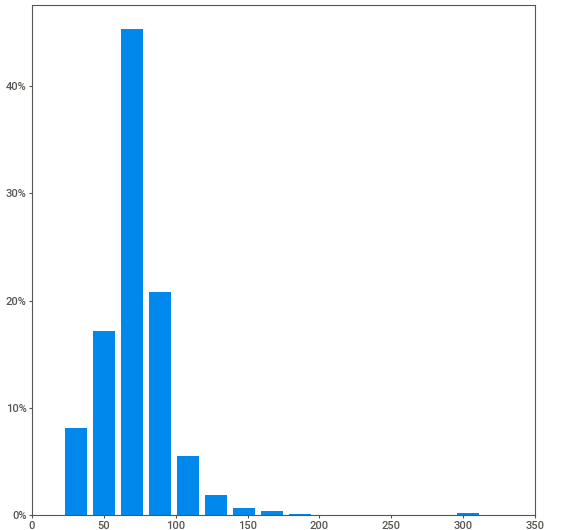
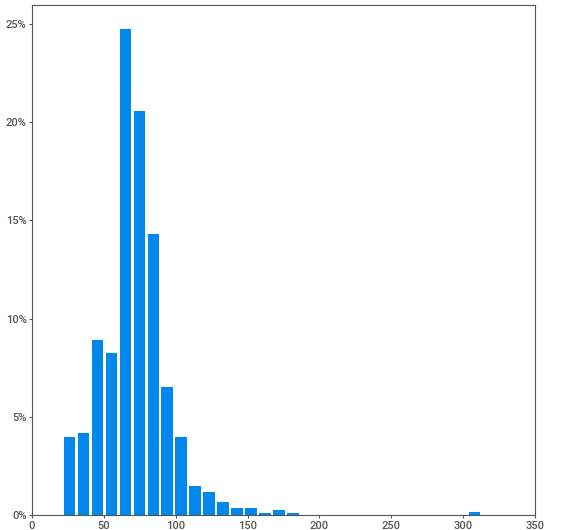
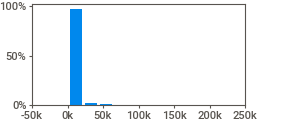
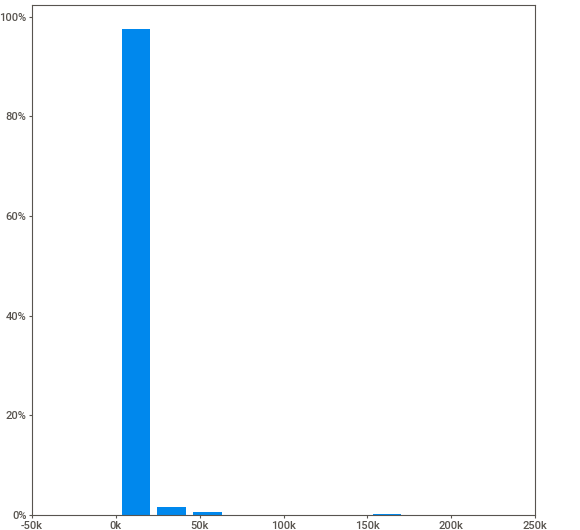
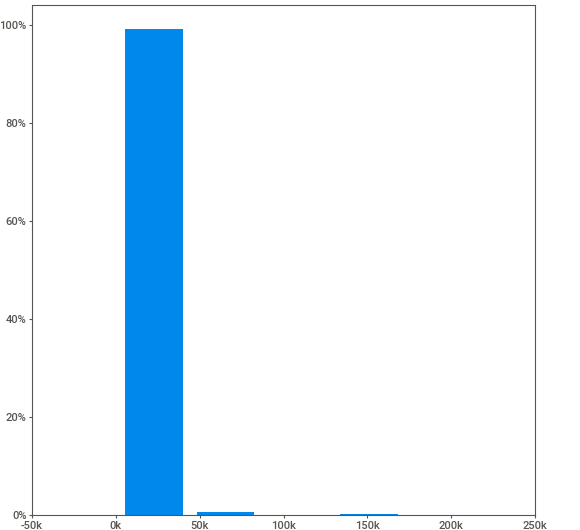
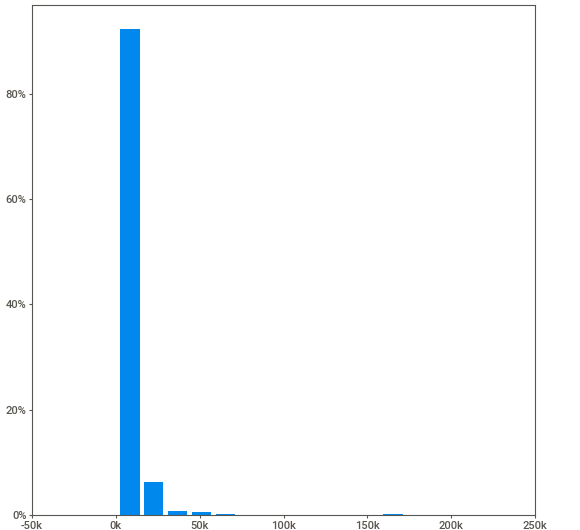
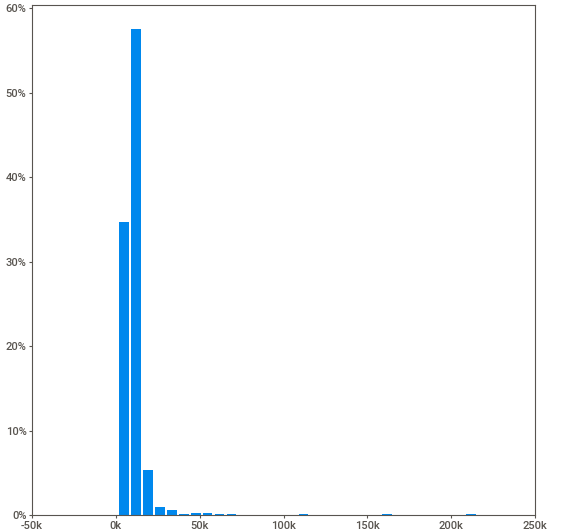
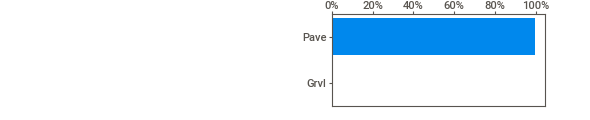
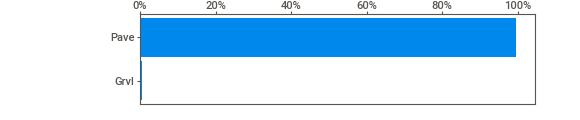
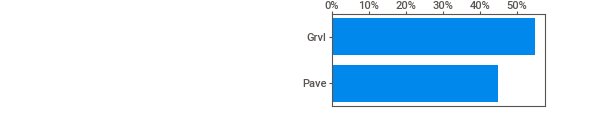
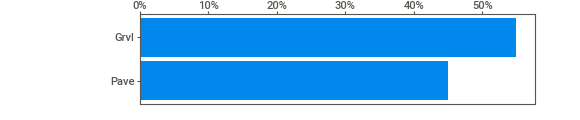
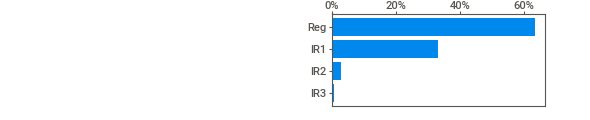
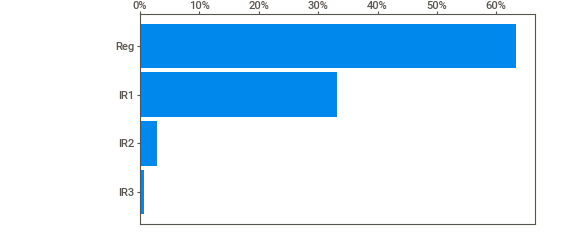
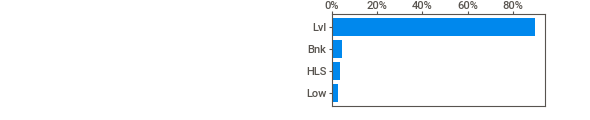
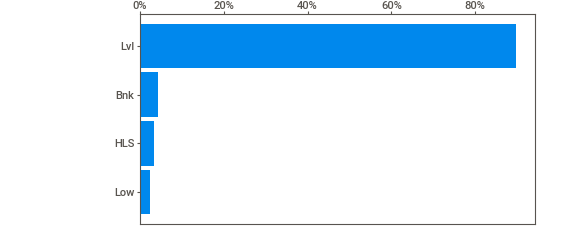
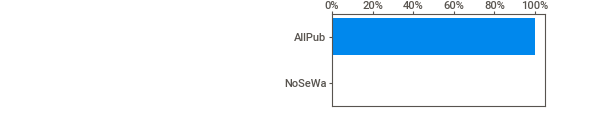
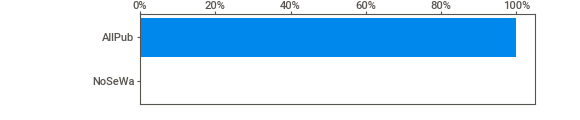
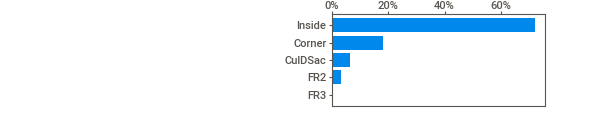
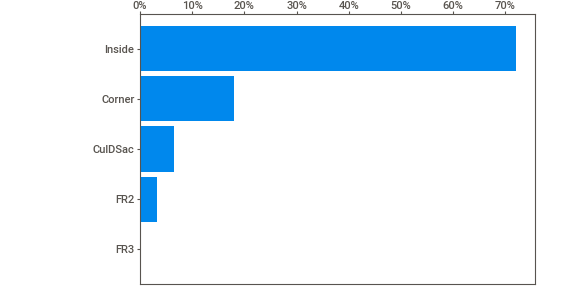
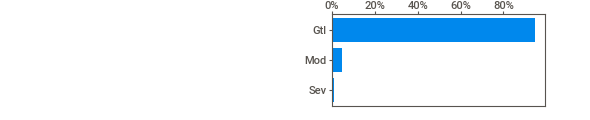
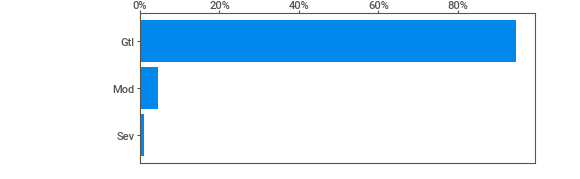
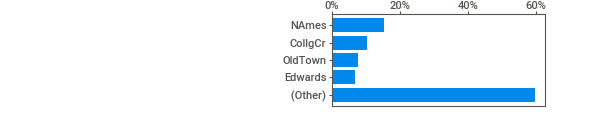
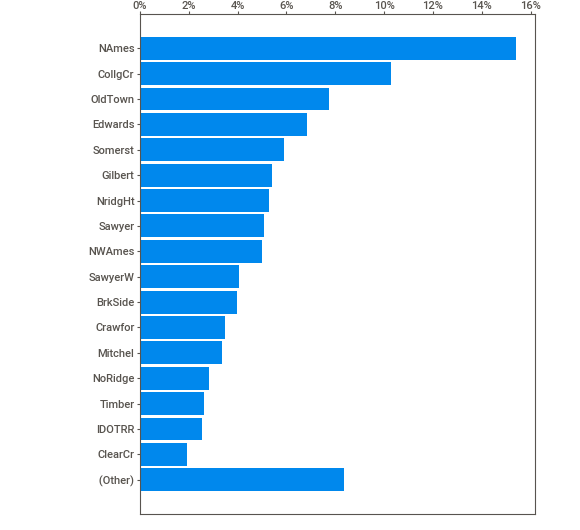
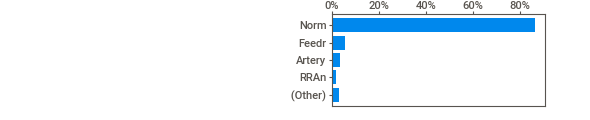
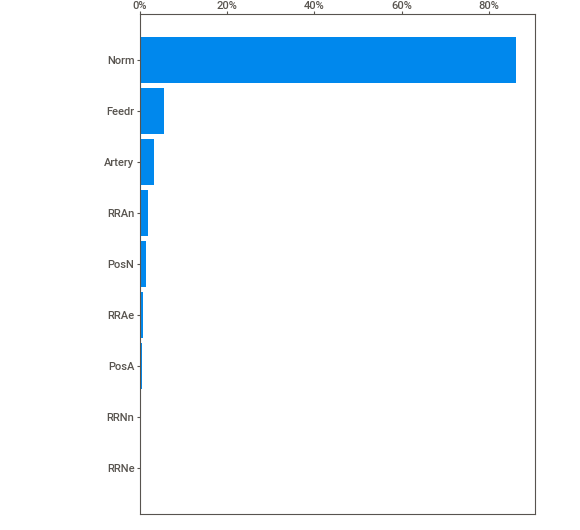
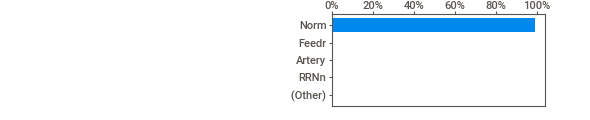
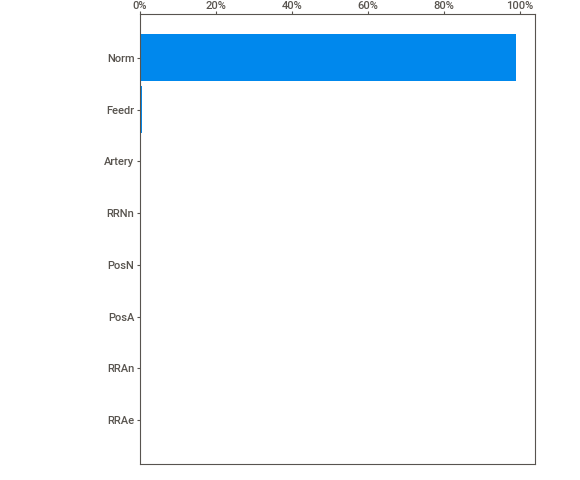
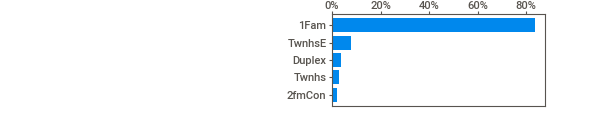
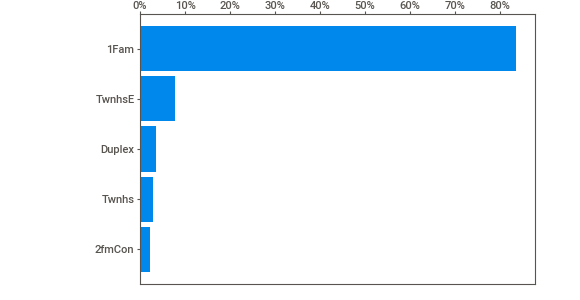
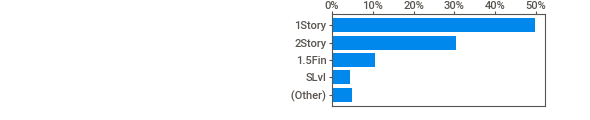
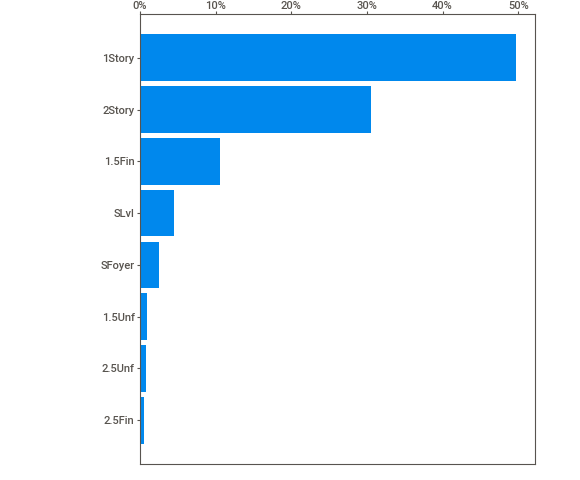
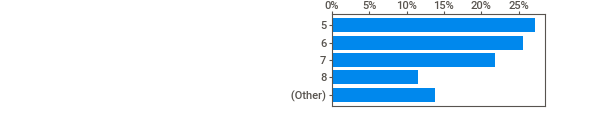
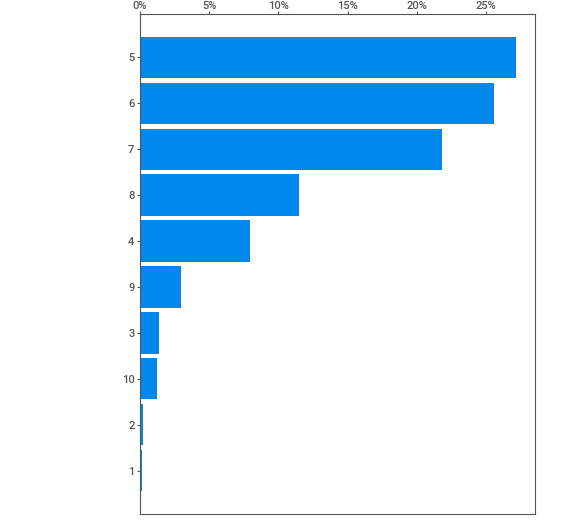
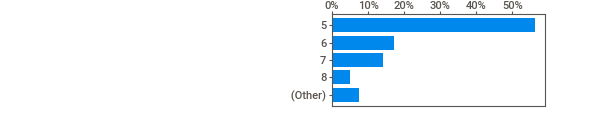
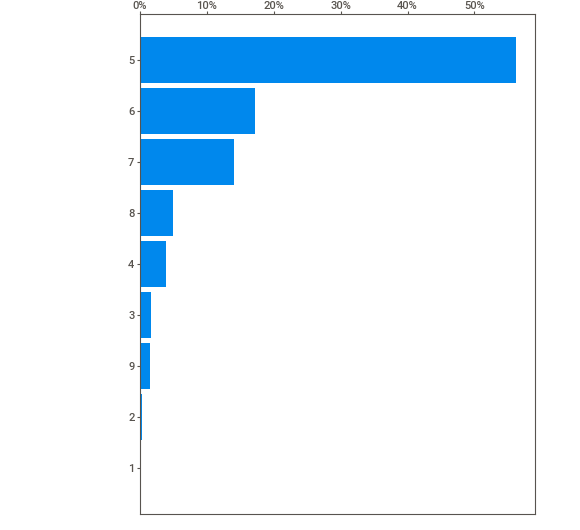
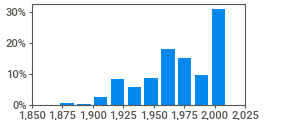
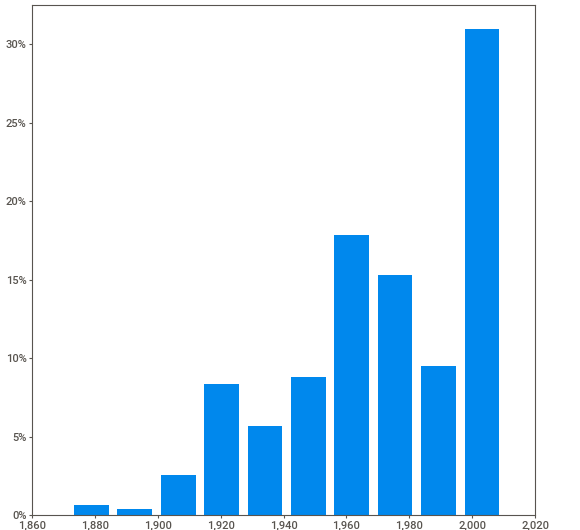
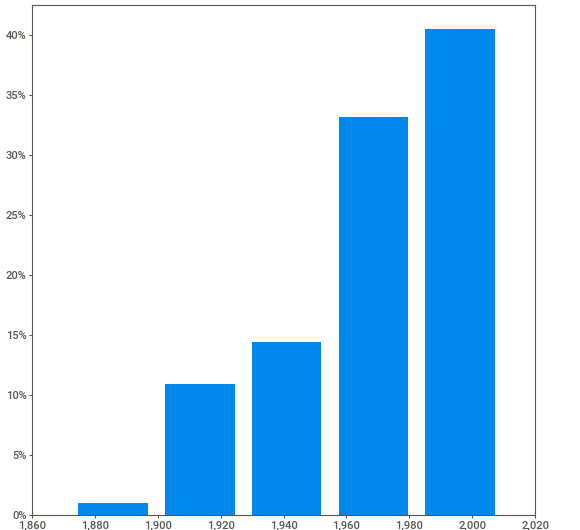
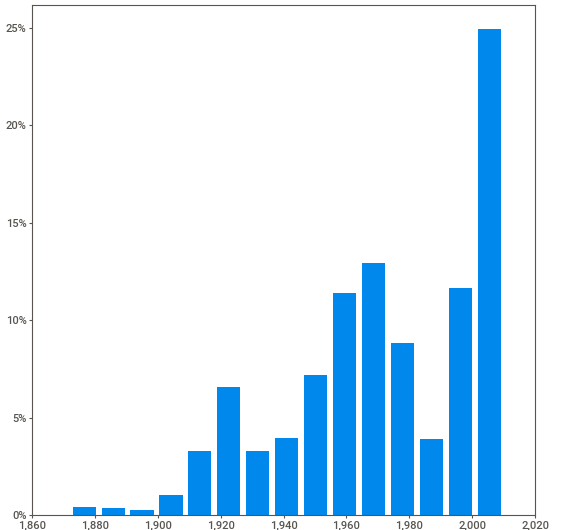
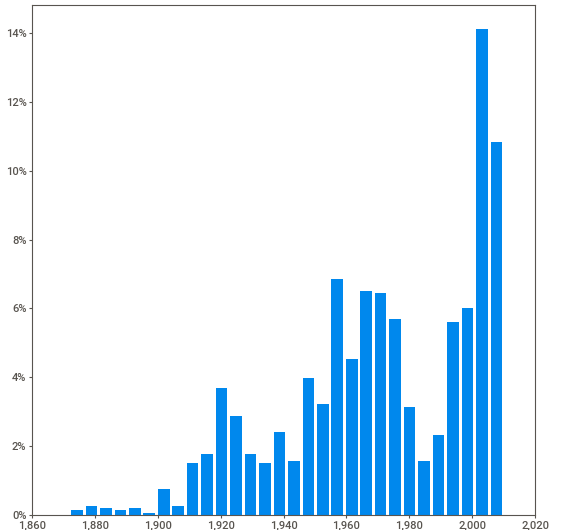
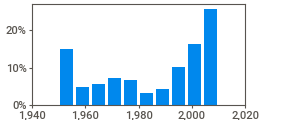
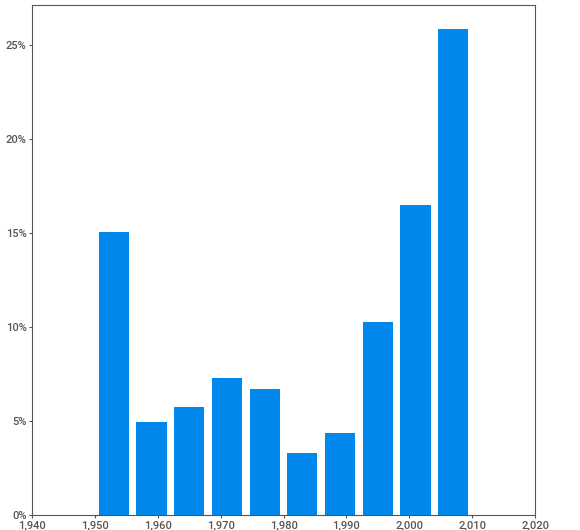
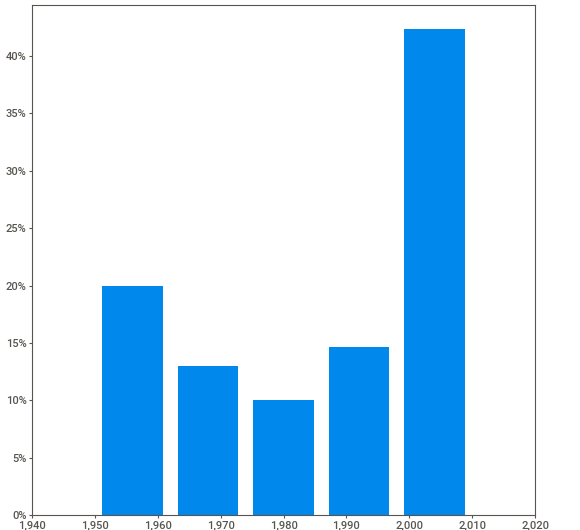
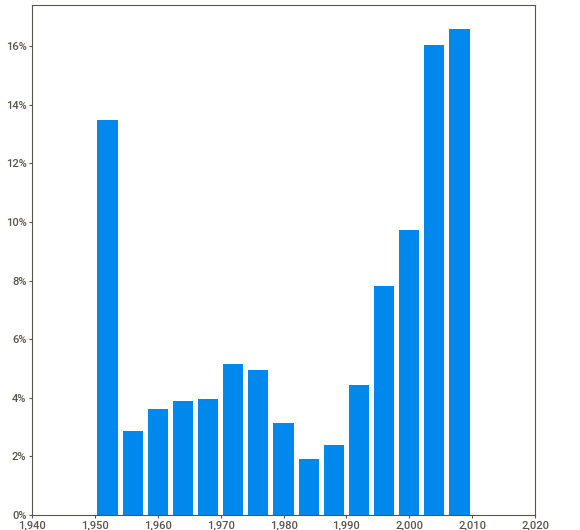
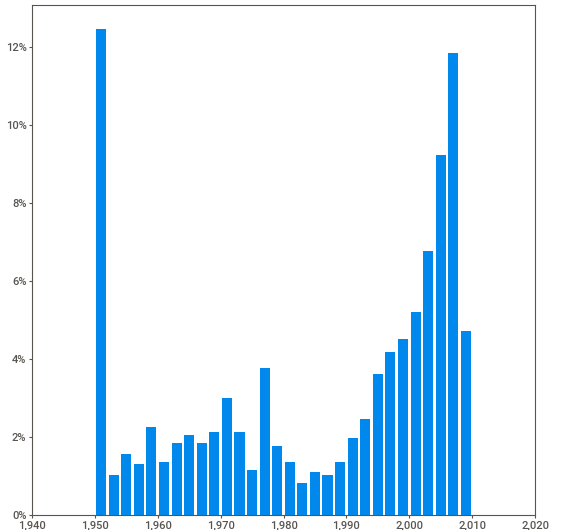
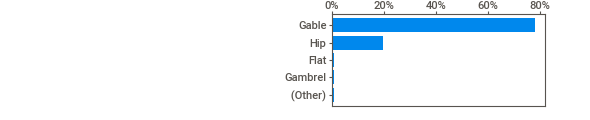
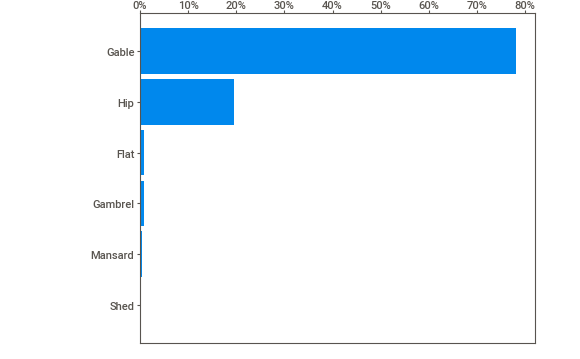
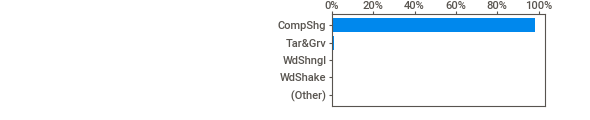
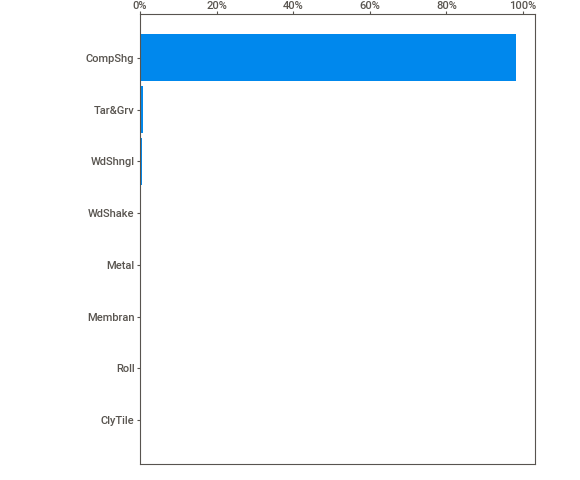
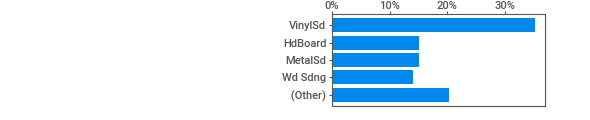
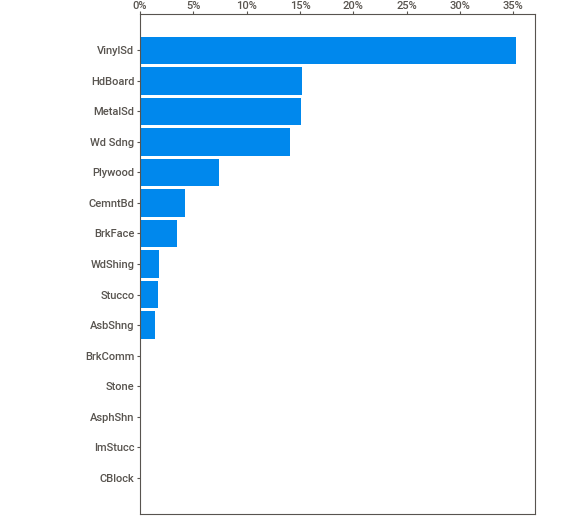
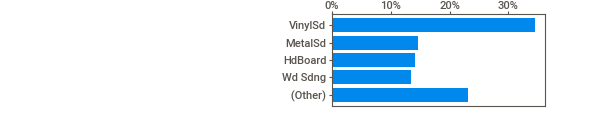
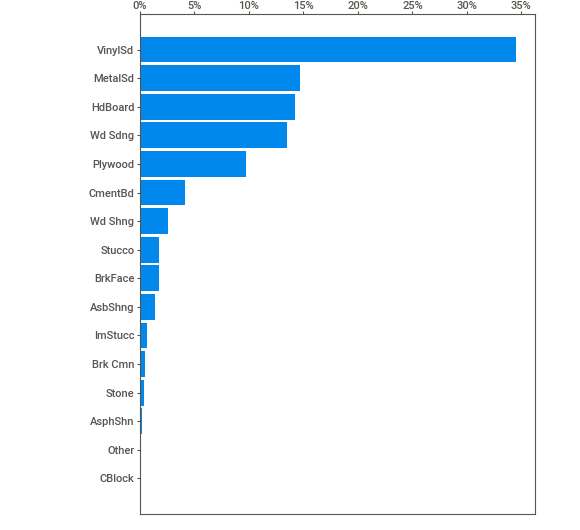
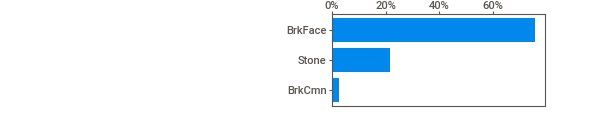
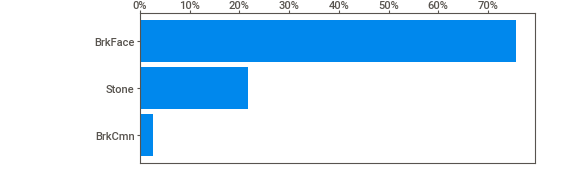
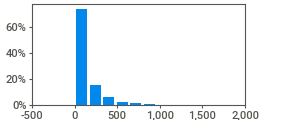
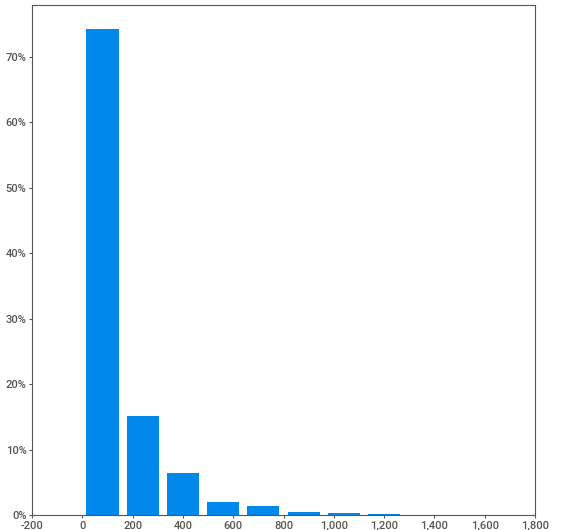
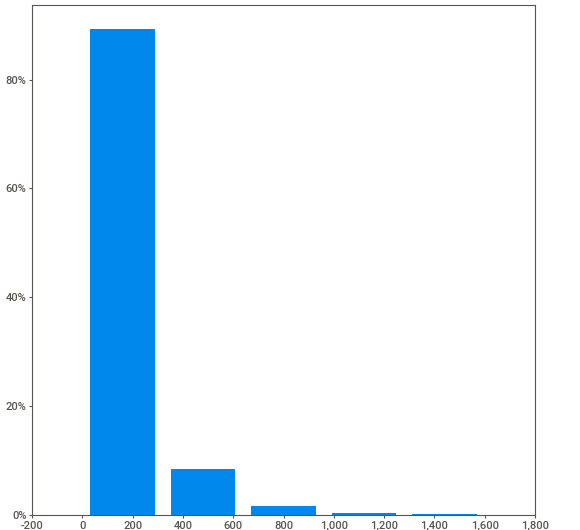
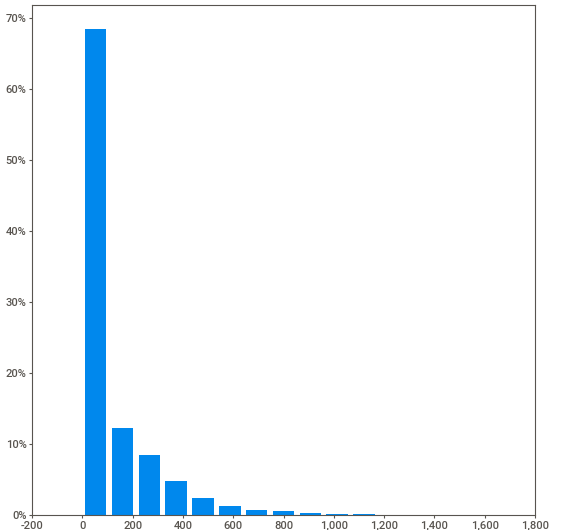
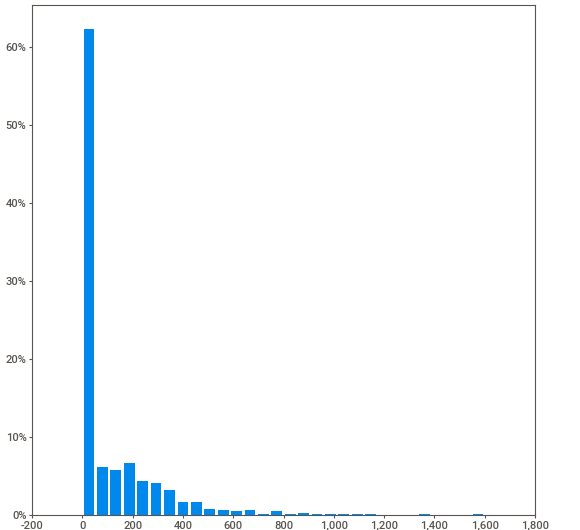
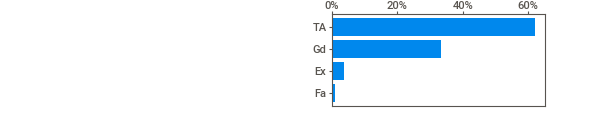
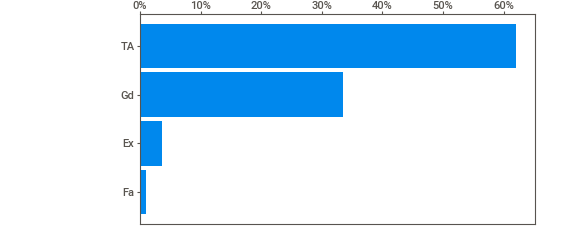
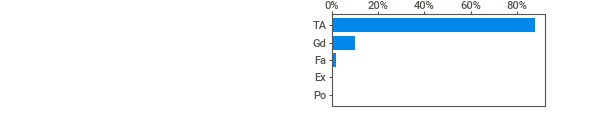
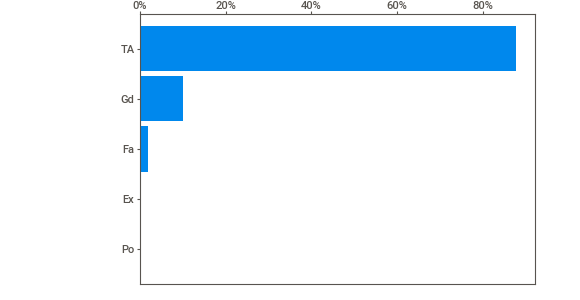
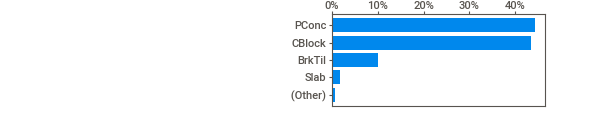
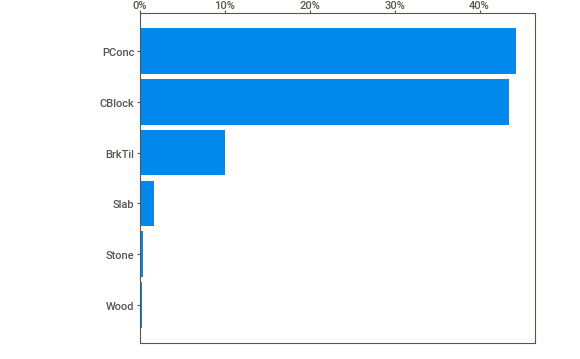
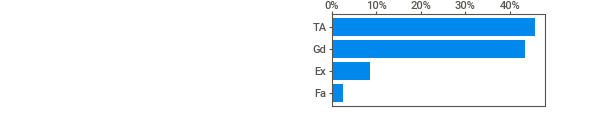
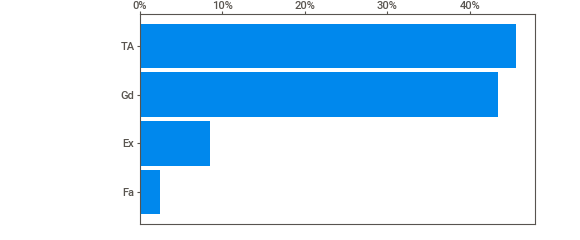
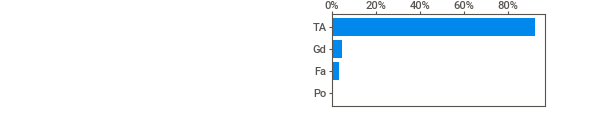
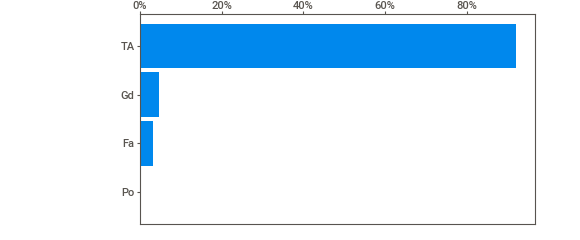
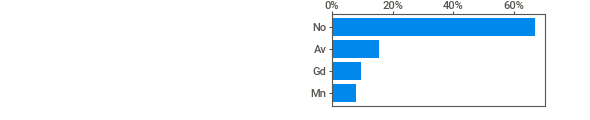
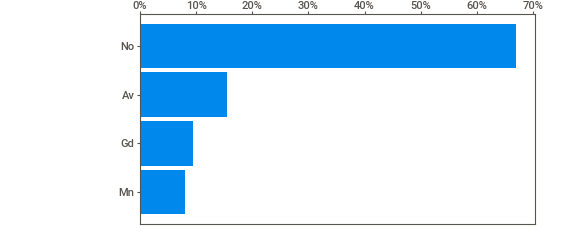
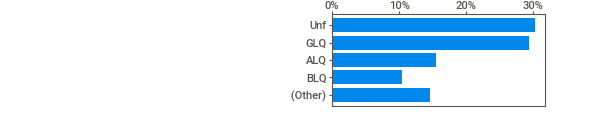
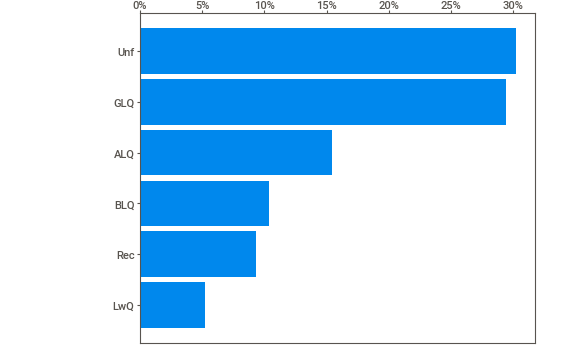
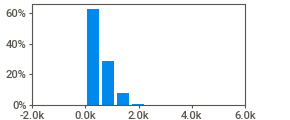
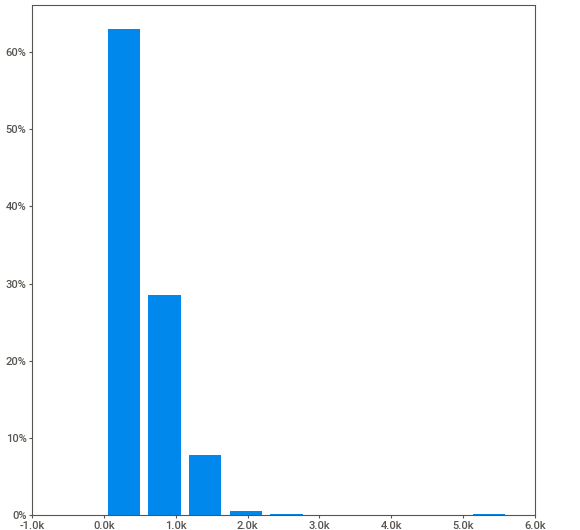
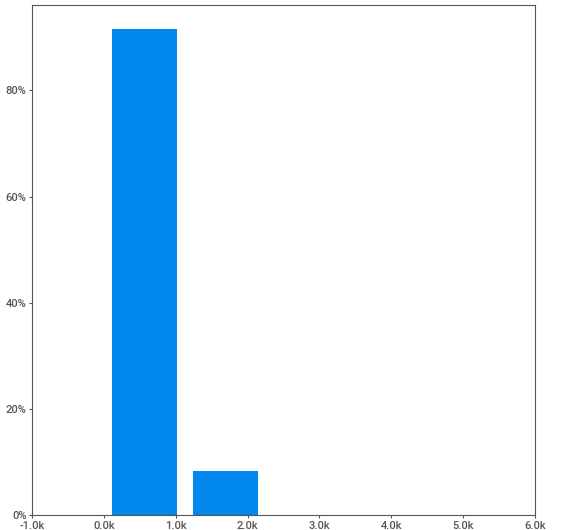
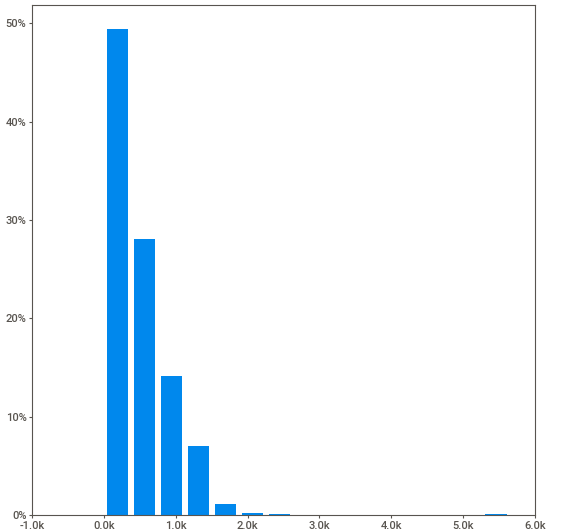
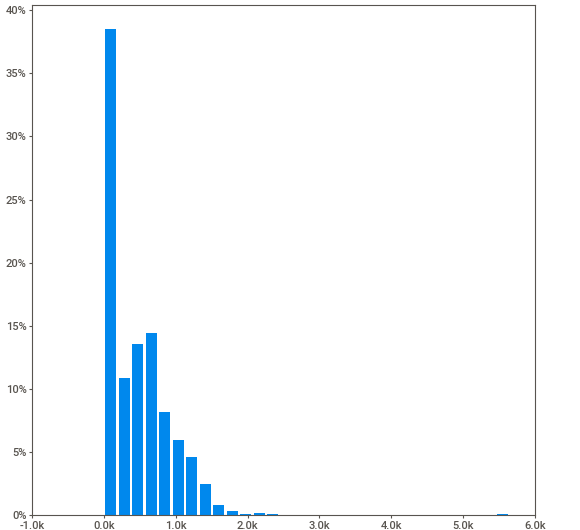
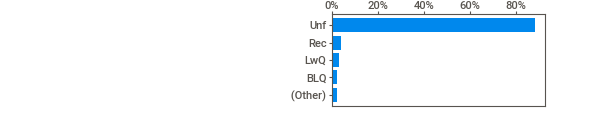
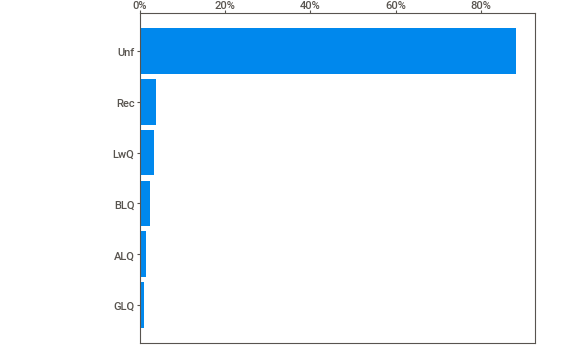
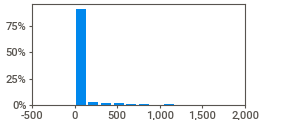
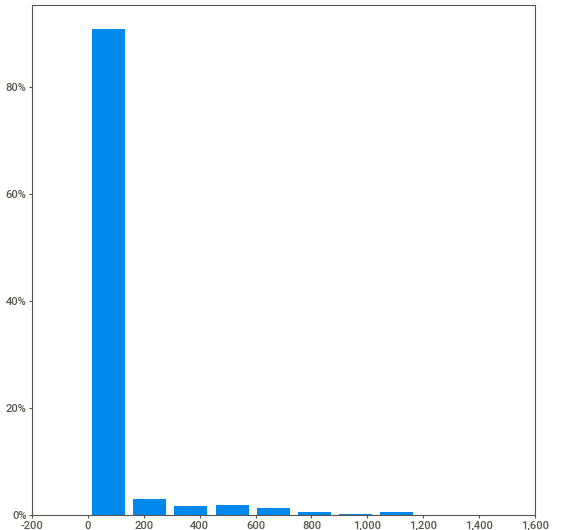
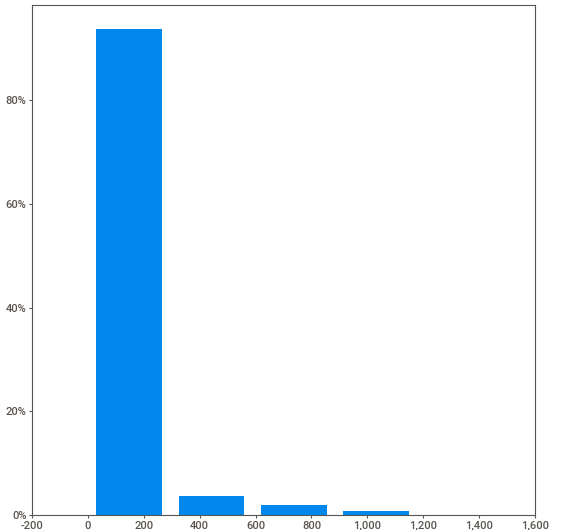
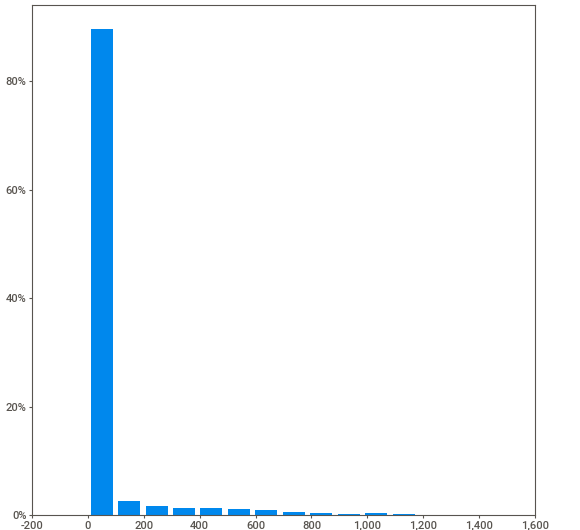
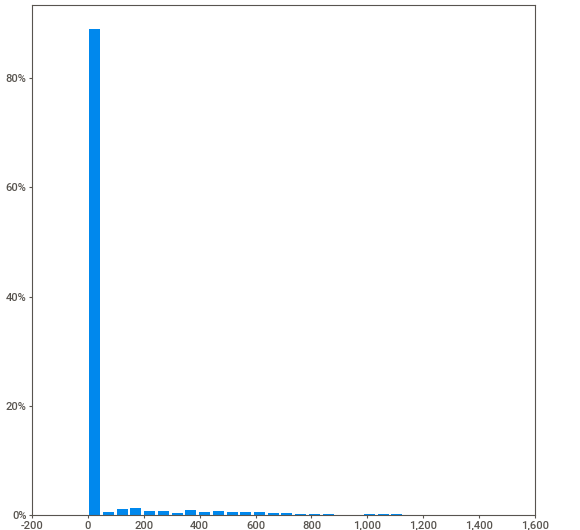
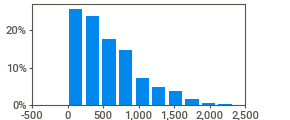
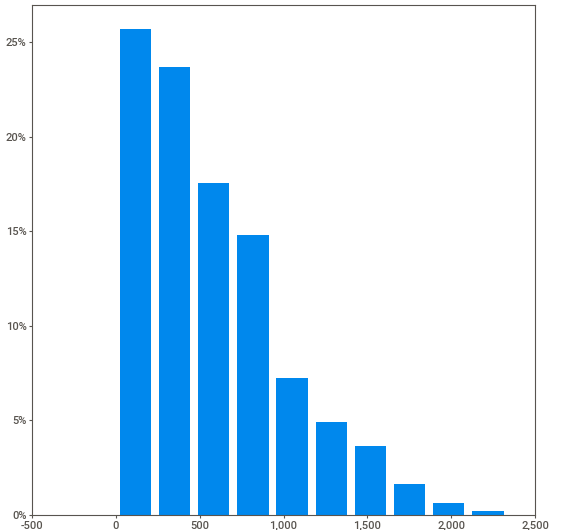
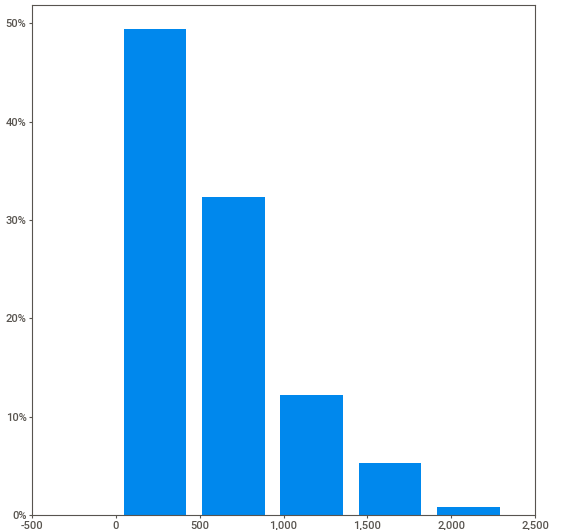
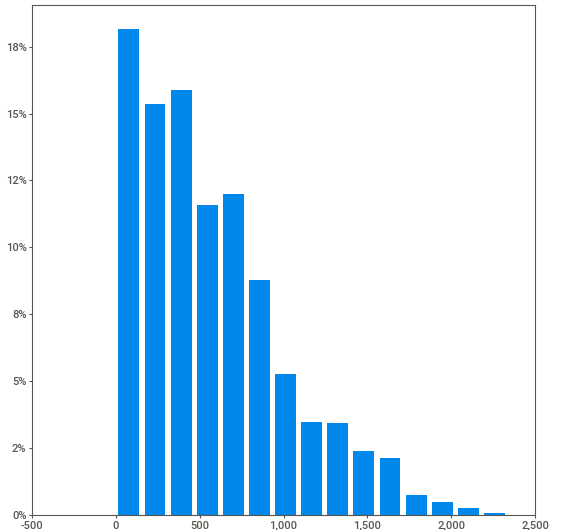
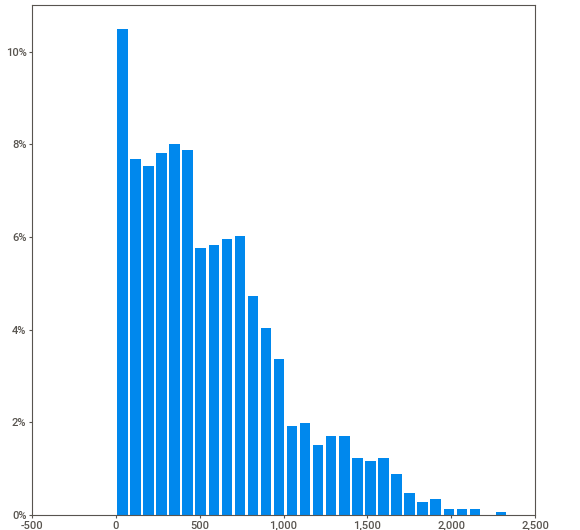
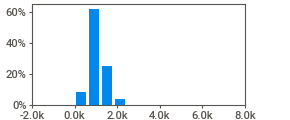
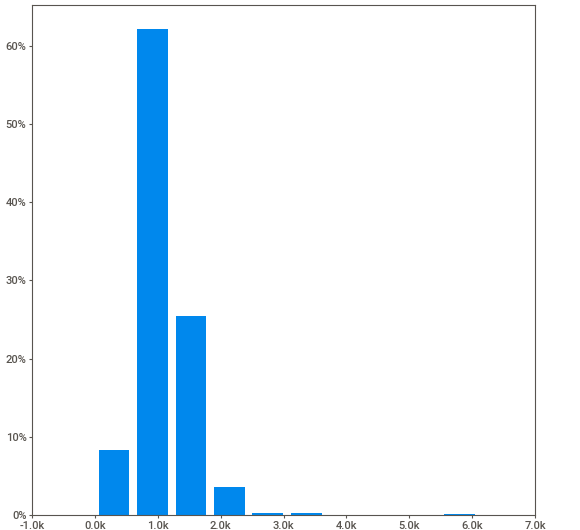
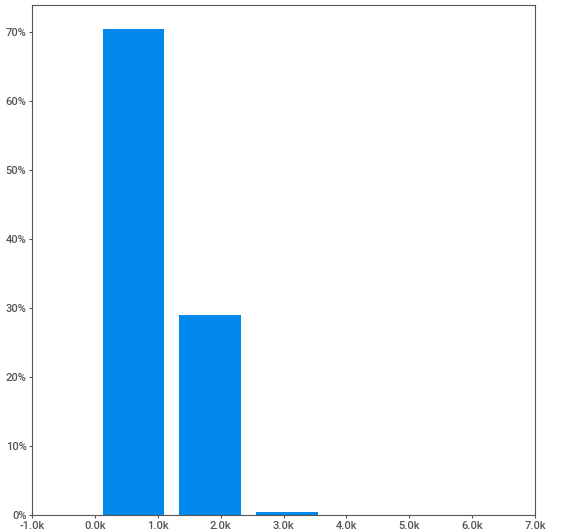
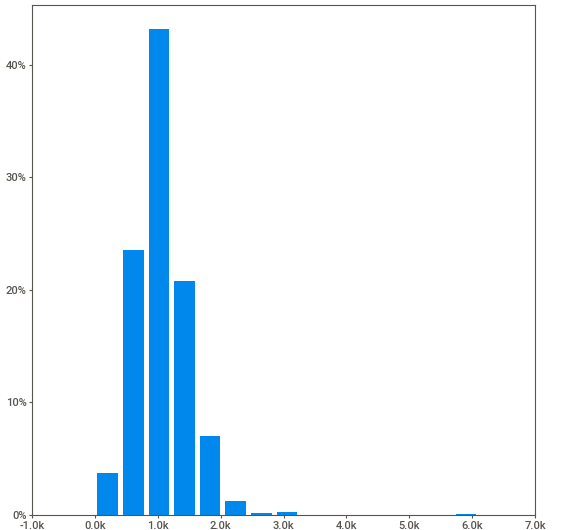
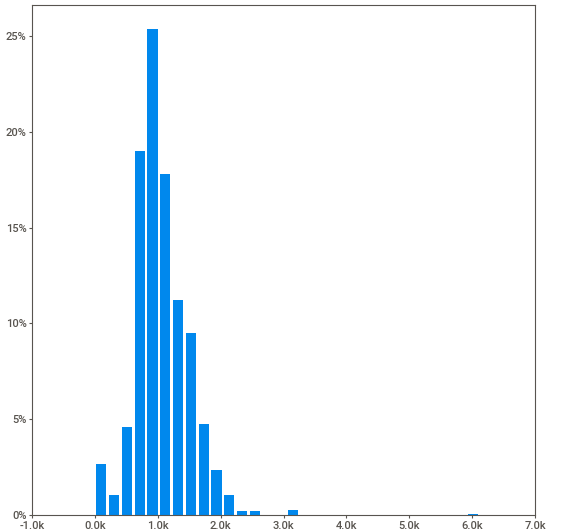
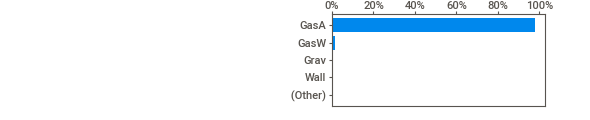
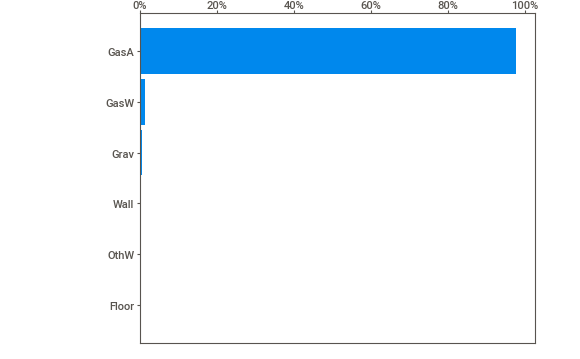
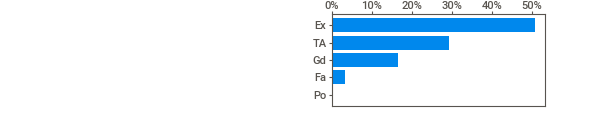
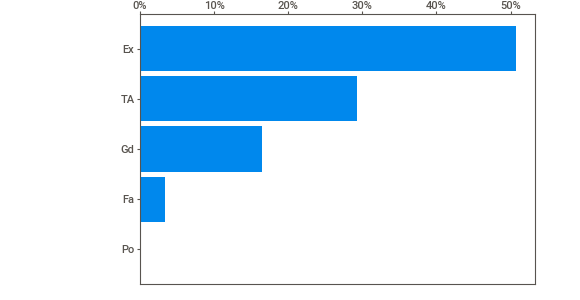
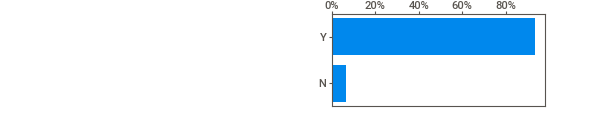
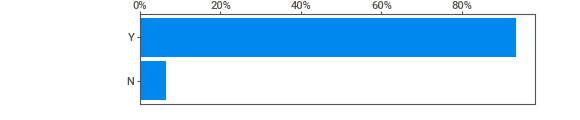
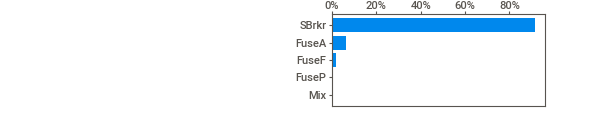
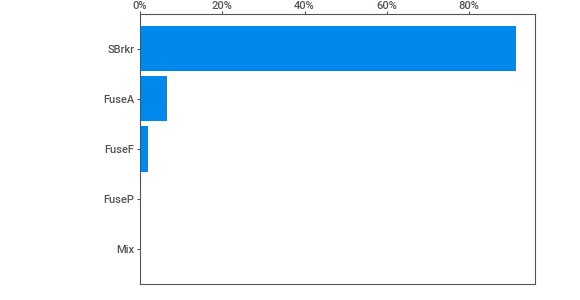
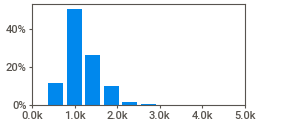
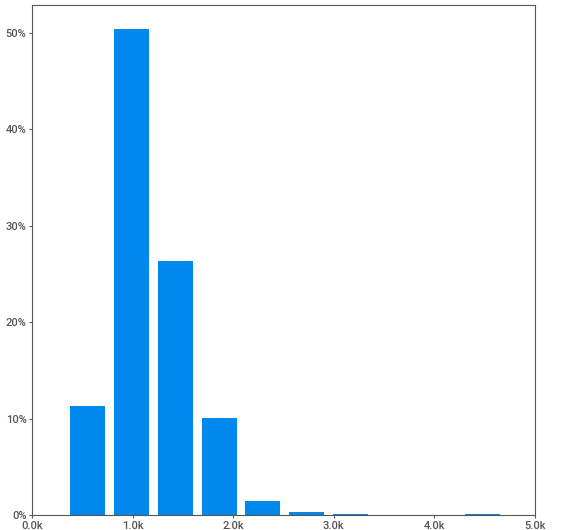
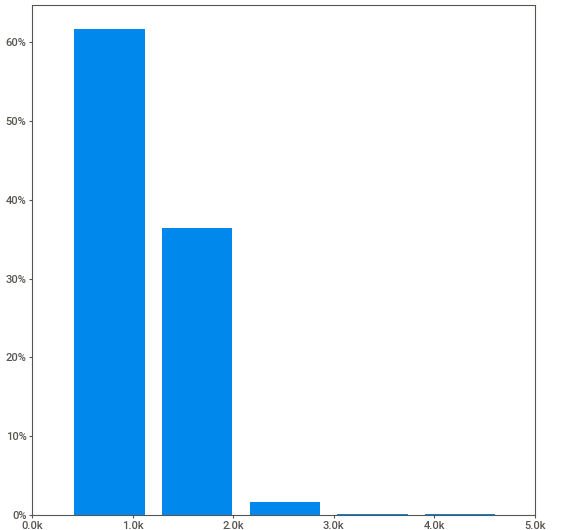
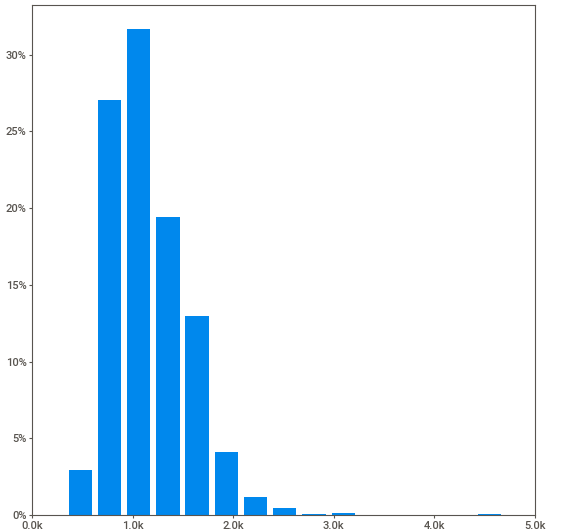
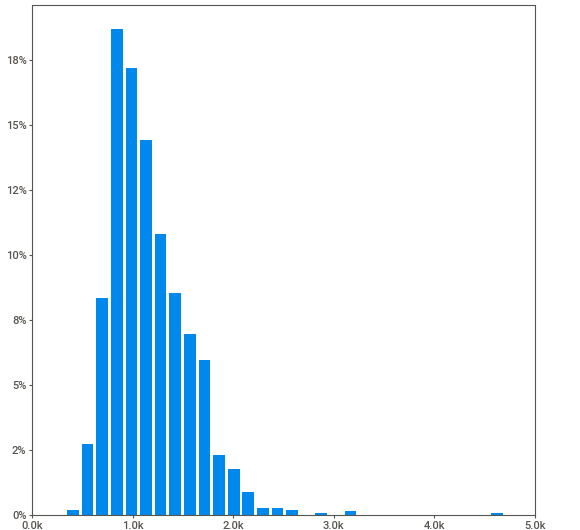
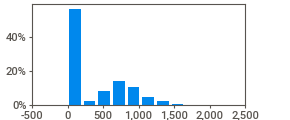
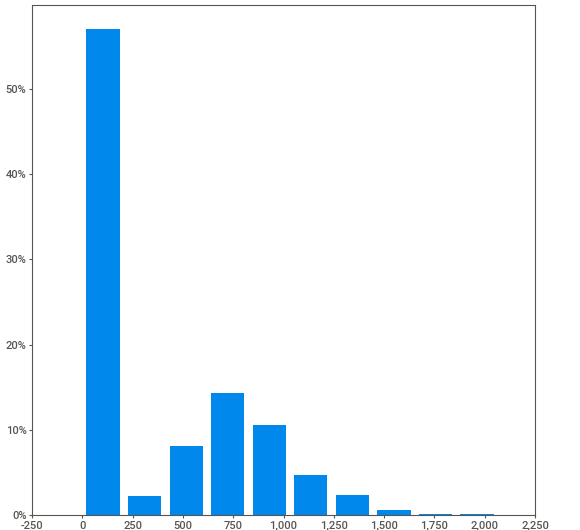
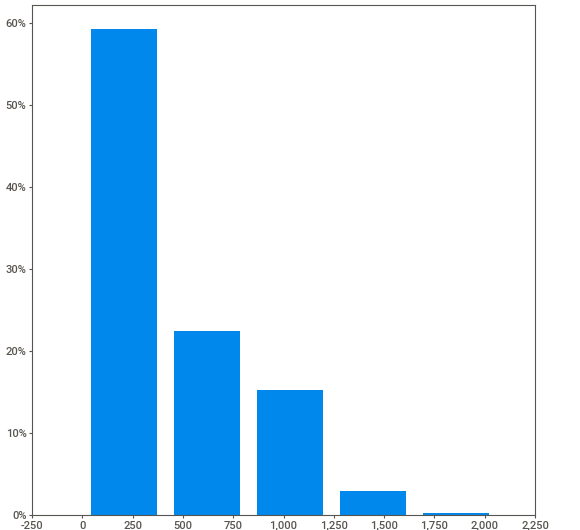
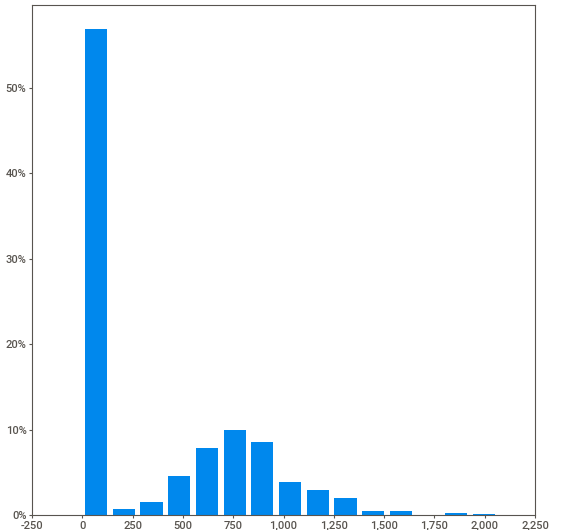
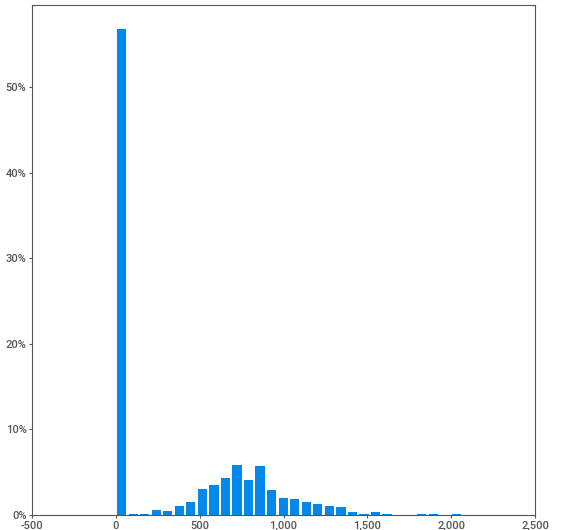
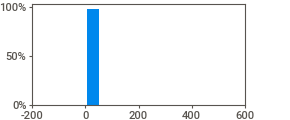
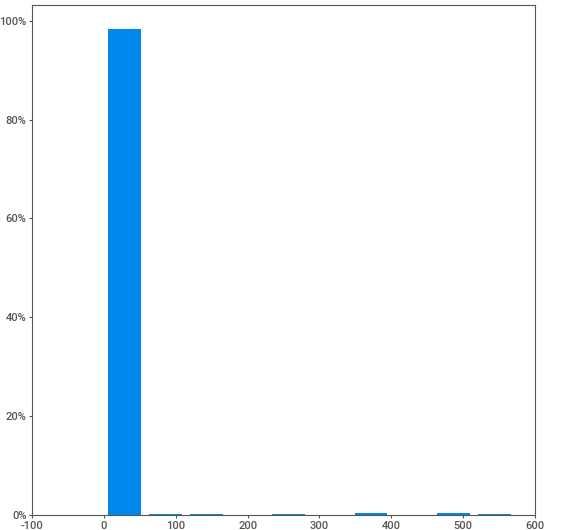
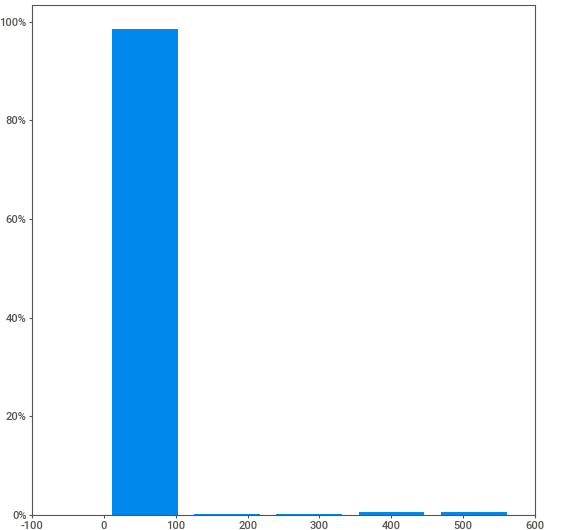
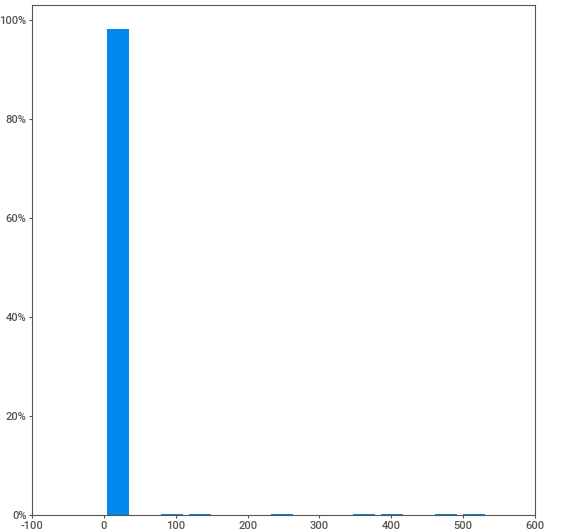
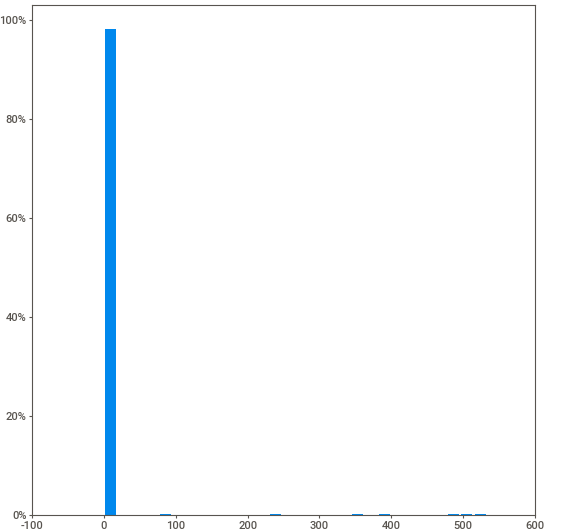
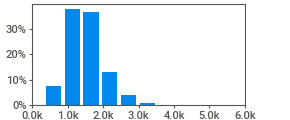
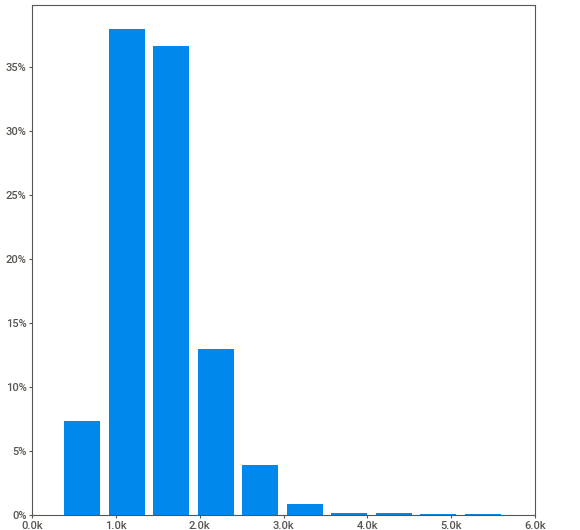
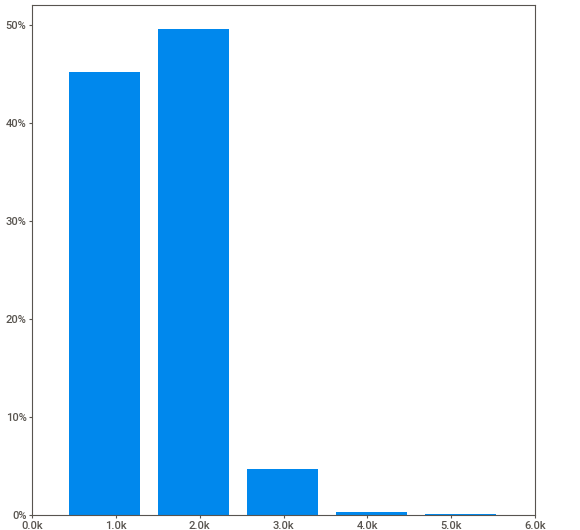
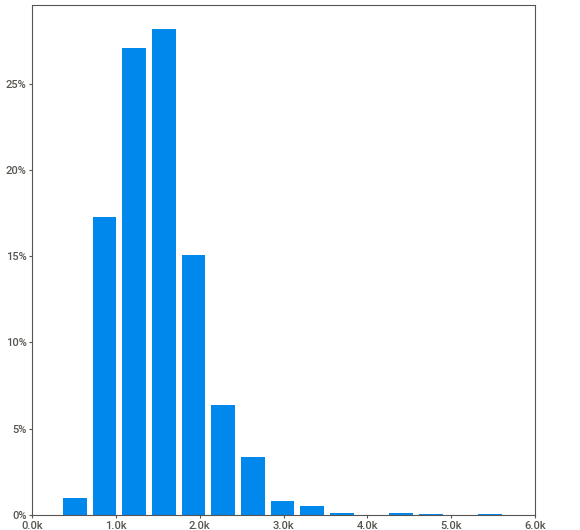
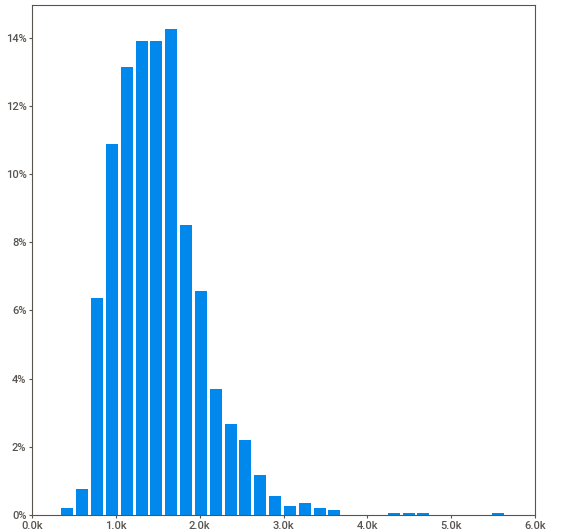
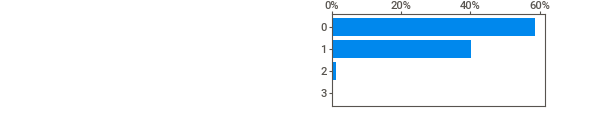
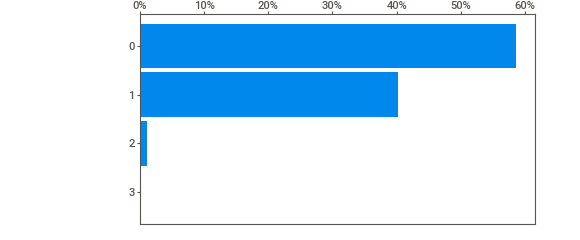
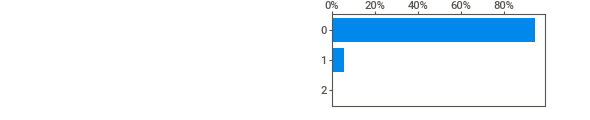
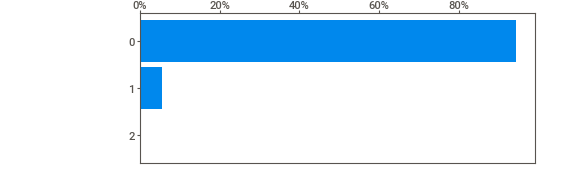
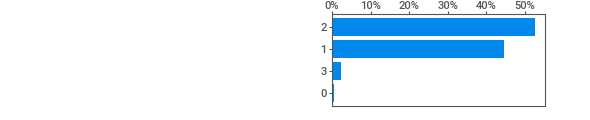
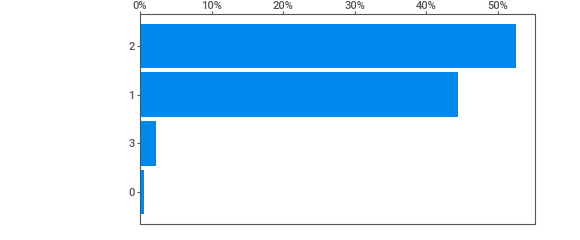
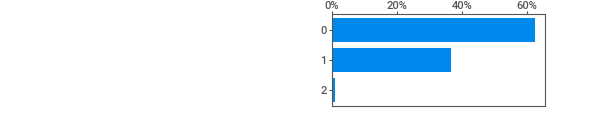
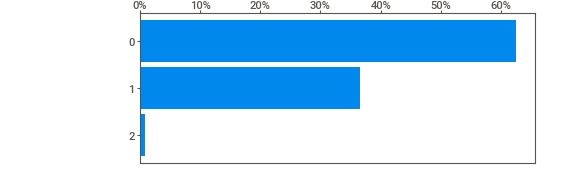
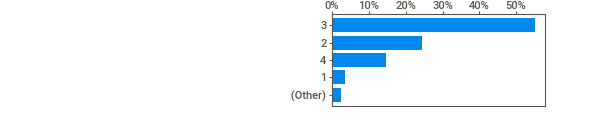
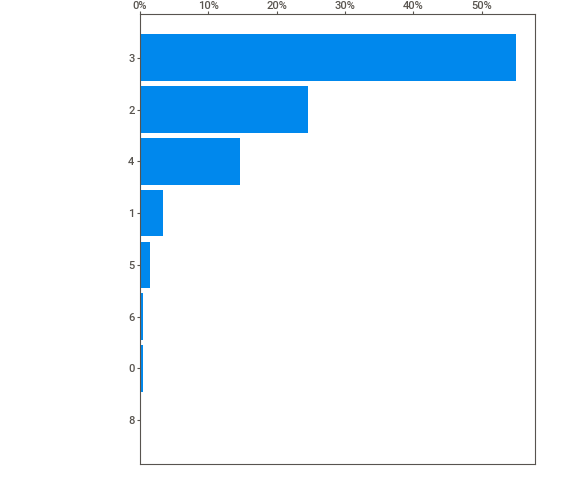
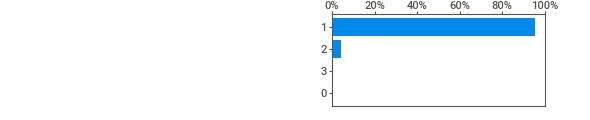
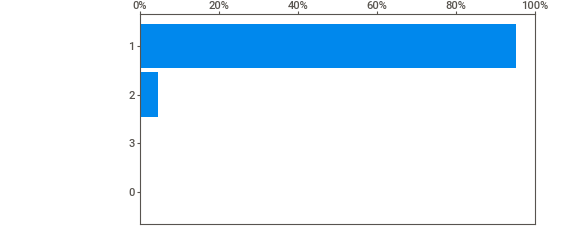
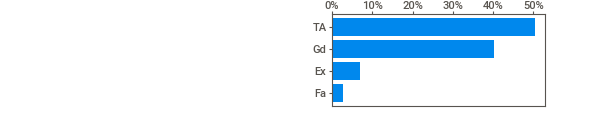
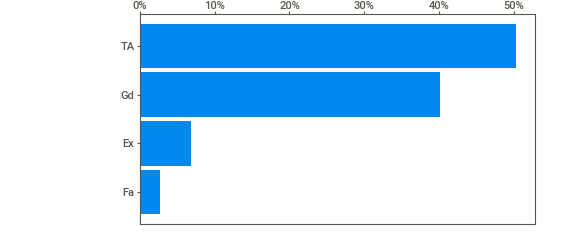
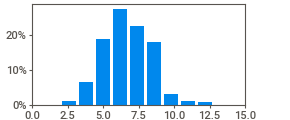
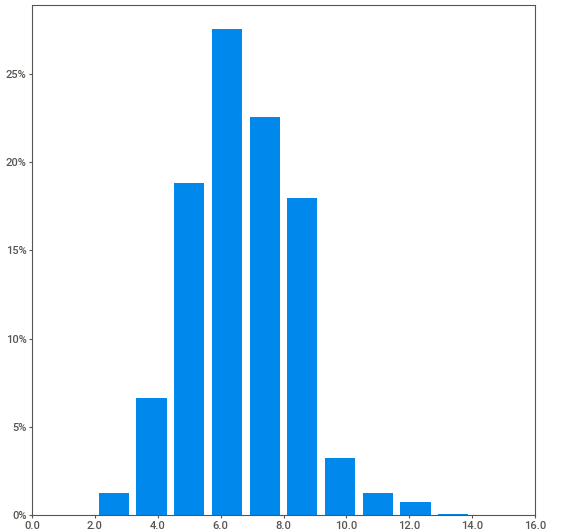
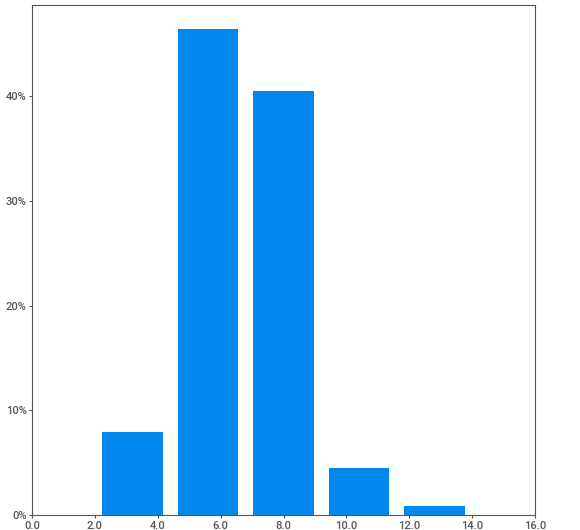
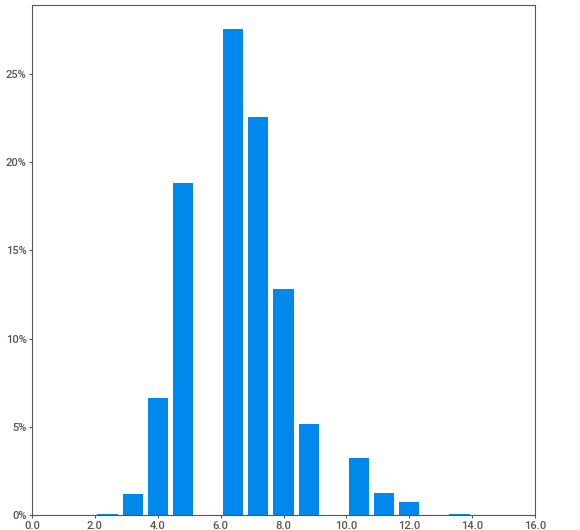
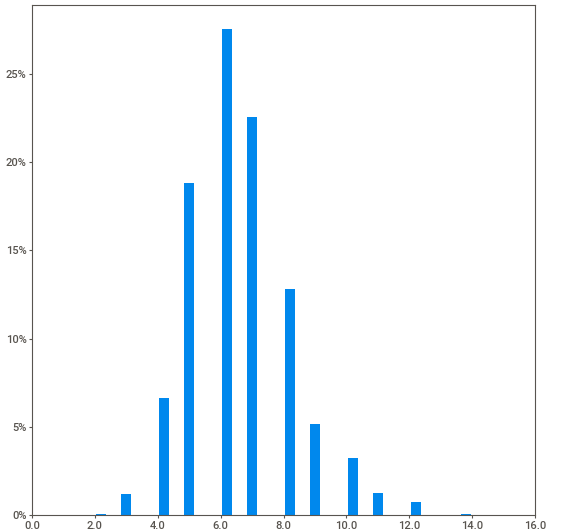
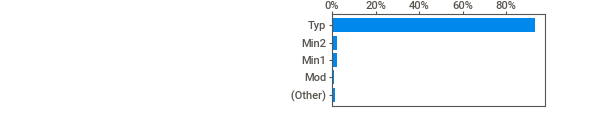
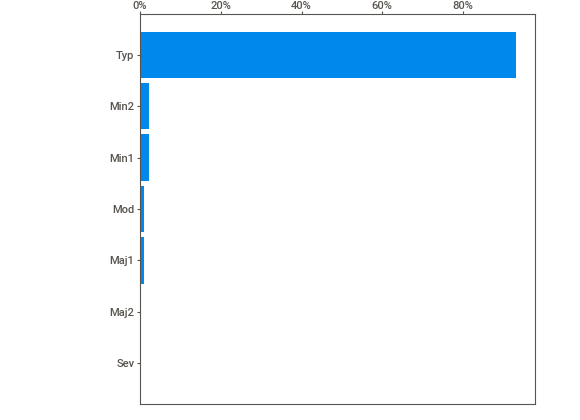
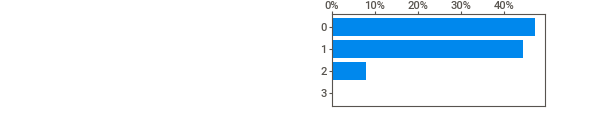
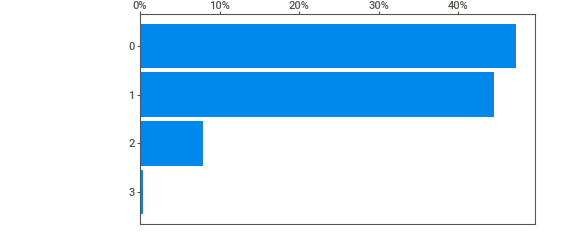
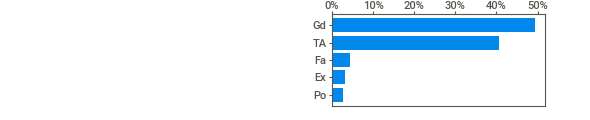
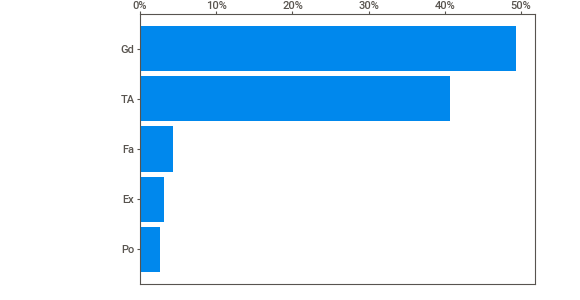
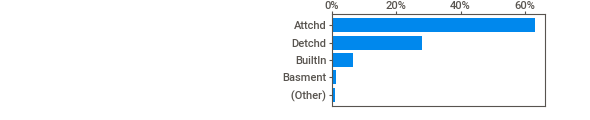
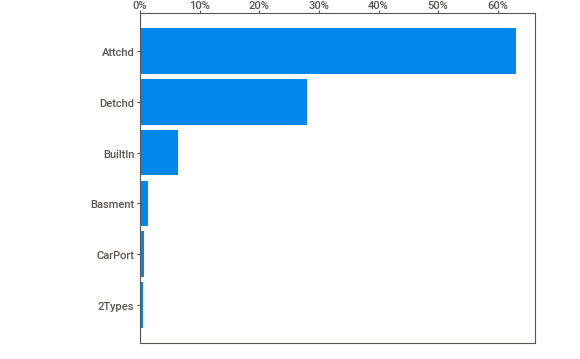
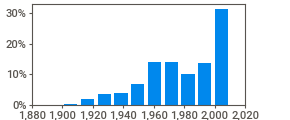
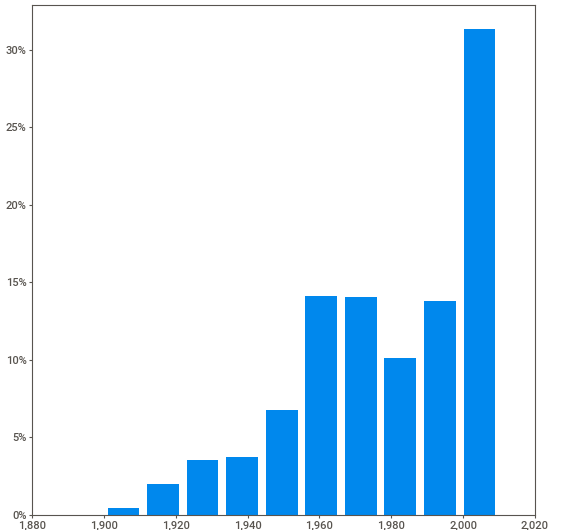
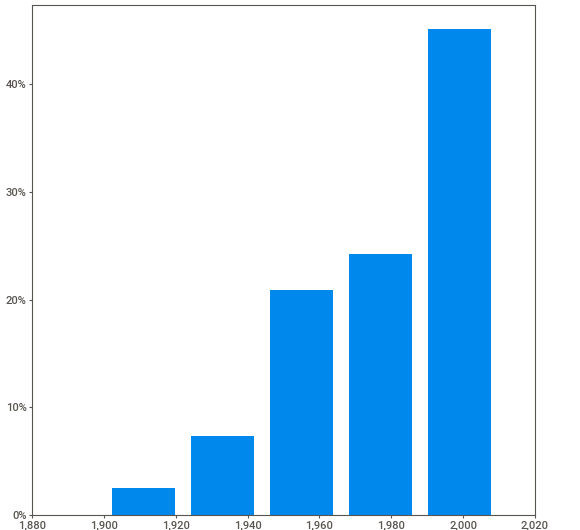
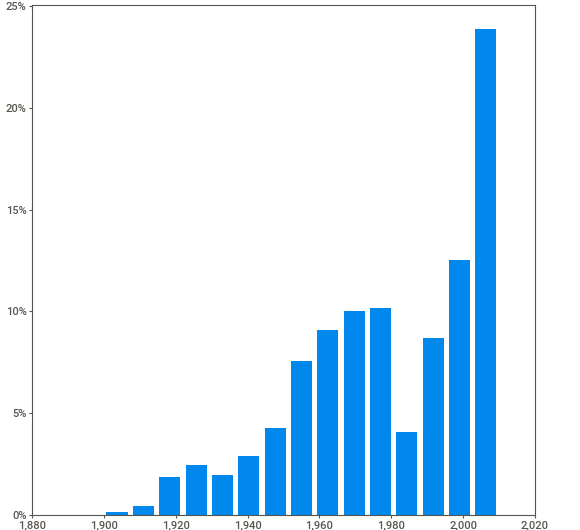
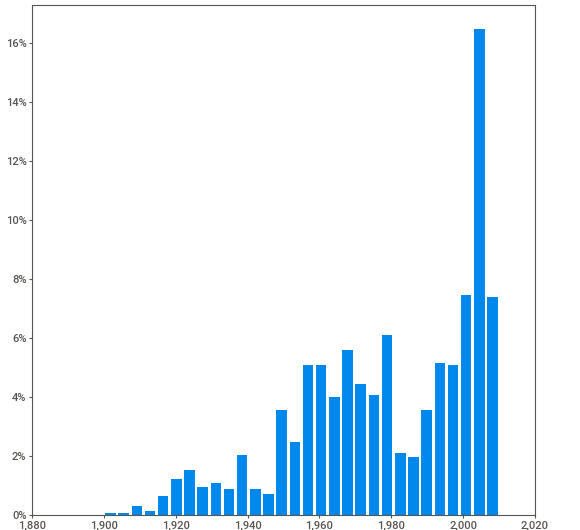
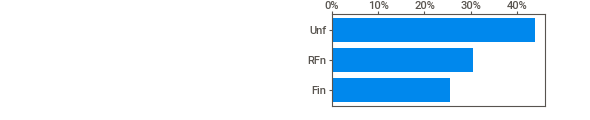
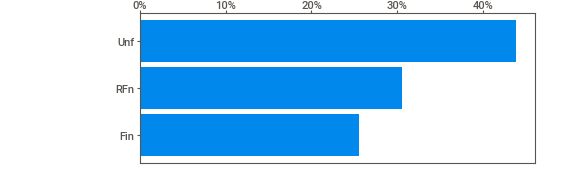
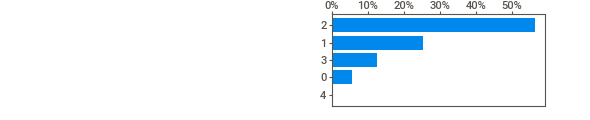
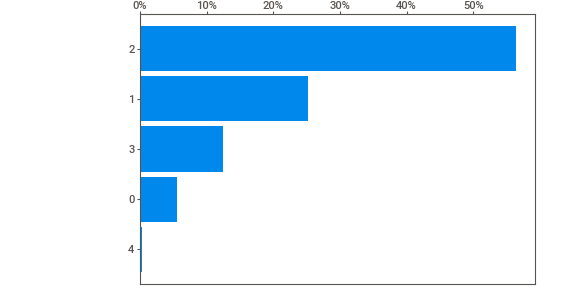
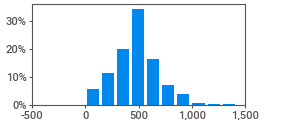
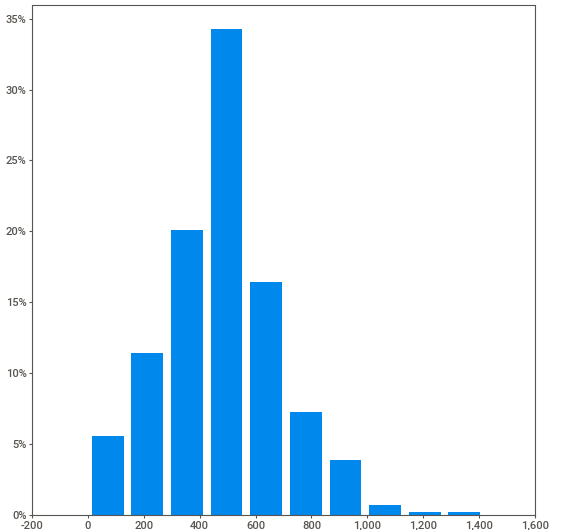
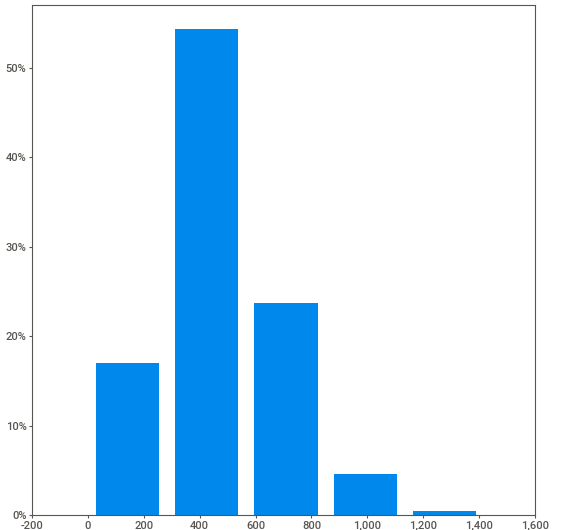
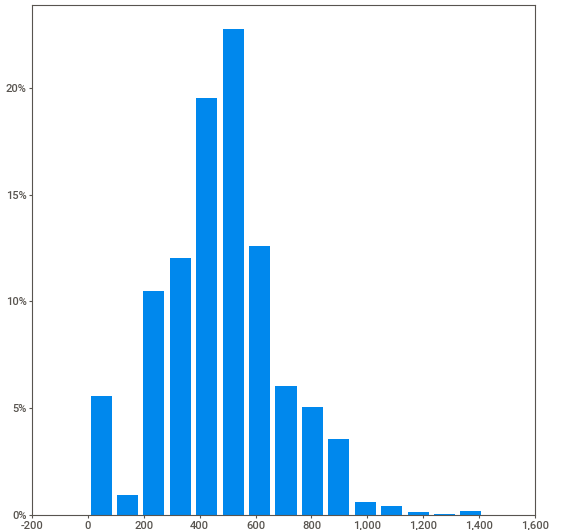
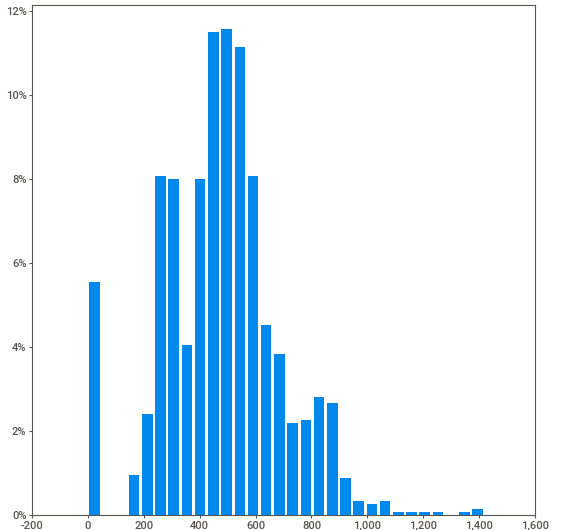
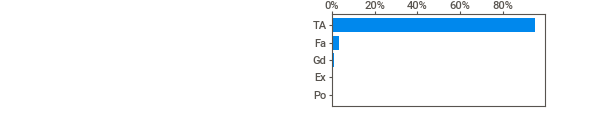
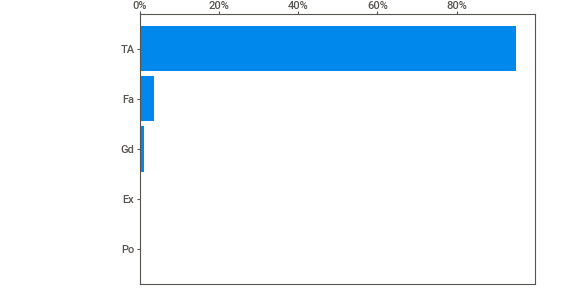
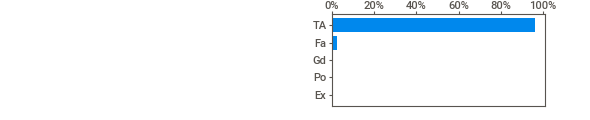
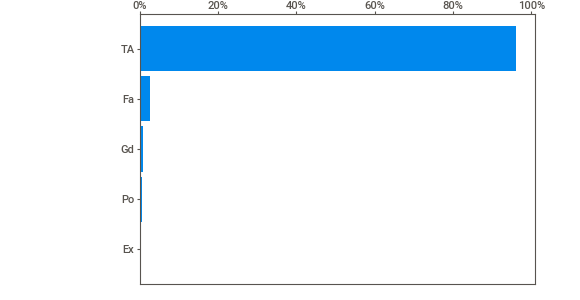
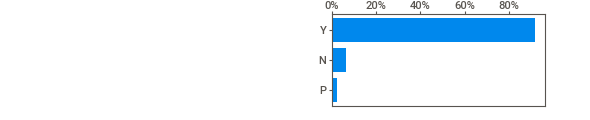
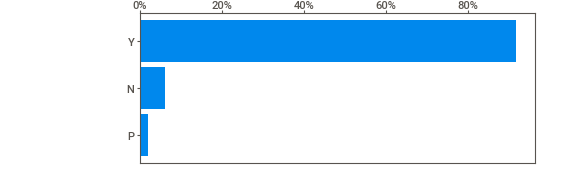
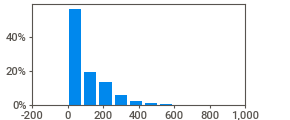
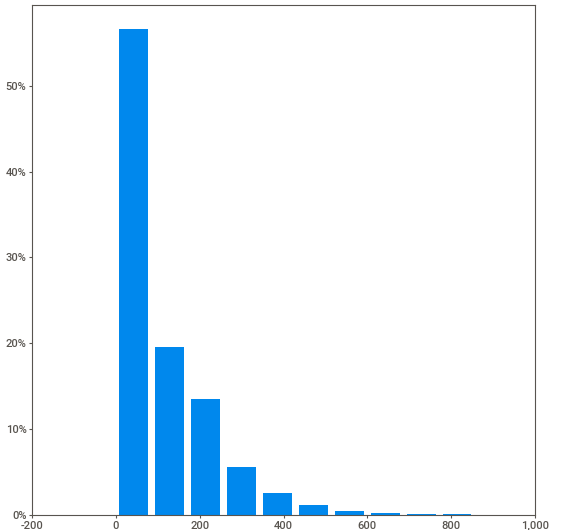
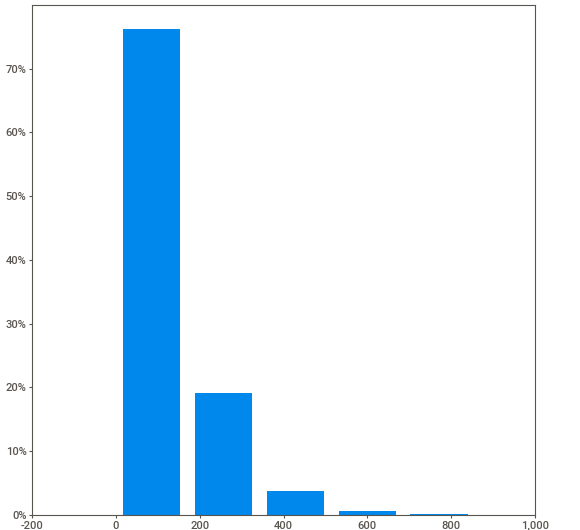
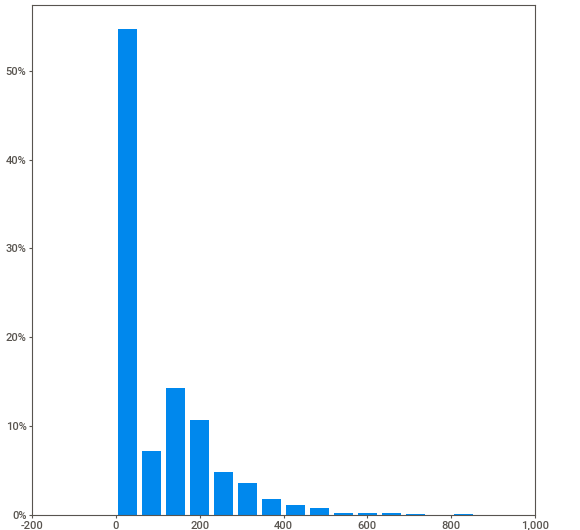
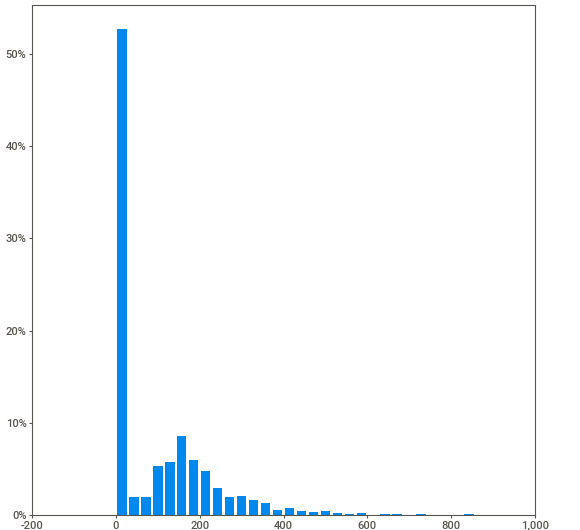
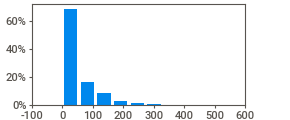
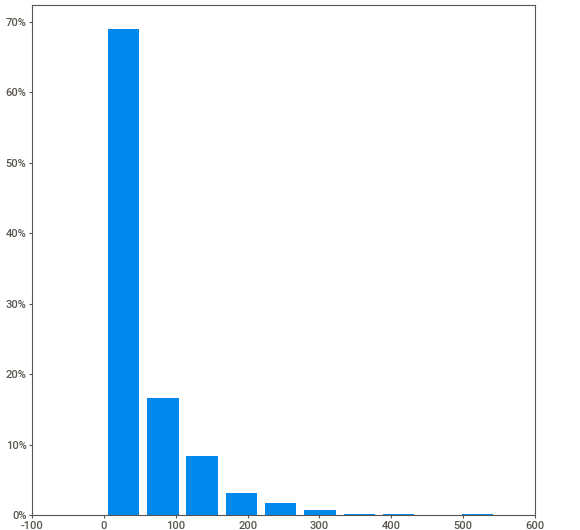
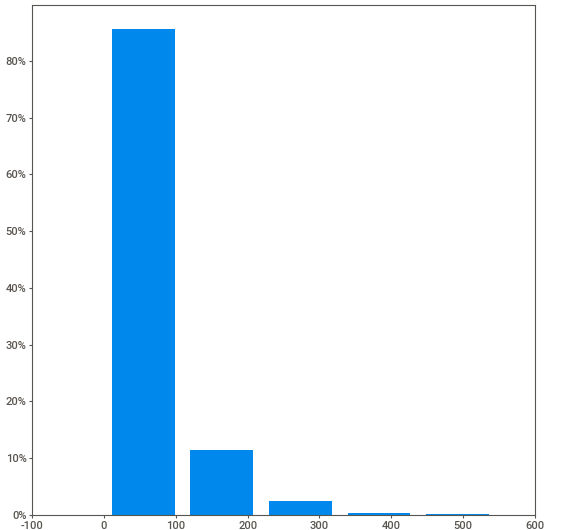
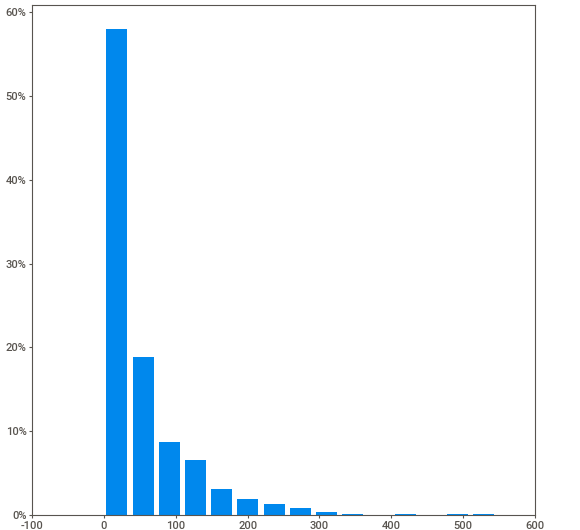
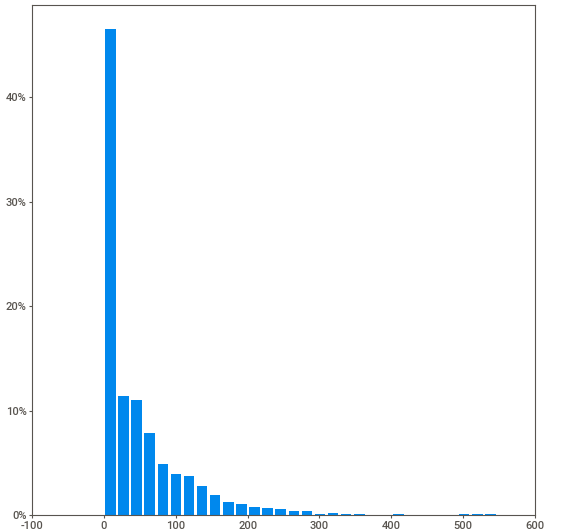
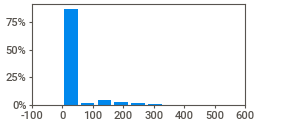
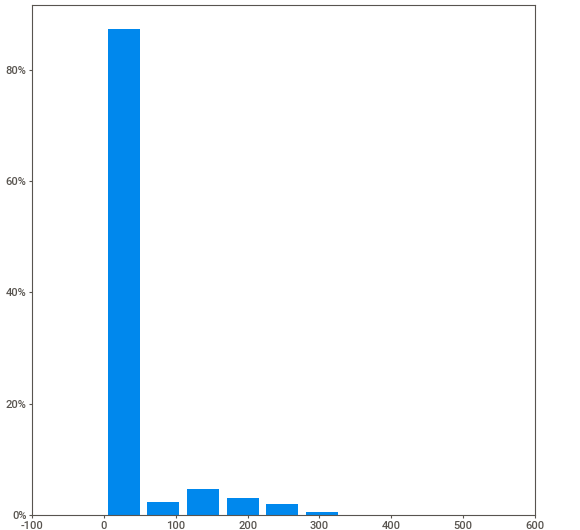
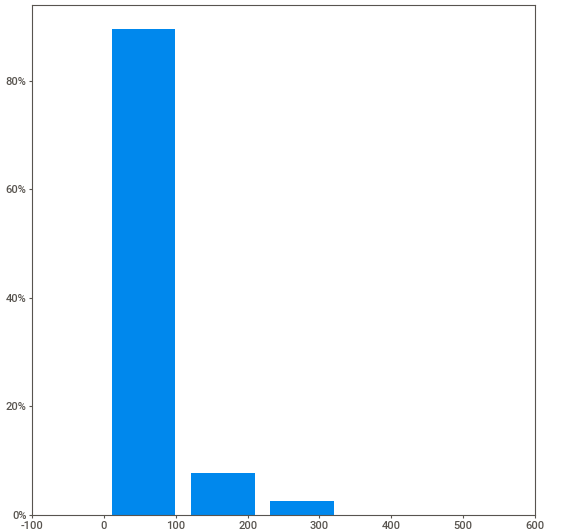
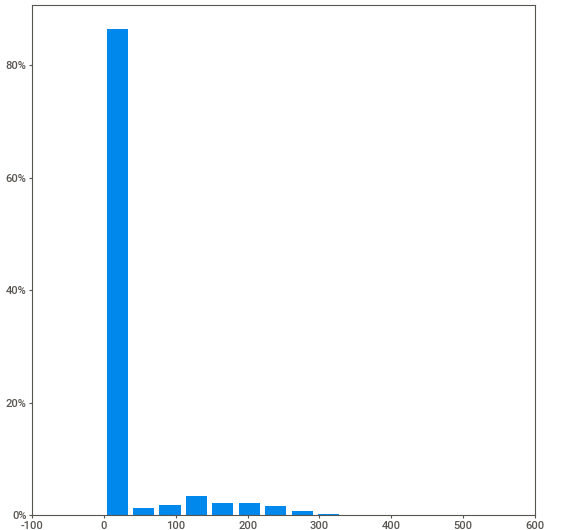
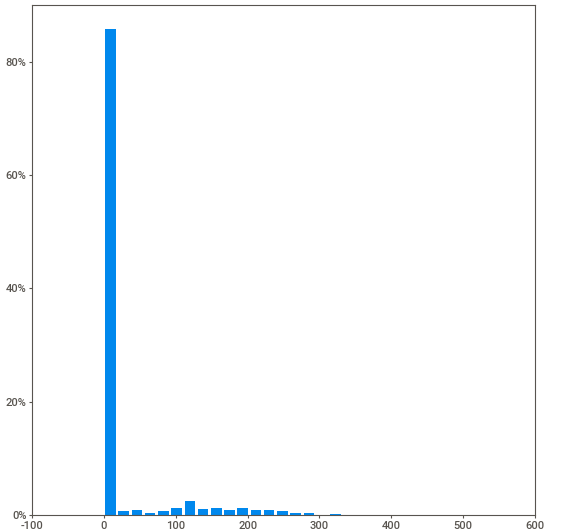
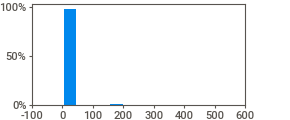
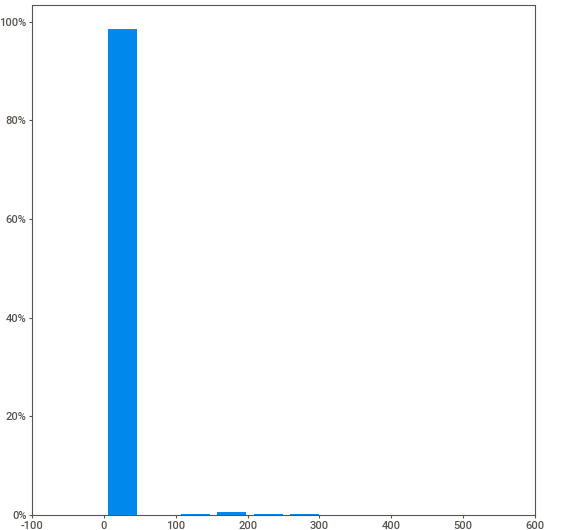
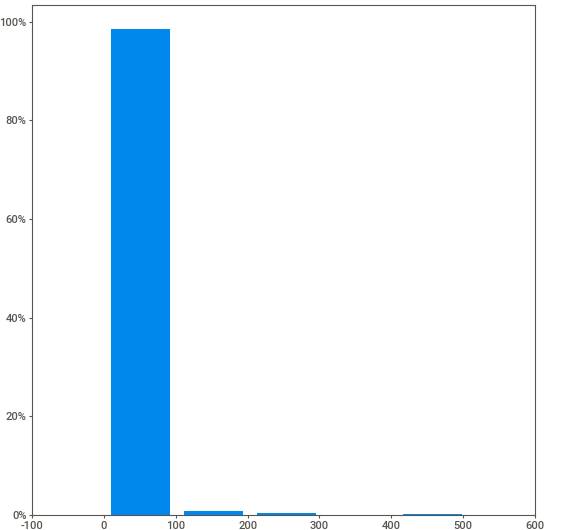
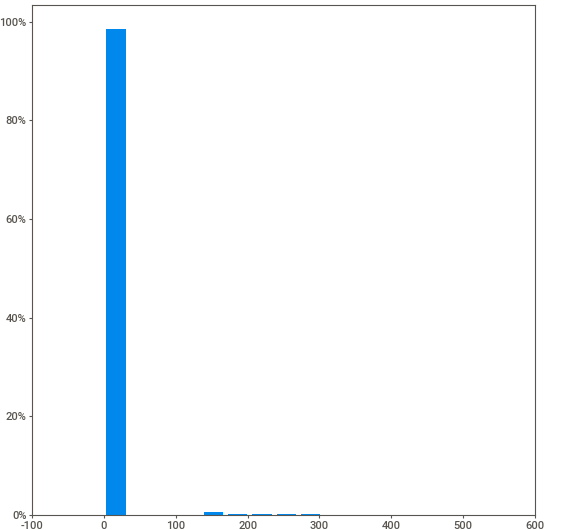
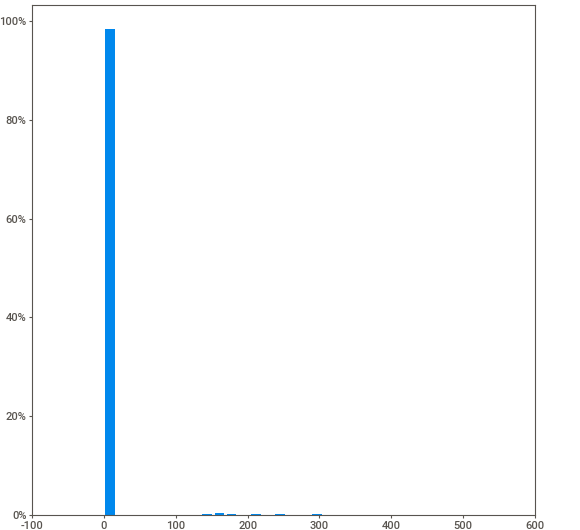
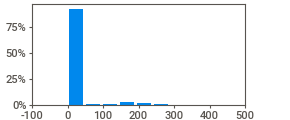
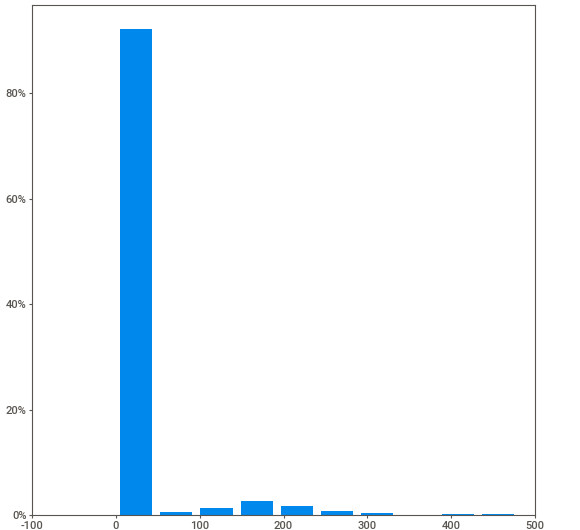
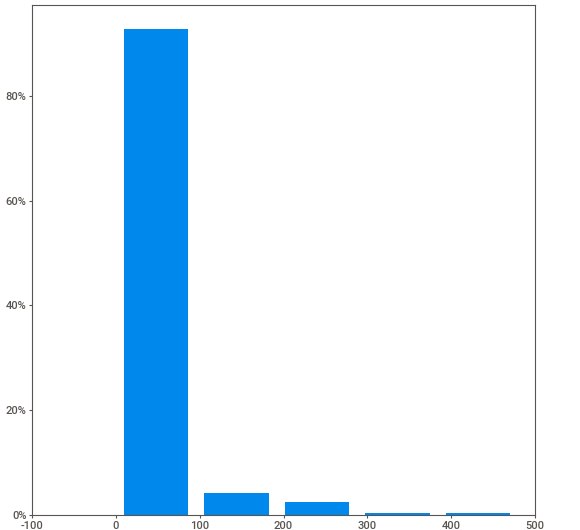
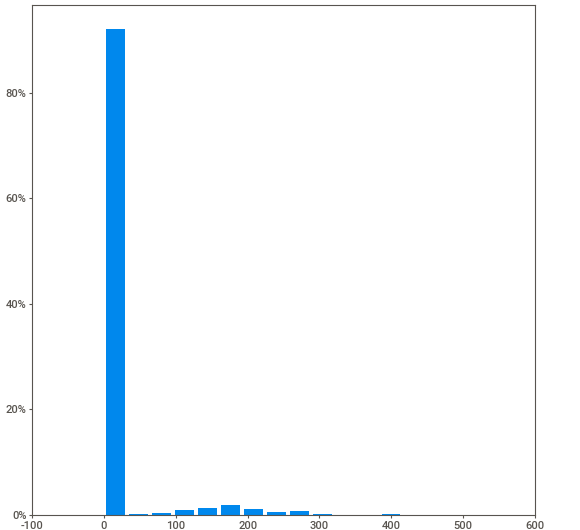
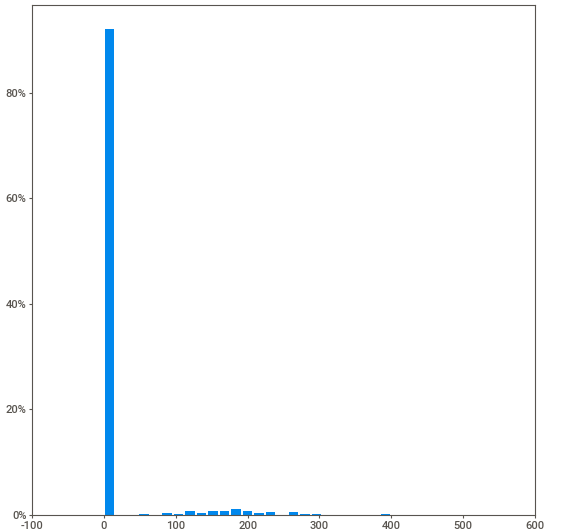
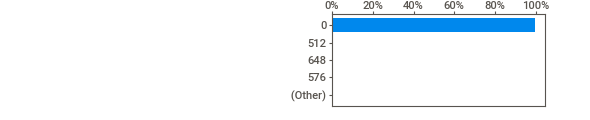
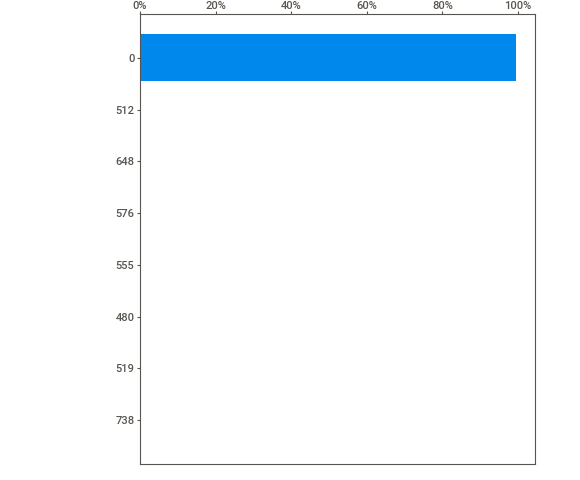
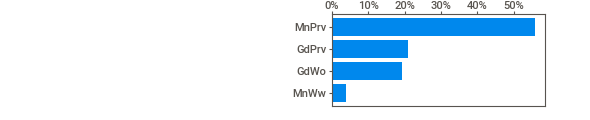
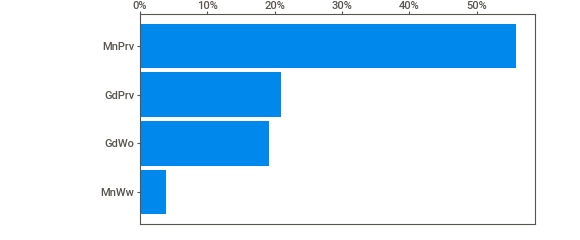
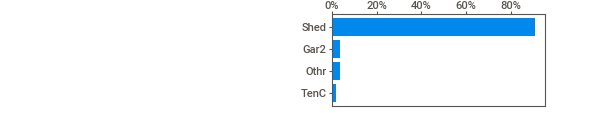
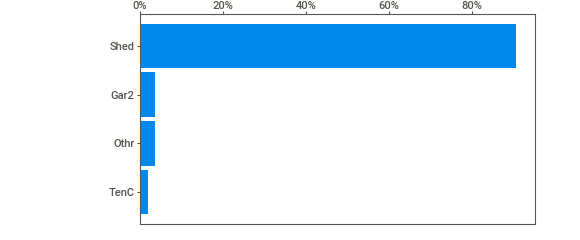
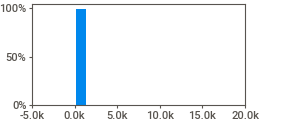
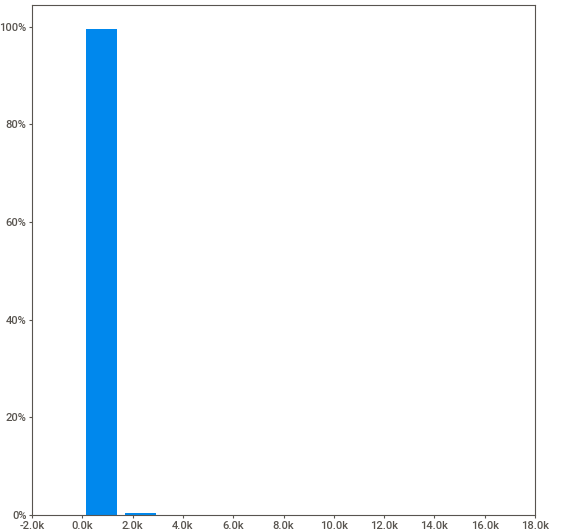
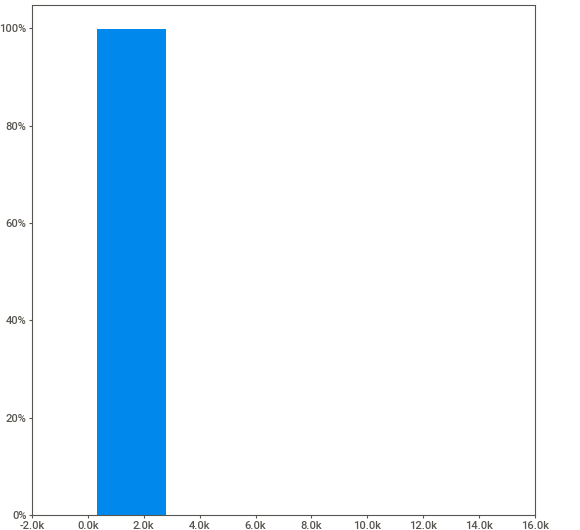
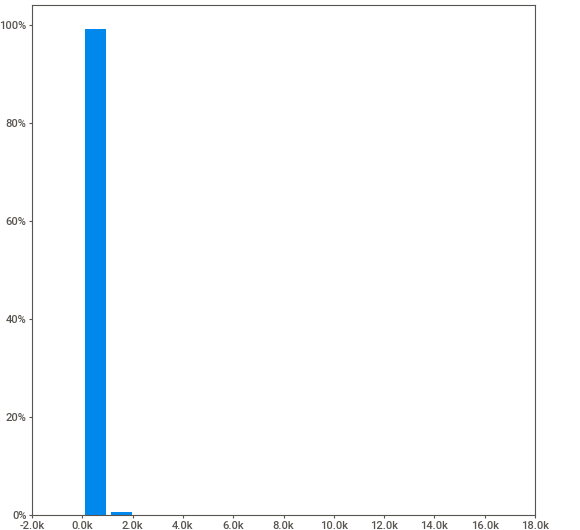
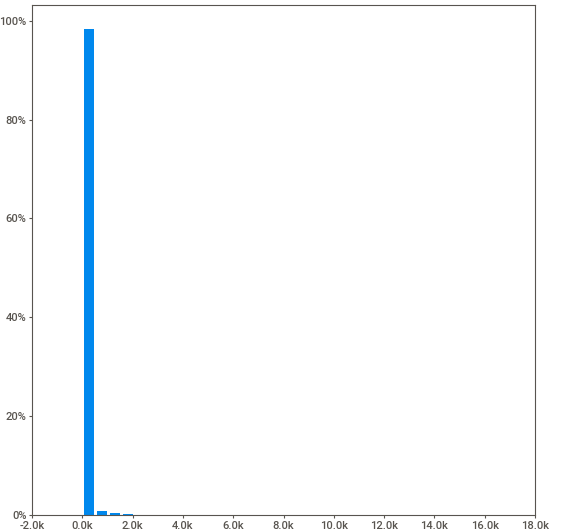
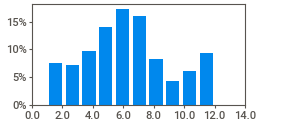
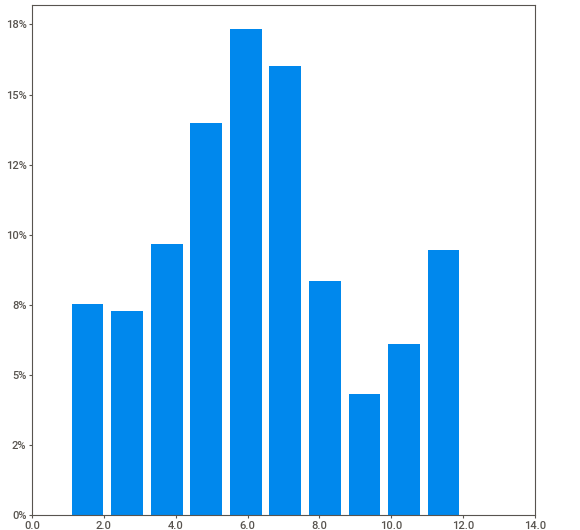
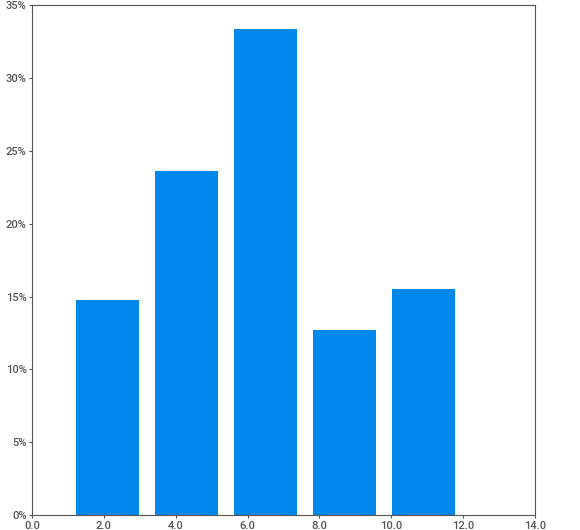
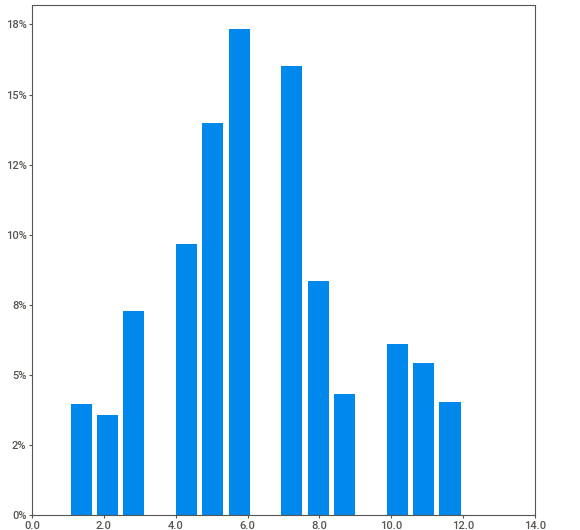
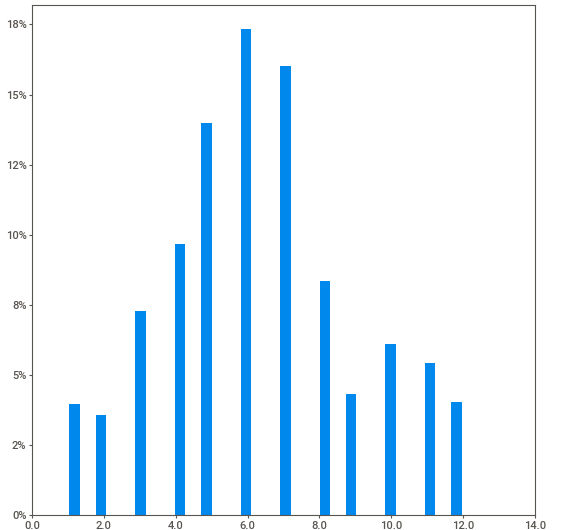
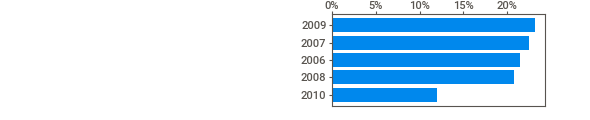
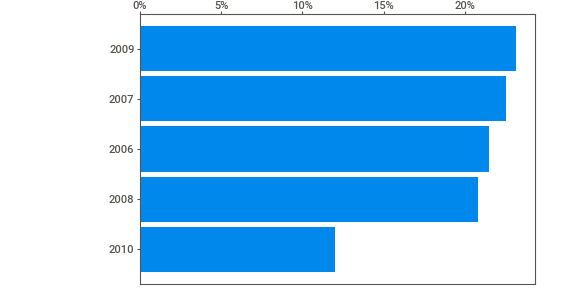
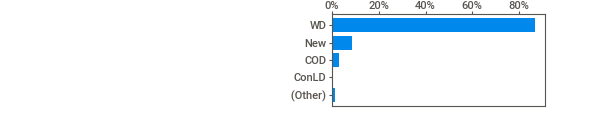
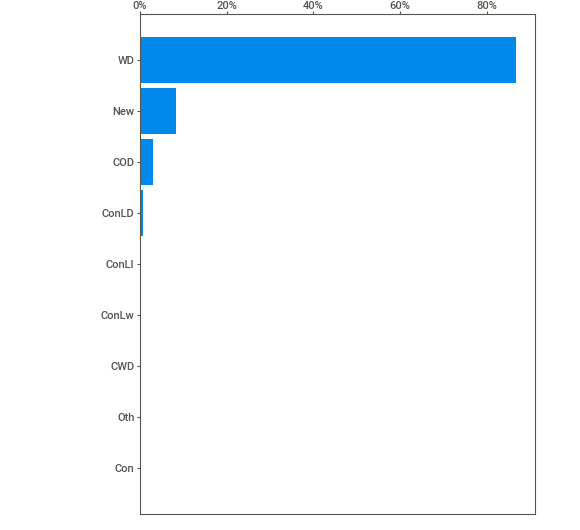
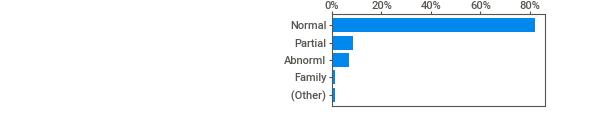
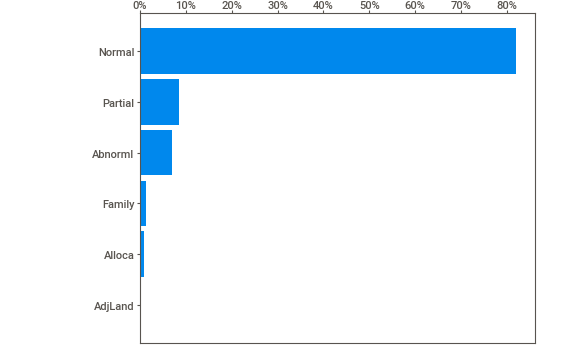
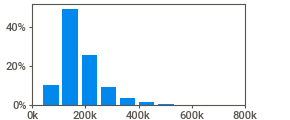
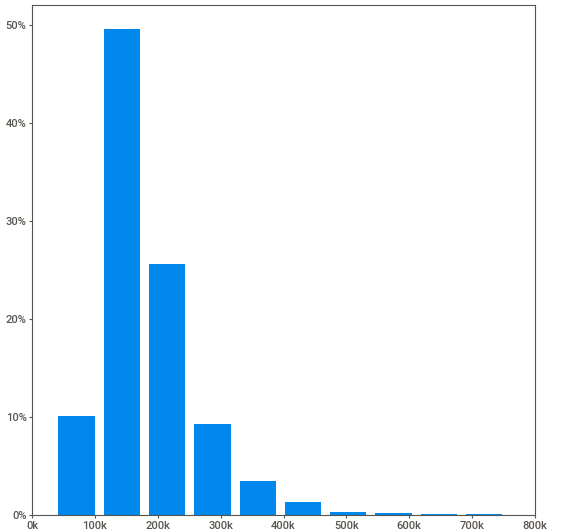
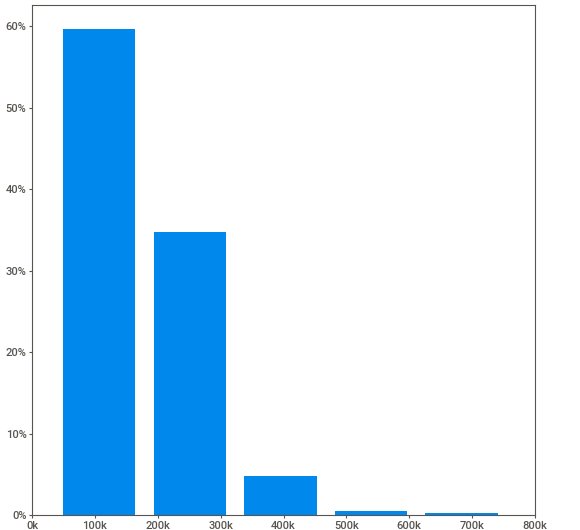
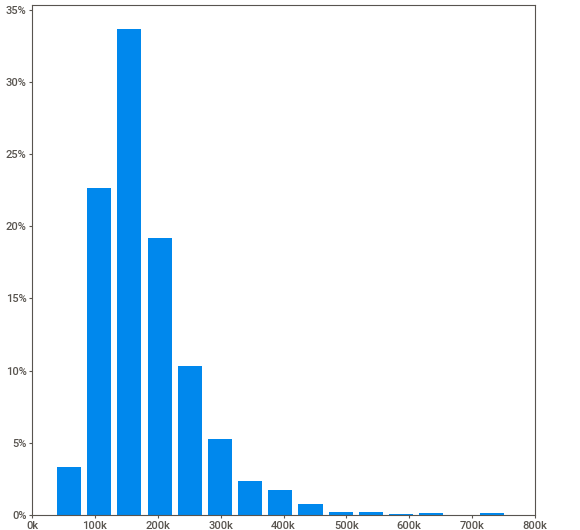
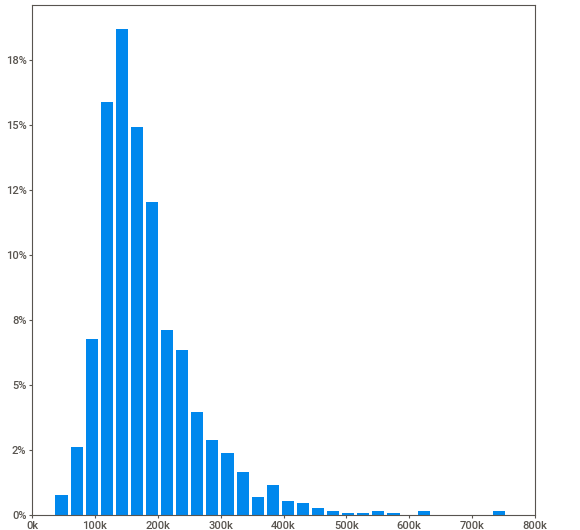
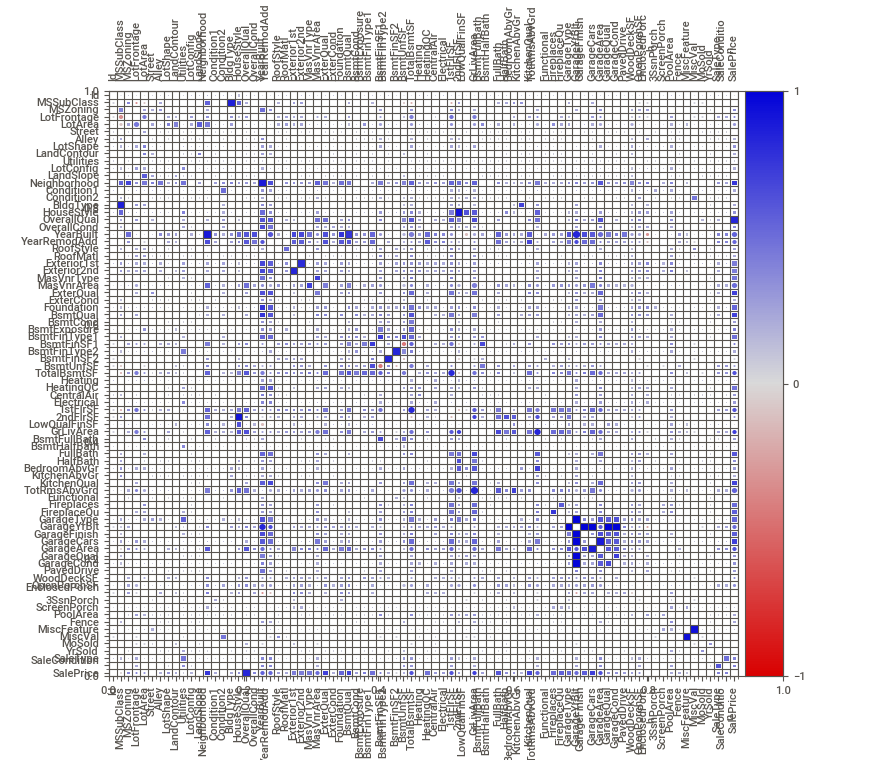
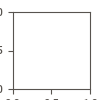

In [10]:
train_report = sw.analyze(train)
train_report.show_notebook(layout='vertical')

### **Insights from the report:**

* 54 categorical features and 24 numerical features  

* missing values: For most of the features that have missing values the NAN/None value (interpreted as missing) is a valid and poosible/expected value for that feature. The only problematic features that this is not true for them are:   
`LotFrontage` (18%), `GarageYrBlt` (6%), `MasVnrArea` (1%), `Electrical` (1%)

* There are features that are not **normally distributed** (for example: `LotArea`, `1stFlrSF`)

* Numerical features that have a **high** correlation with SalePrice:  
`GrLivArea` (0.71), `GarageArea` (0.62), `TotalBsmtSF` (0.61)

* Categorical features that have a **high** correlation with SalePrice:  
`OverallQual` (0.83), `Neighborhood` (0.74), `GarageCars` (0.70), `ExterQual` (0.69)

### **Insights from the Sweetviz Report**

* **Feature types:**  
    54 categorical features and 24 numerical features  

* **Key Numerical Features:**  
    `GrLivArea` - has a strong positive correlation with SalePrice. We will make sure to include this feature in the model.  
    `GarageCars` and `GarageArea`: The number of cars the garage can hold and the size of the garage both have strong correlations with the sale price.  
    `TotalBsmtSF` - This is another important feature that we will consider combining it with other area-related features.  
    `1stFlrSF` - has a strong positive correlation with SalePrice

* **Key Categorical/Ordinal Features:**  
    `OverallQual` - has a strong positive correlation with SalePrice and is a key predictor. We can understand from this that High-quality houses sell for more. 
    
    `Neighborhood` - has a strong positive correlation with SalePrice and is a key predictor. This indicates that there is a clear differences in average SalePrice across different neighborhoods.  
    <!-- Insight: Encode Neighborhood using one-hot encoding to capture location-based price variations. -->  

    Other features that are highly correlated with SalePrice: `ExterQual`, `BsmtQual`, `KitchenQual`  
    <!-- Insight: Ensure these features are encoded properly (e.g., ordinal encoding) to capture the quality effect. -->  
    
* **Missing Values:**    
    Several features have missing values, e.g., PoolQC, MiscFeature, Alley, Fence, etc. but for most of the features that have missing values the NAN/None value (interpreted as missing) is a valid and poosible/expected value for that feature. The only problematic features that this is not true for them are:   
    `LotFrontage` (18%), `GarageYrBlt` (6%), `MasVnrArea` (1%), `Electrical` (1%)  
    
    In order to handle the missing values we will consider:  
    - removing the empty rows  
    - for numerical features, we can use the median or mean imputation.  

* **Outliers:**  
    Outliers are present in `GrLivArea` (extremely large houses) and `SalePrice` (very high prices).  
    We will investigate and potentially remove or transform outliers to prevent them from giving an untrue result.  

* **Feature Distributions:**  
    Features like `GarageArea`, `TotalBsmtSF`, and `1stFlrSF` have distributions that can be normalized.  

* **Feature Interactions:**  
    `OverallQual` and `GrLivArea` - Both features show strong positive correlations with SalePrice.  
    We will create a new feature to capture the combined effect (OverallQual * GrLivArea).  

* **Age-Related Features:**  
    `YearBuilt` and `YearRemodAdd`: Newer houses tend to have higher SalePrice.  
    We will create an Age feature to capture the effect of the house's age.  

* **Dominating Values:**  
    Some features in our dataset have a value that fills more than 90% of the column.  
    We will consider removing this types of features.

### Data Visualization
We will create some functions to visualise the data in order to:
* better understand the relationships between the features and the target
* find out which features correlate with each other

In [11]:
# define plt settings
# sns.set_theme(style="whitegrid")
# plt.figure(figsize=(20,10))
# plt.rcParams["font.size"] = 20
# plt.rcParams["axes.labelsize"] = 20
# plt.rcParams["xtick.labelsize"] = 20
# plt.rcParams["ytick.labelsize"] = 20
# plt.rcParams["legend.fontsize"] = 20
# plt.rcParams["figure.figsize"] = (20, 10)

*visualise the distribution of a variable using a histplot*

In [12]:
def distribution_histplot(feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(train[feature], kde=True, bins=100)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

*Visualize the correlation between numerical features using a heatmap*

In [13]:
def heatmap_high_correlations(df, target, threshold=0.5):
    numeric_data = df.select_dtypes(include=['number'])
    corr_matrix = numeric_data.corr()
    high_corr = corr_matrix[target][abs(corr_matrix[target]) >= threshold]
    high_corr_features = high_corr.index
    filtered_corr_matrix = corr_matrix.loc[high_corr_features, high_corr_features]
    plt.figure(figsize=(10, 8))
    sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Heatmap of features with correlation >= {threshold} with {target}')
    plt.show()

*Visualize the correlation between numerical features and the target using a Scatter plot*

In [14]:
def get_scatter_plot(numerical_features, target):
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=train[feature], y=train[target])
        plt.title(f'{feature} vs {target}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.show()

### Visualize the Target Variable distribution
Lets Examine the distribution of the target variable, SalePrice


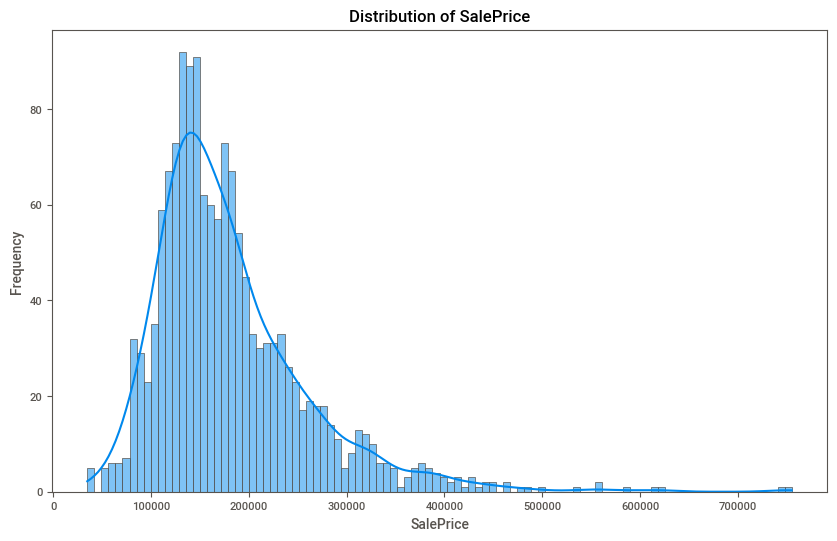

In [15]:
distribution_histplot('SalePrice')

### Correlation between the features and between the features and the target
We will present a heatmap of the features which have a correlation with the target of 0.5 and above

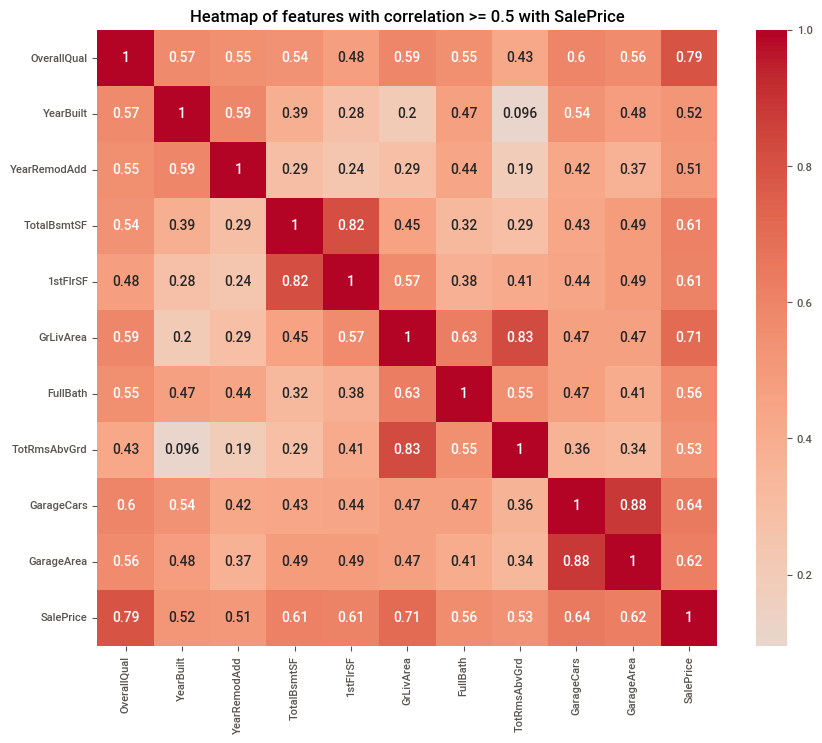

In [16]:
heatmap_high_correlations(train, 'SalePrice')

### **Additional Insights:**
* From the distribution plot of SalePrice we can see that SalePrice is right-skewed distributed, indicating the presence of high-value outliers.
We will consider applying a log transformation to SalePrice to normalize the distribution for better model performance.  

* From the heatmap, we can no learn the Inter-Feature Correlations: 
    - GarageCars and GarageArea (0.88): These two features are highly correlated with each other, indicating that garages that can hold more cars tend to be larger.  
    - GrLivArea and TotRmsAbvGrd (0.83): Houses with larger above-ground living areas tend to have more rooms.  
    - TotalBsmtSF and 1stFlrSF (0.82): The total basement square footage and the first-floor square footage are highly correlated, suggesting that larger houses tend to have both larger basements and first floors.  
    - OverallQual and YearBuilt (0.57): Higher quality houses tend to be newer.  

**Key Takeaways:**  
1. Overall Quality and Above-Ground Living Area are the most significant predictors of house prices in this dataset.  
2. Garage-related features also play a significant role in determining house prices.  
3. House Age (both YearBuilt and YearRemodAdd) have a notable impact on the sale price.  
4. Features related to the size of the house (like TotalBsmtSF, 1stFlrSF, GrLivArea) are crucial for predicting house prices.  

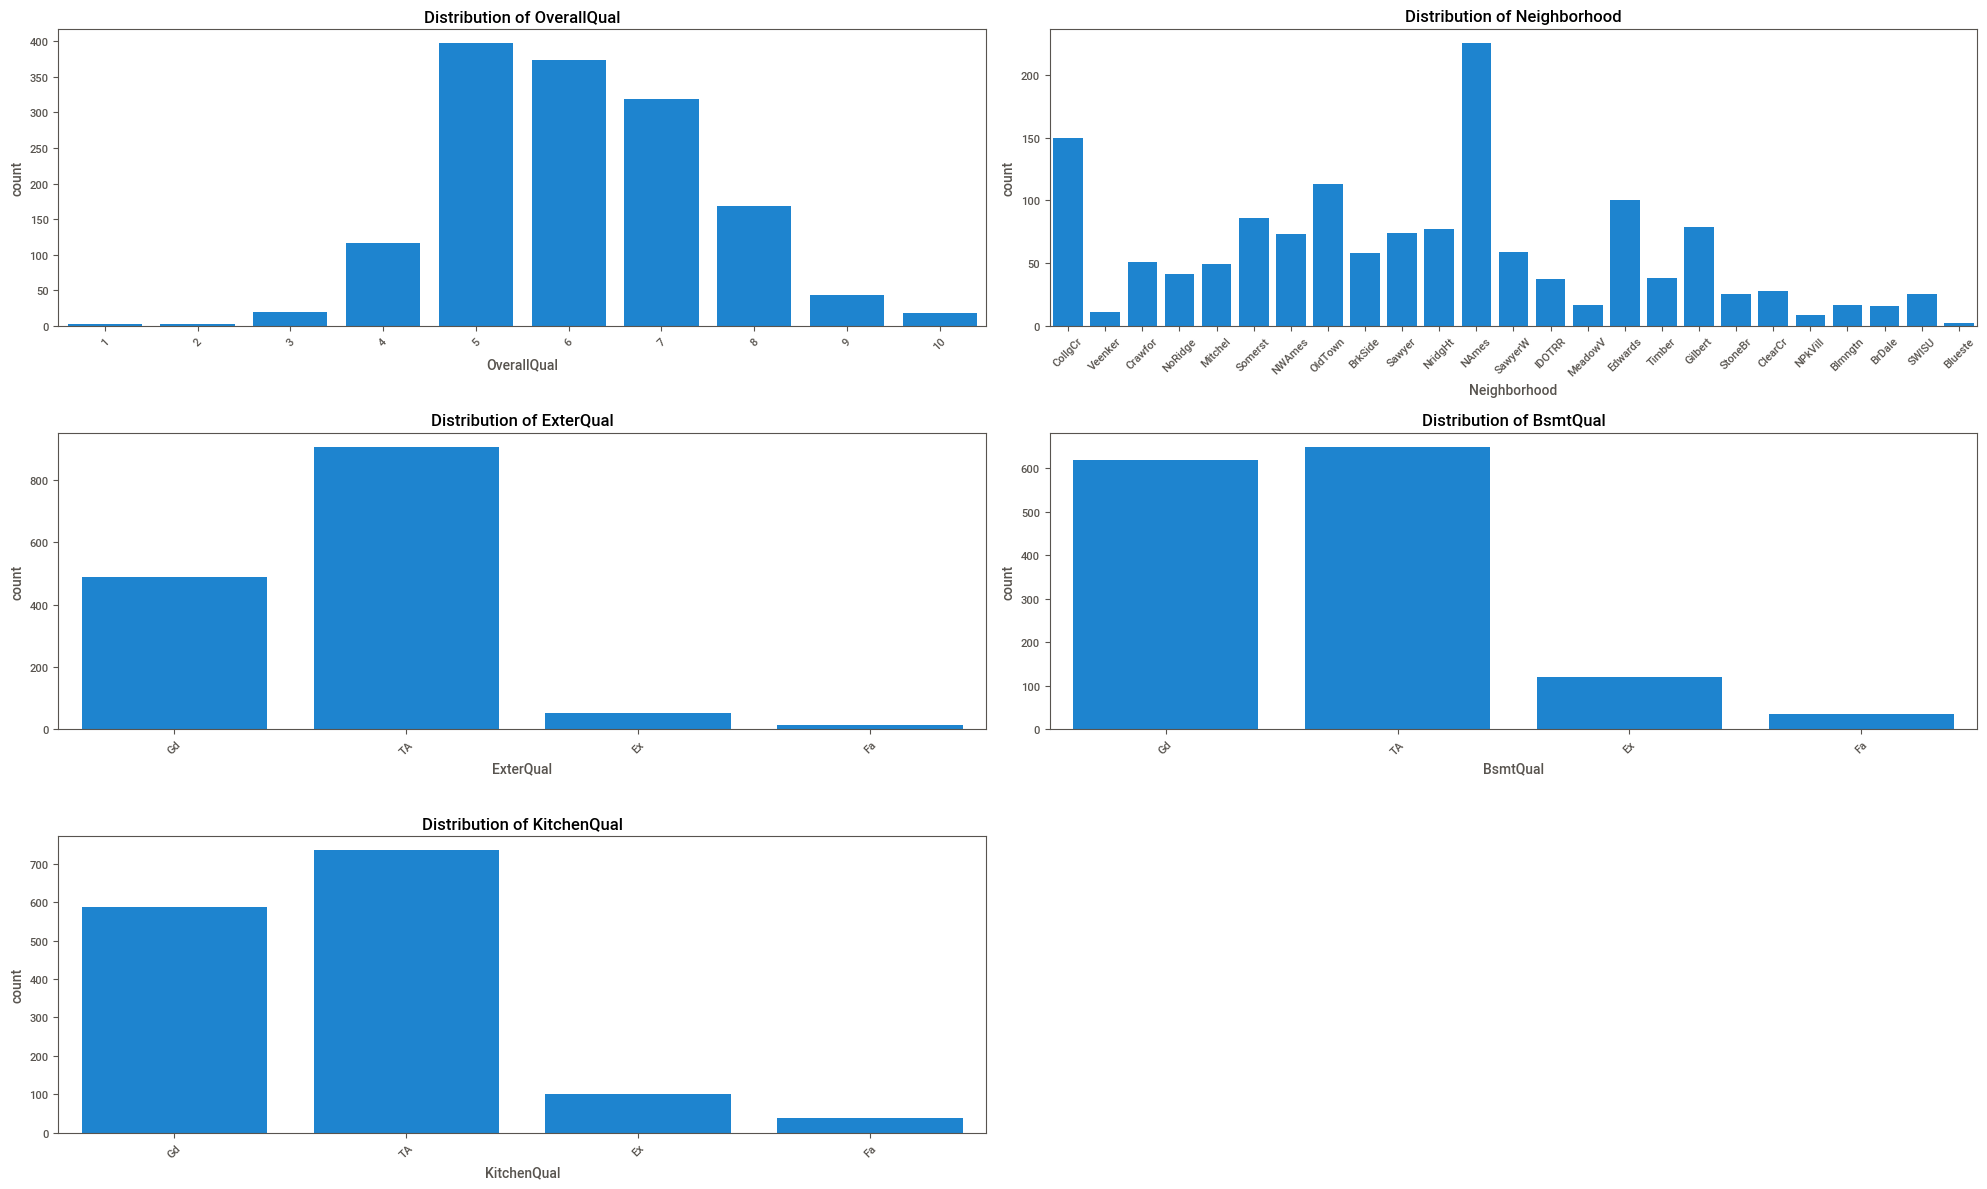

In [17]:
# Plotting the distribution of key categorical features
categorical_features = ['OverallQual', 'Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual']

plt.figure(figsize=(20, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=train, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plotting box plots for SalePrice vs. key categorical features

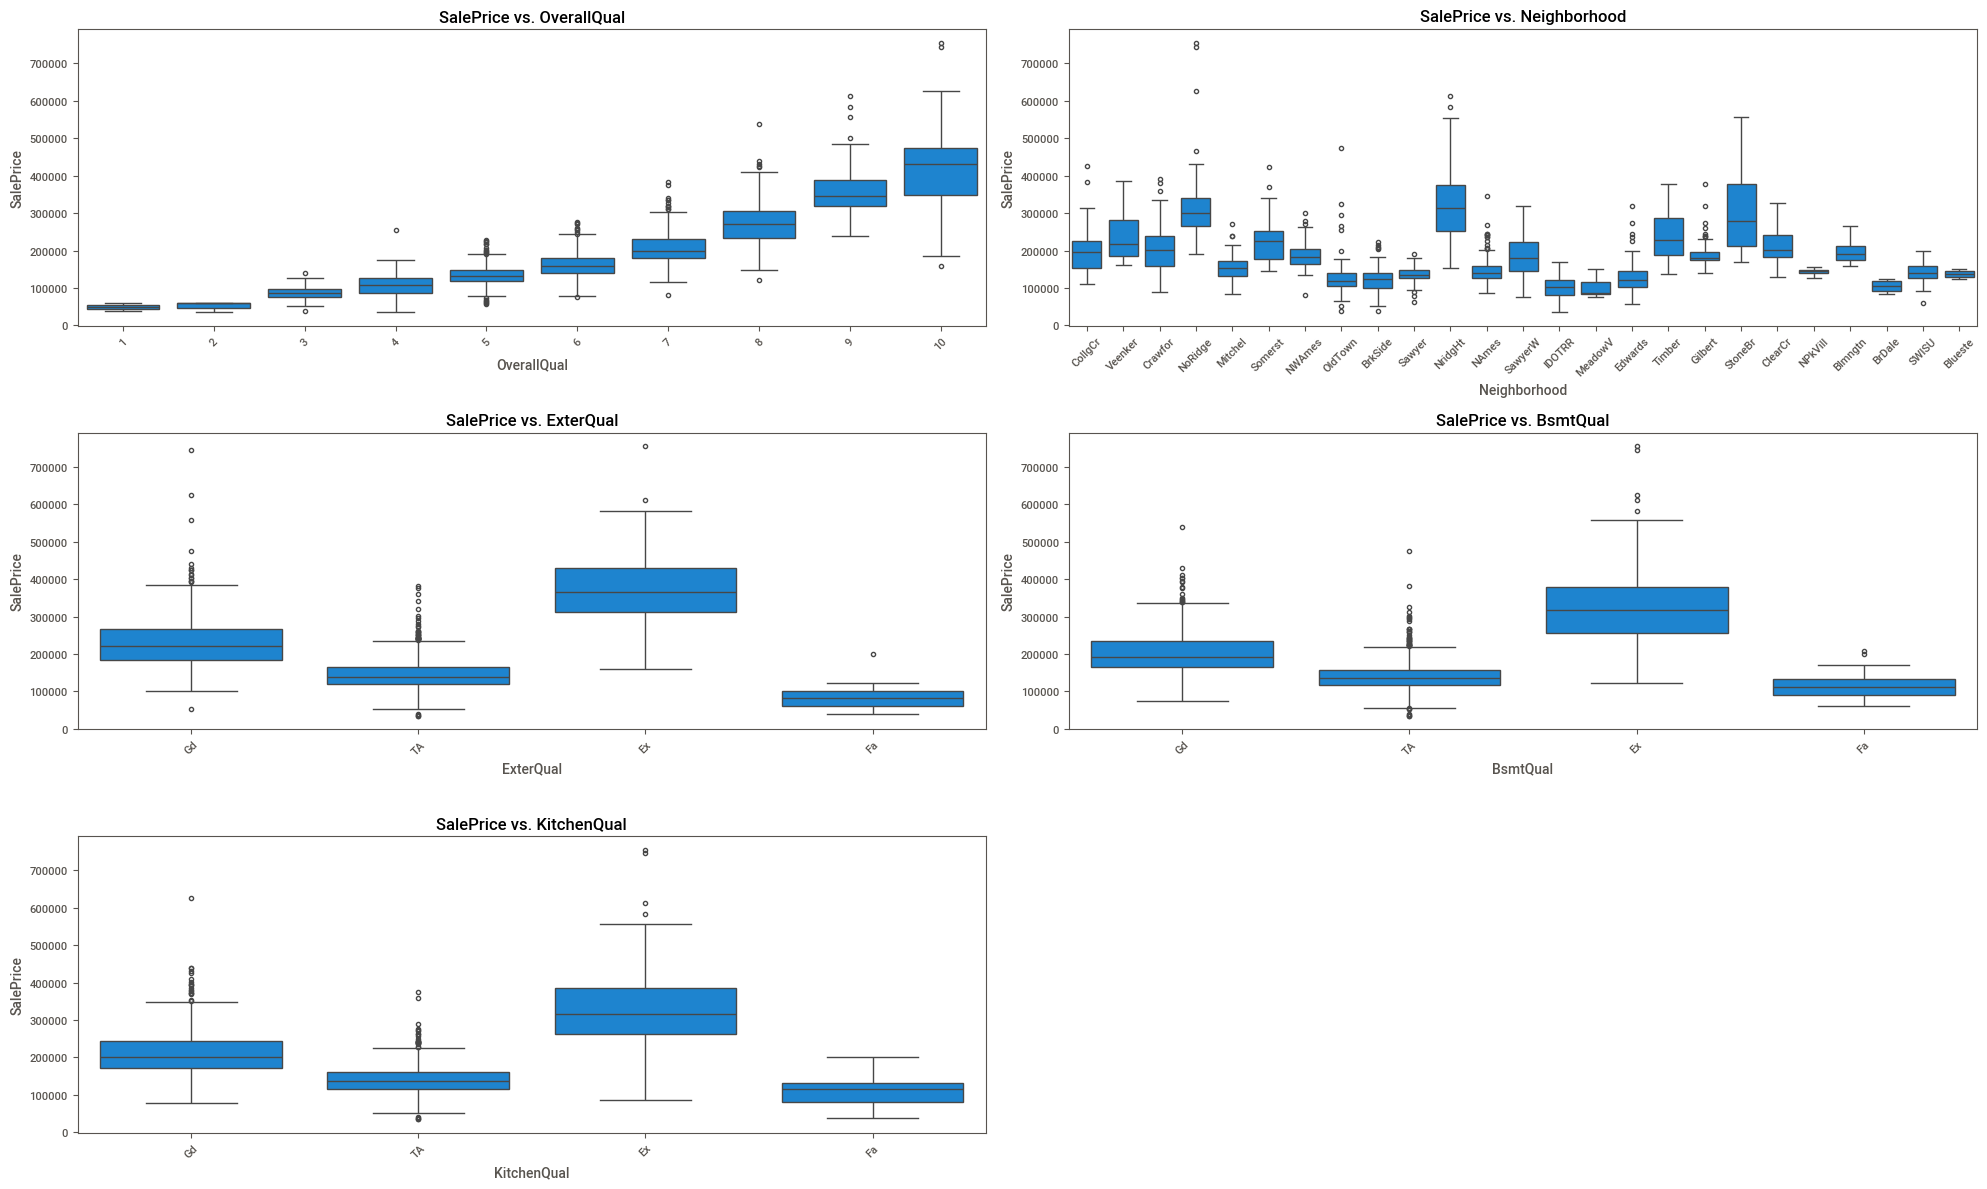

In [18]:
plt.figure(figsize=(20, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=train, x=feature, y='SalePrice')
    plt.title(f'SalePrice vs. {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Handling missing values**
Steps: 
1. Identify Missing Values
2. Drop rows for missing value if the feature has less than 5 missing values
2. Categorize Missing Values: 
    - For categorical features- missing values will be filled with a new category 'None'
    - For numerical features- missing values will be filled with the median
3. Impute Missing Values

### Analyzing missing values

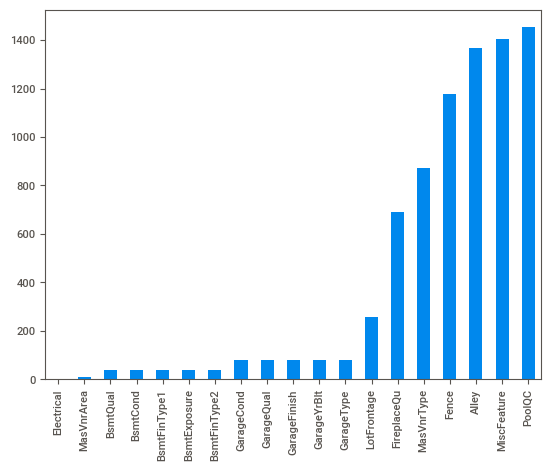

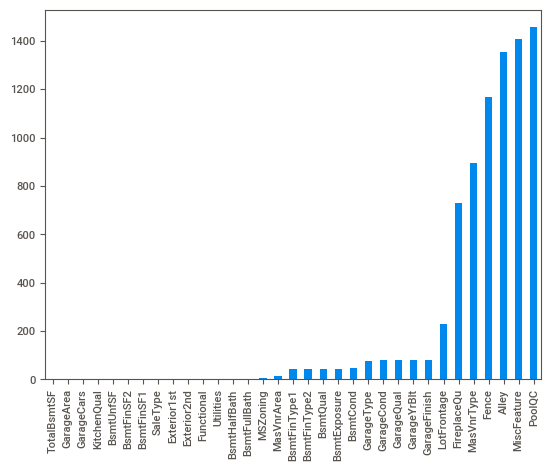

In [19]:
def identify_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values.sort_values(inplace=True)
    return missing_values

missing_values_train = identify_missing_values(train)
missing_values_train.plot.bar()
plt.show()

missing_values_test = identify_missing_values(test)
missing_values_test.plot.bar()
plt.show()

In [20]:
print('Missing values for Train: ')
print(missing_values_train)
print('\nMissing values for Test: ')
print(missing_values_test)

Missing values for Train: 
Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

Missing values for Test: 
TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
BsmtFinType1      42
BsmtFinType2      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFin

We will handle the `LotFrontage` and `GarageYrBlt` features missing values in a different more sophisticated way than the other missing values.

- Handling `LotFrontage` missing values: Since 'LotFrontage' is related to LotArea we will perfom the imputing based on the median LotFrontage of the same neighborhood.  
- Handling `GarageYrBlt` missing values: If GarageYrBlt is missing, and the house has a garage (GarageType != 'None'), we will fill it with the house's YearBuilt or YearRemodAdd.

In [21]:
# Impute LotFrontage based on the median value of each Neighborhood group
def impute_missing_LotFrontage(df):
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median())).infer_objects()

# Impute GarageYrBlt with YearBuilt where GarageYrBlt is missing
def impute_missing_GarageYrBlt(df):
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt']).infer_objects()

impute_missing_LotFrontage(train)
impute_missing_LotFrontage(test)

impute_missing_GarageYrBlt(train)
impute_missing_GarageYrBlt(test)

In [22]:
categorical_features_missing = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'MasVnrType', 'MSZoning'
]

numerical_features_missing = [
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea'
]

We will handle the rest of the missing values as follows: 
* missing values in numerical features - will be filled with mean
* missing values in categorical features that the NA is a valid category- will be filled with the word 'Nothing'
* missing values in categorical features that have an actual missing values will be filled with the most frequent value

In [23]:
def impute_missing_categorical_features(df, categorical_features):
    df_copy = df.copy()
    for col in categorical_features:
        df_copy[col] = df_copy[col].fillna('Nothing')
    return df_copy

def impute_missing_categorical_features_frequent_val(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for col in categorical_columns:
        df[col] = df[col].apply(lambda x: x if pd.notnull(x) else df[col].mode()[0])
    return df

def impute_missing_numerical_features(df, numerical_features):
    df_copy = df.copy()
    for col in numerical_features:
        df_copy[col] = df_copy[col].fillna(df[col].median()).infer_objects()
    return df_copy

In [24]:
train = impute_missing_numerical_features(train, numerical_features_missing)
test = impute_missing_numerical_features(test, numerical_features_missing)

train = impute_missing_categorical_features(train, categorical_features_missing)
test = impute_missing_categorical_features(test, categorical_features_missing)

train = impute_missing_categorical_features(train, categorical_features_missing)
test = impute_missing_categorical_features(test, categorical_features_missing)

train = impute_missing_categorical_features_frequent_val(train)
test = impute_missing_categorical_features_frequent_val(test)

In [25]:
identify_missing_values(train)
identify_missing_values(test)

Series([], dtype: int64)

### **Removing features that have a dominating value**

In [26]:
def remove_feature_with_dominating_value(df, threshold = 0.945):
    low_variance_features = [col for col in df.columns if df[col].value_counts(normalize=True).max() > threshold]
    print(f"\nLow variance features (more than {threshold*100}% of a single value):")
    print(low_variance_features)

    df_reduced = df.drop(columns=low_variance_features)
    return df_reduced

In [27]:
print(f"\nOriginal shape: {train.shape}")
train = remove_feature_with_dominating_value(train)
print(f"\nReduced shape: {train.shape}")
print('\n----')
print(f"\nOriginal shape: {test.shape}")
test = remove_feature_with_dominating_value(test)
print(f"\nReduced shape: {test.shape}")



Original shape: (1460, 81)

Low variance features (more than 94.5% of a single value):
['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal']

Reduced shape: (1460, 68)

----

Original shape: (1459, 80)

Low variance features (more than 94.5% of a single value):
['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal']

Reduced shape: (1459, 67)


Making sure our train and test datasets have the same features

In [28]:
def align_features(train, test):
    train_features = set(train.columns)
    test_features = set(test.columns)

    missing_in_test = train_features - test_features
    missing_in_train = test_features - train_features

    return missing_in_test, missing_in_train

missing_in_test, missing_in_train = align_features(train, test)

print(missing_in_test)
print(missing_in_train)


{'SalePrice'}
set()


As we can see this is a valid result because the test dataset did not contain the target column and this is the reason it is missing

### **Creating new Features**

From the insights we have mentioned earlier we will now create new features 

In [29]:
# Create a combined area feature
train['TotalArea'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'] 
test['TotalArea'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

# Create an age feature
train['Age'] = train['YrSold'] - train['YearBuilt']
test['Age'] = test['YrSold'] - test['YearBuilt']

# Create a combined quality-size feature
train['Qual_LivArea'] = train['OverallQual'] * train['GrLivArea']
test['Qual_LivArea'] = test['OverallQual'] * test['GrLivArea']

In [30]:
display(train)
display(test)

Id  MSSubClass MSZoning  LotFrontage  LotArea    Alley LotShape  \
0        1          60       RL         65.0     8450  Nothing      Reg   
1        2          20       RL         80.0     9600  Nothing      Reg   
2        3          60       RL         68.0    11250  Nothing      IR1   
3        4          70       RL         60.0     9550  Nothing      IR1   
4        5          60       RL         84.0    14260  Nothing      IR1   
...    ...         ...      ...          ...      ...      ...      ...   
1455  1456          60       RL         62.0     7917  Nothing      Reg   
1456  1457          20       RL         85.0    13175  Nothing      Reg   
1457  1458          70       RL         66.0     9042  Nothing      Reg   
1458  1459          20       RL         68.0     9717  Nothing      Reg   
1459  1460          20       RL         75.0     9937  Nothing      Reg   

     LandContour LotConfig Neighborhood  ... ScreenPorch    Fence MoSold  \
0            Lvl    Inside      CollgCr  ...           0  Nothing      2   
1            Lvl       FR2      Veenker  ...           0  Nothing      5   
2            Lvl    Inside      CollgCr  ...           0  Nothing      9   
3            Lvl    Corner      Crawfor  ...           0  Nothing      2   
4            Lvl       FR2      NoRidge  ...           0  Nothing     12   
...          ...       ...          ...  ...         ...      ...    ...   
1455         Lvl    Inside      Gilbert  ...           0  Nothing      8   
1456         Lvl    Inside       NWAmes  ...           0    MnPrv      2   
1457         Lvl    Inside      Crawfor  ...           0    GdPrv      5   
1458         Lvl    Inside        NAmes  ...           0  Nothing      4   
1459         Lvl    Inside      Edwards  ...           0  Nothing      6   

      YrSold  SaleType  SaleCondition  SalePrice TotalArea Age Qual_LivArea  
0       2008        WD         Normal     208500      2566   5        11970  
1       2007        WD         Normal     181500      2524  31         7572  
2       2008        WD         Normal     223500      2706   7        12502  
3       2006        WD        Abnorml     140000      2473  91        12019  
4       2008        WD         Normal     250000      3343   8        17584  
...      ...       ...            ...        ...       ...  ..          ...  
1455    2007        WD         Normal     175000      2600   8         9882  
1456    2010        WD         Normal     210000      3615  32        12438  
1457    2010        WD         Normal     266500      3492  69        16380  
1458    2010        WD         Normal     142125      2156  60         5390  
1459    2008        WD         Normal     147500      2512  43         6280  

[1460 rows x 71 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea    Alley LotShape  \
0     1461          20       RH         80.0    11622  Nothing      Reg   
1     1462          20       RL         81.0    14267  Nothing      IR1   
2     1463          60       RL         74.0    13830  Nothing      IR1   
3     1464          60       RL         78.0     9978  Nothing      IR1   
4     1465         120       RL         43.0     5005  Nothing      IR1   
...    ...         ...      ...          ...      ...      ...      ...   
1454  2915         160       RM         21.0     1936  Nothing      Reg   
1455  2916         160       RM         21.0     1894  Nothing      Reg   
1456  2917          20       RL        160.0    20000  Nothing      Reg   
1457  2918          85       RL         62.0    10441  Nothing      Reg   
1458  2919          60       RL         74.0     9627  Nothing      Reg   

     LandContour LotConfig Neighborhood  ... EnclosedPorch ScreenPorch  \
0            Lvl    Inside        NAmes  ...             0         120   
1            Lvl    Corner        NAmes  ...             0           0   
2            Lvl    Inside      Gilbert  ...             0           0   
3            Lvl    Inside      Gilbert  ...             0           0   
4            HLS    Inside      StoneBr  ...             0         144   
...          ...       ...          ...  ...           ...         ...   
1454         Lvl    Inside      MeadowV  ...             0           0   
1455         Lvl    Inside      MeadowV  ...             0           0   
1456         Lvl    Inside      Mitchel  ...             0           0   
1457         Lvl    Inside      Mitchel  ...             0           0   
1458         Lvl    Inside      Mitchel  ...             0           0   

        Fence  MoSold  YrSold  SaleType  SaleCondition TotalArea Age  \
0       MnPrv       6    2010        WD         Normal    1778.0  49   
1     Nothing       6    2010        WD         Normal    2658.0  52   
2       MnPrv       3    2010        WD         Normal    2557.0  13   
3     Nothing       6    2010        WD         Normal    2530.0  12   
4     Nothing       1    2010        WD         Normal    2560.0  18   
...       ...     ...     ...       ...            ...       ...  ..   
1454  Nothing       6    2006        WD         Normal    1638.0  36   
1455  Nothing       4    2006        WD        Abnorml    1638.0  36   
1456  Nothing       9    2006        WD        Abnorml    2448.0  46   
1457    MnPrv       7    2006        WD         Normal    1882.0  14   
1458  Nothing      11    2006        WD         Normal    2996.0  13   

     Qual_LivArea  
0            4480  
1            7974  
2            8145  
3            9624  
4           10240  
...           ...  
1454         4368  
1455         4368  
1456         6120  
1457         4850  
1458        14000  

[1459 rows x 70 columns]

## **cross validation**

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import LeavePOut
from tqdm.auto import tqdm

*function to find generator length*

In [32]:
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length',
                    ncols=1000,
                    bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

*function to calculate score and loss from cv (KFold or LPO) and display graphs*

In [33]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None,
                          k=None, p=None,
                          show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models',
                    total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'train', model.score(X_train, t_train),
          mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss,\
     mean_train_score, mean_train_loss

*function to evaluate chosen model*

In [34]:
def evaluate_model(X, t, model):
    val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model, k=5, show_score_loss_graphs=True)
    print(f'mean cv val score train: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
    print(f'mean cv val score validation: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

*feature selection - forward*

In [35]:
def forward_selection(X, y, model, k_features=10):
    sfs = SequentialFeatureSelector(model, n_features_to_select=k_features, direction='forward')
    sfs.fit(X, y)
    return X.iloc[:, sfs.get_support()]

*feature selection - backward*

In [36]:
def backward_selection(X, y, model, k_features=10):
    sfs = SequentialFeatureSelector(model, n_features_to_select=k_features, direction='backward')
    sfs.fit(X, y)
    return X.iloc[:, sfs.get_support()]

*feature selection - hybrid*

In [37]:
def hybrid_selection(X, y, model, k_features=10):
    X_forward = forward_selection(X, y, model, k_features)
    return backward_selection(X_forward, y, model, k_features)

### divide the data to features and target

In [38]:
t = train['SalePrice']
X = train.drop(columns=['SalePrice'], axis=1)

### Categorical and numerical features 

In [39]:
# determine categorical and numerical features
def determine_type(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    all_cols = np.array(df.columns)

    return numerical_cols, categorical_cols, all_cols

In [40]:
numerical_cols, categorical_cols, all_cols = determine_type(X)

print('Numerical Cols:', numerical_cols, 'size:', len(numerical_cols))
print('Categorical Cols:', categorical_cols, 'size:', len(categorical_cols))

Numerical Cols: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'TotalArea', 'Age',
       'Qual_LivArea'],
      dtype='object') size: 35
Categorical Cols: Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'Firep

### **Encoding the data**
We have chosen to encode the categorical data using the ordinal encoder

In [41]:
# use column transformer to insert different transformers for each column
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ("encoding", OrdinalEncoder(), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct.fit_transform(X, t), columns=all_cols)
test_encoded = pd.DataFrame(ct.fit_transform(test), columns=all_cols)

print("X encoded")
display(X_encoded)
print("test encoded")
display(test_encoded)

X encoded


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Alley  LotShape  \
0     3.0         1.0       3.0          3.0      4.0    5.0       2.0   
1     3.0         1.0       3.0          3.0      2.0   24.0       1.0   
2     3.0         1.0       0.0          3.0      4.0    5.0       2.0   
3     3.0         1.0       0.0          3.0      0.0    6.0       2.0   
4     3.0         1.0       0.0          3.0      2.0   15.0       2.0   
...   ...         ...       ...          ...      ...    ...       ...   
1455  3.0         1.0       3.0          3.0      4.0    8.0       2.0   
1456  3.0         1.0       3.0          3.0      4.0   14.0       2.0   
1457  3.0         1.0       3.0          3.0      4.0    6.0       2.0   
1458  3.0         1.0       3.0          3.0      4.0   12.0       2.0   
1459  3.0         1.0       3.0          3.0      4.0    7.0       2.0   

      LandContour  LotConfig  Neighborhood  ...  EnclosedPorch  ScreenPorch  \
0             0.0        5.0           1.0  ...       0.351000    -0.752176   
1             0.0        2.0           1.0  ...      -0.060731     1.626195   
2             0.0        5.0           1.0  ...       0.631726    -0.752176   
3             0.0        5.0           1.0  ...       0.790804    -0.752176   
4             0.0        5.0           1.0  ...       1.698485     0.780197   
...           ...        ...           ...  ...            ...          ...   
1455          0.0        5.0           1.0  ...      -0.060731    -0.752176   
1456          0.0        2.0           1.0  ...       0.126420     2.033231   
1457          0.0        5.0           1.0  ...      -1.033914    -0.752176   
1458          0.0        2.0           3.0  ...      -1.090059     2.168910   
1459          0.0        2.0           1.0  ...      -0.921624     5.121921   

         Fence    MoSold    YrSold  SaleType  SaleCondition  TotalArea  \
0     0.216503 -0.359325 -0.270208 -1.599111       0.138777  -0.001277   
1    -0.704483 -0.359325 -0.270208 -0.489110      -0.614439  -0.052407   
2    -0.070361 -0.359325 -0.270208  0.990891       0.138777   0.169157   
3    -0.176048  4.092524 -0.270208 -1.599111      -1.367655  -0.114493   
4     0.563760 -0.359325 -0.270208  2.100892       0.138777   0.944631   
...        ...       ...       ...       ...            ...        ...   
1455 -0.100558 -0.359325 -0.270208  0.620891      -0.614439   0.040114   
1456 -0.704483 -0.359325 -0.270208 -1.599111       1.645210   1.275760   
1457  0.201405 -0.359325 -0.270208 -0.489110       1.645210   1.126022   
1458 -0.704483  1.473789 -0.270208 -0.859110       1.645210  -0.500404   
1459  0.322190 -0.359325 -0.270208 -0.119110       0.138777  -0.067015   

           Age  Qual_LivArea  
0    -1.043259      0.442827  
1    -0.183465     -0.405394  
2    -0.977121      0.545431  
3     1.800676      0.452277  
4    -0.944052      1.525572  
...        ...           ...  
1455 -0.944052      0.040124  
1456 -0.150396      0.533088  
1457  1.073157      1.293363  
1458  0.775536     -0.826226  
1459  0.213363     -0.654576  

[1460 rows x 70 columns]

test encoded


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Alley  LotShape  \
0     3.0         1.0       3.0          3.0      4.0   12.0       1.0   
1     4.0         1.0       0.0          3.0      0.0   12.0       2.0   
2     4.0         1.0       0.0          3.0      4.0    8.0       2.0   
3     4.0         1.0       0.0          3.0      4.0    8.0       2.0   
4     4.0         1.0       0.0          1.0      4.0   22.0       2.0   
...   ...         ...       ...          ...      ...    ...       ...   
1454  5.0         1.0       3.0          3.0      4.0   10.0       2.0   
1455  5.0         1.0       3.0          3.0      4.0   10.0       2.0   
1456  4.0         1.0       3.0          3.0      4.0   11.0       2.0   
1457  4.0         1.0       3.0          3.0      4.0   11.0       2.0   
1458  4.0         1.0       3.0          3.0      4.0   11.0       2.0   

      LandContour  LotConfig  Neighborhood  ...  EnclosedPorch  ScreenPorch  \
0             0.0        2.0           1.0  ...       1.185921     0.366678   
1             0.0        2.0           3.0  ...      -0.741235     2.347867   
2             0.0        4.0           1.0  ...       0.042537     0.930495   
3             0.0        4.0           1.0  ...      -0.012788     2.089451   
4             4.0        2.0           1.0  ...       0.153187    -0.729632   
...           ...        ...           ...  ...            ...          ...   
1454          3.0        4.0           1.0  ...      -2.179687    -0.729632   
1455          4.0        4.0           1.0  ...      -0.861106    -0.729632   
1456          0.0        2.0           1.0  ...       0.475916     2.982161   
1457          0.0        5.0           1.0  ...      -2.179687    -0.103169   
1458          0.0        4.0           1.0  ...       0.817088     0.758218   

         Fence    MoSold    YrSold  SaleType  SaleCondition  TotalArea  \
0    -0.701628 -0.360738  1.818960 -0.038281       1.713905  -0.954072   
1    -0.178826 -0.360738 -0.301543 -0.038281       1.713905   0.164507   
2    -0.207871 -0.360738 -0.301543 -1.140614       1.713905   0.036124   
3    -0.178826 -0.360738 -0.301543 -0.038281       1.713905   0.001804   
4     0.489198 -0.360738  2.243060 -1.875504       1.713905   0.039938   
...        ...       ...       ...       ...            ...        ...   
1454 -0.701628 -0.360738 -0.301543 -0.038281      -1.359958  -1.132028   
1455 -0.353093 -0.360738 -0.301543 -0.773170      -1.359958  -1.132028   
1456 -0.701628 -0.360738 -0.301543  1.064053      -1.359958  -0.102427   
1457 -0.236915 -0.360738 -0.301543  0.329164      -1.359958  -0.821877   
1458 -0.004559 -0.360738 -0.301543  1.798942      -1.359958   0.594143   

           Age  Qual_LivArea  
0     0.413784     -1.026511  
1     0.512398     -0.300892  
2    -0.769577     -0.265380  
3    -0.802448      0.041773  
4    -0.605221      0.169701  
...        ...           ...  
1454 -0.013540     -1.049771  
1455 -0.013540     -1.049771  
1456  0.315171     -0.685923  
1457 -0.736706     -0.949671  
1458 -0.769577      0.950561  

[1459 rows x 70 columns]

In [42]:
def remove_low_correlation_features(X, y, threshold=0.1):
    correlations = X.corrwith(y).abs()
    features_to_keep = correlations[correlations > threshold].index
    return features_to_keep, X[features_to_keep]

features_to_keep, X_encoded = remove_low_correlation_features(X_encoded, t, threshold=0.2)
print(len(features_to_keep))

test_encoded = test_encoded[features_to_keep]

42


### **feature selection**


We chose to use K-fold and now we are going to find the best features for the task

In [43]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

sgd_reg = SGDRegressor(max_iter=5000, tol=1e-3, random_state=42)
sgd_selector = RFECV(
    sgd_reg,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
    ).fit(X_encoded, t)

lr_reg=LinearRegression()
lr_selector = RFECV(
    lr_reg,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
    ).fit(X_encoded, t)

In [44]:
X_selected_features_sgd = X_encoded.loc[:, sgd_selector.support_]
print('SGDRegressor selected features')
display(X_selected_features_sgd)

X_selected_features_lr = X_encoded.loc[:, lr_selector.support_]
print('LinearRegression selected features')
display(X_selected_features_lr)

SGDRegressor selected features


Neighborhood  YearBuilt  ExterQual  Foundation  BsmtFinType2  \
0              1.0        2.0        1.0         2.0           5.0   
1              1.0        1.0        1.0         3.0           5.0   
2              1.0        2.0        1.0         2.0           5.0   
3              1.0        0.0        1.0         2.0           5.0   
4              1.0        2.0        1.0         2.0           5.0   
...            ...        ...        ...         ...           ...   
1455           1.0        2.0        1.0         3.0           5.0   
1456           1.0        1.0        1.0         3.0           5.0   
1457           1.0        4.0        1.0         2.0           5.0   
1458           3.0        1.0        1.0         2.0           5.0   
1459           1.0        1.0        1.0         3.0           5.0   

      BsmtFinSF2  HeatingQC  2ndFlrSF  GrLivArea  FullBath  Functional  \
0            2.0        4.0 -0.207142   0.651479  0.878668   -0.459303   
1            2.0        4.0 -0.091886  -0.071836 -0.429577    0.466465   
2            2.0        4.0  0.073480   0.651479  0.830215   -0.313369   
3            2.0        0.0 -0.096897   0.651479 -0.720298   -0.687324   
4            2.0        4.0  0.375148   1.374795  0.733308    0.199680   
...          ...        ...       ...        ...       ...         ...   
1455         2.0        4.0 -0.260560  -0.071836  0.733308   -0.238122   
1456         2.0        4.0  0.266407  -0.071836  0.151865    1.104925   
1457         2.0        4.0 -0.147810   0.651479  1.024029    0.215641   
1458         2.0        4.0 -0.080160  -0.795151  0.539493    0.046905   
1459         2.0        4.0 -0.058112  -0.795151 -0.962566    0.452784   

      GarageYrBlt  WoodDeckSF  OpenPorchSF  Qual_LivArea  
0        1.107810    1.007405     0.311725      0.442827  
1       -0.819964   -0.019300     0.311725     -0.405394  
2        1.107810    0.931353     0.311725      0.545431  
3        1.107810    0.817275     1.650307      0.452277  
4        1.107810    0.893327     1.650307      1.525572  
...           ...         ...          ...           ...  
1455    -0.819964    0.855301     0.311725      0.040124  
1456     1.107810    0.056753     0.311725      0.533088  
1457    -0.819964   -1.350213    -1.026858      1.293363  
1458     1.107810   -1.007978    -1.026858     -0.826226  
1459     1.107810   -0.437587    -1.026858     -0.654576  

[1460 rows x 15 columns]

LinearRegression selected features


MSZoning  Alley  Neighborhood  OverallQual  YearBuilt  YearRemodAdd  \
0          3.0    5.0           1.0          2.0        2.0           2.0   
1          3.0   24.0           1.0          3.0        1.0           2.0   
2          0.0    5.0           1.0          2.0        2.0           2.0   
3          0.0    6.0           1.0          3.0        0.0           4.0   
4          0.0   15.0           1.0          2.0        2.0           2.0   
...        ...    ...           ...          ...        ...           ...   
1455       3.0    8.0           1.0          3.0        2.0           2.0   
1456       3.0   14.0           1.0          3.0        1.0           2.0   
1457       3.0    6.0           1.0          0.0        4.0           4.0   
1458       3.0   12.0           3.0          3.0        1.0           4.0   
1459       3.0    7.0           1.0          2.0        1.0           4.0   

      Exterior1st  MasVnrArea  ExterQual  ExterCond  ...  GarageCond  \
0             3.0         0.0        1.0        4.0  ...    0.912210   
1             1.0         0.0        1.0        4.0  ...   -0.318683   
2             2.0         0.0        1.0        4.0  ...   -0.318683   
3             3.0         2.0        1.0        4.0  ...    0.296763   
4             0.0         0.0        1.0        4.0  ...    1.527656   
...           ...         ...        ...        ...  ...         ...   
1455          3.0         0.0        1.0        4.0  ...    0.296763   
1456          3.0         4.0        1.0        4.0  ...    0.296763   
1457          3.0         0.0        1.0        4.0  ...    1.527656   
1458          2.0         2.0        1.0        0.0  ...   -0.934130   
1459          3.0         2.0        1.0        4.0  ...   -0.318683   

      PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
0      -0.951226    1.007405     0.311725       0.351000    -0.752176   
1       0.600495   -0.019300     0.311725      -0.060731     1.626195   
2       0.600495    0.931353     0.311725       0.631726    -0.752176   
3       0.600495    0.817275     1.650307       0.790804    -0.752176   
4       0.600495    0.893327     1.650307       1.698485     0.780197   
...          ...         ...          ...            ...          ...   
1455    0.600495    0.855301     0.311725      -0.060731    -0.752176   
1456    2.152216    0.056753     0.311725       0.126420     2.033231   
1457    2.152216   -1.350213    -1.026858      -1.033914    -0.752176   
1458   -0.951226   -1.007978    -1.026858      -1.090059     2.168910   
1459   -0.951226   -0.437587    -1.026858      -0.921624     5.121921   

         Fence  TotalArea       Age  Qual_LivArea  
0     0.216503  -0.001277 -1.043259      0.442827  
1    -0.704483  -0.052407 -0.183465     -0.405394  
2    -0.070361   0.169157 -0.977121      0.545431  
3    -0.176048  -0.114493  1.800676      0.452277  
4     0.563760   0.944631 -0.944052      1.525572  
...        ...        ...       ...           ...  
1455 -0.100558   0.040114 -0.944052      0.040124  
1456 -0.704483   1.275760 -0.150396      0.533088  
1457  0.201405   1.126022  1.073157      1.293363  
1458 -0.704483  -0.500404  0.775536     -0.826226  
1459  0.322190  -0.067015  0.213363     -0.654576  

[1460 rows x 41 columns]

In [45]:
def cv_score_selected_features(selector):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.feature_names_in_) + 1)]
                            , y=selector.cv_results_['mean_test_score']))
    fig.update_xaxes(title_text="Number of features selected")
    fig.update_yaxes(title_text="Cross validation R2 score")
    fig.show()

print('SGDRegressor')
cv_score_selected_features(sgd_selector)
print('LinearRegression')
cv_score_selected_features(lr_selector)

SGDRegressor


LinearRegression


In [46]:
#show score and loss of RFECV
print('SGDRegressor')
evaluate_model(X_selected_features_sgd, t, sgd_selector)

print('LinearRegression')
evaluate_model(X_selected_features_lr, t, lr_selector)

SGDRegressor


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

mean cv val score train: 0.77
mean cv val loss 1474445172.89
mean cv val score validation: 0.79
mean cv val loss 1308239323.12
LinearRegression


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

mean cv val score train: 0.78
mean cv val loss 1366069130.18
mean cv val score validation: 0.84
mean cv val loss 1040520493.90


From the results we can see that `LinearRegression` appears to be the better model when using K-fold. The lower validation loss and higher validation score. We will try some more approaches and then decide what to use

### **Features selection algorithms (Forward, Backward, Hybrid) with SGDRegressor**

**Forward Selection**

In [47]:
pipeline = make_pipeline(StandardScaler(), sgd_reg)
selected_features_forward = forward_selection(X_encoded, t, pipeline)
print("Forward Selection: ", selected_features_forward)

Forward Selection:        OverallQual  Exterior1st  ExterQual  Foundation  2ndFlrSF  BsmtHalfBath  \
0             2.0          3.0        1.0         2.0 -0.207142      1.050994   
1             3.0          1.0        1.0         3.0 -0.091886      0.156734   
2             2.0          2.0        1.0         2.0  0.073480      0.984752   
3             3.0          3.0        1.0         2.0 -0.096897     -1.863632   
4             2.0          0.0        1.0         2.0  0.375148      0.951632   
...           ...          ...        ...         ...       ...           ...   
1455          3.0          3.0        1.0         3.0 -0.260560      0.918511   
1456          3.0          3.0        1.0         3.0  0.266407      0.222975   
1457          0.0          3.0        1.0         2.0 -0.147810     -1.002492   
1458          3.0          2.0        1.0         2.0 -0.080160     -0.704406   
1459          2.0          3.0        1.0         3.0 -0.058112     -0.207594   

      G

**Backward Selection**

In [48]:
selected_features_backward = backward_selection(X_encoded, t, pipeline)
print("Backward Selection: ", selected_features_backward)

Backward Selection:        OverallQual  YearRemodAdd  Exterior1st  ExterQual  Foundation  2ndFlrSF  \
0             2.0           2.0          3.0        1.0         2.0 -0.207142   
1             3.0           2.0          1.0        1.0         3.0 -0.091886   
2             2.0           2.0          2.0        1.0         2.0  0.073480   
3             3.0           4.0          3.0        1.0         2.0 -0.096897   
4             2.0           2.0          0.0        1.0         2.0  0.375148   
...           ...           ...          ...        ...         ...       ...   
1455          3.0           2.0          3.0        1.0         3.0 -0.260560   
1456          3.0           2.0          3.0        1.0         3.0  0.266407   
1457          0.0           4.0          3.0        1.0         2.0 -0.147810   
1458          3.0           4.0          2.0        1.0         2.0 -0.080160   
1459          2.0           4.0          3.0        1.0         3.0 -0.058112   

      

**Hybrid Selection**

In [49]:
selected_features_hybrid = backward_selection(X_encoded, t, pipeline)
print("Backward Selection: ", selected_features_backward)

Backward Selection:        OverallQual  YearRemodAdd  Exterior1st  ExterQual  Foundation  2ndFlrSF  \
0             2.0           2.0          3.0        1.0         2.0 -0.207142   
1             3.0           2.0          1.0        1.0         3.0 -0.091886   
2             2.0           2.0          2.0        1.0         2.0  0.073480   
3             3.0           4.0          3.0        1.0         2.0 -0.096897   
4             2.0           2.0          0.0        1.0         2.0  0.375148   
...           ...           ...          ...        ...         ...       ...   
1455          3.0           2.0          3.0        1.0         3.0 -0.260560   
1456          3.0           2.0          3.0        1.0         3.0  0.266407   
1457          0.0           4.0          3.0        1.0         2.0 -0.147810   
1458          3.0           4.0          2.0        1.0         2.0 -0.080160   
1459          2.0           4.0          3.0        1.0         3.0 -0.058112   

      

In [50]:
print('Forward Selection')
evaluate_model(selected_features_forward, t, sgd_selector)
print('\nBackward Selection')
evaluate_model(selected_features_backward, t, sgd_selector)
print('\nHybrid Selection')
evaluate_model(selected_features_hybrid, t, sgd_selector)

Forward Selection


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

mean cv val score train: 0.80
mean cv val loss 1288503263.10
mean cv val score validation: 0.81
mean cv val loss 1215319135.19

Backward Selection


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

mean cv val score train: 0.79
mean cv val loss 1297225195.00
mean cv val score validation: 0.81
mean cv val loss 1222189999.62

Hybrid Selection


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

mean cv val score train: 0.79
mean cv val loss 1297225195.00
mean cv val score validation: 0.81
mean cv val loss 1222189999.62


From the results we can see that the `SGDRegressor` with the `forward feature selection` method gave us a higher validation score with a lower validation loss

### **Now lets try to do the features selection algorithms (Forward, Backward, Hybrid) with LinearRegression**

**Forward Selection**

In [51]:
selected_features_forward = forward_selection(X_encoded, t, lr_reg)
print("Forward Selection: ", selected_features_forward)

Forward Selection:        OverallQual  Exterior1st  ExterQual  Foundation  2ndFlrSF  BsmtHalfBath  \
0             2.0          3.0        1.0         2.0 -0.207142      1.050994   
1             3.0          1.0        1.0         3.0 -0.091886      0.156734   
2             2.0          2.0        1.0         2.0  0.073480      0.984752   
3             3.0          3.0        1.0         2.0 -0.096897     -1.863632   
4             2.0          0.0        1.0         2.0  0.375148      0.951632   
...           ...          ...        ...         ...       ...           ...   
1455          3.0          3.0        1.0         3.0 -0.260560      0.918511   
1456          3.0          3.0        1.0         3.0  0.266407      0.222975   
1457          0.0          3.0        1.0         2.0 -0.147810     -1.002492   
1458          3.0          2.0        1.0         2.0 -0.080160     -0.704406   
1459          2.0          3.0        1.0         3.0 -0.058112     -0.207594   

      G

**Backward Selection**

In [52]:
selected_features_backward = backward_selection(X_encoded, t, lr_reg)
print("Backward Selection: ", selected_features_backward)

Backward Selection:        OverallQual  YearRemodAdd  Exterior1st  ExterQual  Foundation  2ndFlrSF  \
0             2.0           2.0          3.0        1.0         2.0 -0.207142   
1             3.0           2.0          1.0        1.0         3.0 -0.091886   
2             2.0           2.0          2.0        1.0         2.0  0.073480   
3             3.0           4.0          3.0        1.0         2.0 -0.096897   
4             2.0           2.0          0.0        1.0         2.0  0.375148   
...           ...           ...          ...        ...         ...       ...   
1455          3.0           2.0          3.0        1.0         3.0 -0.260560   
1456          3.0           2.0          3.0        1.0         3.0  0.266407   
1457          0.0           4.0          3.0        1.0         2.0 -0.147810   
1458          3.0           4.0          2.0        1.0         2.0 -0.080160   
1459          2.0           4.0          3.0        1.0         3.0 -0.058112   

      

**Hybrid Selection**

In [53]:
selected_features_hybrid = backward_selection(X_encoded, t, lr_reg)
print("Backward Selection: ", selected_features_backward)

Backward Selection:        OverallQual  YearRemodAdd  Exterior1st  ExterQual  Foundation  2ndFlrSF  \
0             2.0           2.0          3.0        1.0         2.0 -0.207142   
1             3.0           2.0          1.0        1.0         3.0 -0.091886   
2             2.0           2.0          2.0        1.0         2.0  0.073480   
3             3.0           4.0          3.0        1.0         2.0 -0.096897   
4             2.0           2.0          0.0        1.0         2.0  0.375148   
...           ...           ...          ...        ...         ...       ...   
1455          3.0           2.0          3.0        1.0         3.0 -0.260560   
1456          3.0           2.0          3.0        1.0         3.0  0.266407   
1457          0.0           4.0          3.0        1.0         2.0 -0.147810   
1458          3.0           4.0          2.0        1.0         2.0 -0.080160   
1459          2.0           4.0          3.0        1.0         3.0 -0.058112   

      

In [54]:
print('Forward Selection')
evaluate_model(selected_features_forward, t, lr_selector)
print('\nBackward Selection')
evaluate_model(selected_features_backward, t, lr_selector)
print('\nHybrid Selection')
evaluate_model(selected_features_hybrid, t, lr_selector)

Forward Selection


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

mean cv val score train: 0.80
mean cv val loss 1266296341.65
mean cv val score validation: 0.81
mean cv val loss 1177018978.44

Backward Selection


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

mean cv val score train: 0.80
mean cv val loss 1286764283.29
mean cv val score validation: 0.81
mean cv val loss 1201464708.00

Hybrid Selection


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

mean cv val score train: 0.80
mean cv val loss 1286764283.29
mean cv val score validation: 0.81
mean cv val loss 1201464708.00


When using this algorithms with `LinearRegression` we can see that the results did not improve from the `LinearRegression` model without this feature selection algorithms and so we will not use them if we choose to use LinearRegression

### **Regularization**

We will use:
1. L1 (also called Lasso)
2. L2 (also called Ridge)
3. Elastic Net (a combination of Lasso and Ridge)

### Lasso, Ridge and Elastic Regularization on SGDRegressor

In [55]:
# print lasso, ridge and elasticnet scores as regression 
from sklearn.model_selection import cross_val_score

sgd_lasso_reg = SGDRegressor(penalty='l1',
                             random_state=1)
sgd_ridge_reg = SGDRegressor(penalty='l2',
                             random_state=1)
sgd_elastic_reg = SGDRegressor(penalty='elasticnet',
                               random_state=1)

print("R2 score for regression:")
print('sgd_lasso',
      cross_val_score(
          make_pipeline(
              StandardScaler(), 
              sgd_lasso_reg), 
              X_encoded, t, cv=15).mean())

print('sgd_ridge',
      cross_val_score(
          make_pipeline(
              StandardScaler(), 
              sgd_ridge_reg), 
              X_encoded, t, cv=15).mean())

print('sgd_elastic',
      cross_val_score(
          make_pipeline(
              StandardScaler(), 
              sgd_elastic_reg), 
              X_encoded, t, cv=15).mean())

R2 score for regression:
sgd_lasso 0.7500756621533229
sgd_ridge 0.7500879417315097
sgd_elastic 0.7500861005178892


Let's check the accuracy score of the regression models

In [56]:
# create accuracy score for ordinal predictions
from sklearn.metrics import make_scorer, accuracy_score

def get_accurate_ordinal_preds_from_numeric_preds(
    preds, min=None, max=None):
    if min is None:
        min = round(min(preds))
    if max is None:
        max = round(max(preds))
    preds = np.asarray(preds).ravel()
    return np.array(
        [round(p) if min <= p and p <= max else min if
         p < min else max for p in preds])

def accuracy_for_ordinal(y, y_pred):
    min_ord = min(y)
    max_ord = max(y)
    y_pred_ord = get_accurate_ordinal_preds_from_numeric_preds(y_pred, min=min_ord, max=max_ord)
    return accuracy_score(y, y_pred_ord)

print("Accuracy score for regression:")

print('sgd_lasso', 
      cross_val_score(make_pipeline(StandardScaler(), sgd_lasso_reg), 
                      X_encoded, t, cv=15, 
                      scoring=make_scorer(accuracy_for_ordinal)).mean())

print('sgd_ridge', 
      cross_val_score(make_pipeline(StandardScaler(), sgd_ridge_reg), 
                      X_encoded, t, cv=15, 
                      scoring=make_scorer(accuracy_for_ordinal)).mean())

print('sgd_elastic', 
      cross_val_score(make_pipeline(StandardScaler(), sgd_elastic_reg), 
                      X_encoded, t, cv=15, 
                      scoring=make_scorer(accuracy_for_ordinal)).mean())

Accuracy score for regression:
sgd_lasso 0.004803983449049723
sgd_ridge 0.004803983449049723
sgd_elastic 0.004803983449049723


From the results from the Accuract score and the R2 score we can see that the differences are very small between the 3 so we chose to use the `Lasso` regularization method because our data contains a lot of features and the Lasso method is known for removing unrelevant features from the dataset, unlike Ridge

In [57]:
evaluate_model(selected_features_forward, t, sgd_lasso_reg)

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

mean cv val score train: 0.80
mean cv val loss 1290985658.21
mean cv val score validation: 0.81
mean cv val loss 1201845793.87


There results we got show that Lasso didn't help us in improving the model so we will stick with the SGDRegression with the forwarding feature selection as it got better scores. 

### **Function to find the optimal Hyper-Parameters**
(Learning rate and Regularization)

In [58]:
from sklearn.model_selection import GridSearchCV

hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'),
                    'alpha':[0.0001, 0.001, 0.01, 0.1],
                   'eta0':[0.001, 0.01, 0.1, 0.5]}

gs_model = GridSearchCV(
    SGDRegressor(random_state=1, max_iter = 100000),
     hyper_parameters).fit(X_encoded, t)

print('Accuracy score for regression:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for regression:
gs_model 0.7478888590378363
best params {'alpha': 0.1, 'eta0': 0.001, 'penalty': 'l2'}


We can see that the best parameters on this model obtained with Grid Search were `alpha=0.1`, `eta0=0.001` and `penalty=l2`

In [59]:
learning_rate = gs_model.best_params_['alpha']
regularization = gs_model.best_params_['penalty']
eta0 = gs_model.best_params_['eta0']

### **Finaly build best model**

Our final model will be SGDRegressor with the forward feature selection and we will use the hyper-parameters that we have found to be the best for our model as well

Lets see final model and evaluate it on the Train Data:

In [60]:
from math import sqrt

model = SGDRegressor(alpha=learning_rate, eta0=eta0, penalty=regularization, max_iter=100000, random_state=42)

sfs_forward = SequentialFeatureSelector(model, n_features_to_select=10, direction='forward')
sfs_forward.fit(X_encoded, t)

selected_features = X_encoded.columns[sfs_forward.get_support()]
X_train_selected = X_encoded[selected_features]

pipeline_model = make_pipeline(StandardScaler(), model)
pipeline_model.fit(X_train_selected, t)
y = pipeline_model.predict(X_train_selected)

print("Model Evaluation On Train Data:")
print("Score =", pipeline_model.score(X_train_selected, t)) 
print("Loss =", sqrt(metrics.mean_squared_error(t, y)))

Model Evaluation On Train Data:
Score = 0.8076237519670191
Loss = 34832.11628923412


In [61]:
X_test = test_encoded[selected_features]
predictions = pipeline_model.predict(X_test)

output = pd.DataFrame({'Id': test.Id,
                      'SalePrice': predictions})

output.to_csv('submission.csv', index= False)

print("Saved the predictions to a .csv file")

Saved the predictions to a .csv file


### **Summary**
In this notebook, we participated in the House Prices: Advanced Regression Techniques competition on Kaggle. We began by investigating the dataset to understand its structure and contents. We started by exploring the data to uncover patterns and relationships within the data. We created new features and transformed existing ones to improve model performance. This included handling missing values, encoding categorical variables, and scaling numerical features.
We used Linear Regression models for the task (LinearRegression and or SGDRegressor), regularization techniques (Ridge, Lasso, Elastic Net) and  different features selection algorithms (Forward, Backward, Hybrid). We evaluated these models using cross-validation and other performance metrics to identify the best-performing ones. To further enhance model performance, we tuned hyperparameters using grid search. This optimized the model and improve their predictive accuracy.
After identifying the best model, which was the SGDRegressor with forward feature selection and the parameters `alpha=0.1`, `eta0=0.001` and `penalty=l2` we made the final predictions on the test set.